<a href="https://colab.research.google.com/github/dianitapuspitasari27/javaproject/blob/main/Studpen_Kel_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisa Pada Toko Terra Store**





## Tujuan Penelitian

Tujuan penelitian ini adalah untuk menganalisis data pembelian voucher di sebuah platform e-commerce untuk mengidentifikasi pola pembelian pelanggan dan meningkatkan strategi bisnis, termasuk retensi pelanggan dan peningkatan penjualan.

## Pertanyaan Penelitian

1. Apakah metode pembayaran COD adalah metode pembayaran yang sering digunakan oleh customer?
2. Apa produk yang sering dibeli bersamaan oleh pelanggan?
3. Apa faktor-faktor yang mempengaruhi peningkatan dan penurunan jumlah pesanan ?
4. Apa produk yang paling sering dibeli oleh pelanggan di berbagai wilayah?
5. Apa faktor-faktor yang mempengaruhi keputusan pelanggan untuk tidak menggunakan voucher?
6. Apakah ketersediaan voucher yang ditanggung oleh penjual atau Shopee memengaruhi peningkatan jumlah pesanan?


In [ ]:
# Import Library
import gc
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime as dt
import mlxtend.preprocessing
import mlxtend.frequent_patterns

# **Load Data**

In [ ]:
#Load file
# Membaca file excel
df = pd.read_excel('Capstone Project Kel.1 (1).xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Menampilkan dataset

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. Pesanan Status Pesanan Status Pembatalan/ Pengembalian  \
0  23010160M3FU4A        Selesai                             NaN   
1  230101758PUTWU        Selesai                             NaN   
2  2301016N6NT8B5        Selesai                             NaN   
3  2301016N6NT8B5        Selesai                             NaN   
4  2301016N6NT8B5        Selesai                             NaN   

       No. Resi                 Opsi Pengiriman Antar ke counter/ pick-up  \
0  JP7713094624  Reguler (Cashless)-J&T Express          Antar ke Counter   
1  JP3779314742  Reguler (Cashless)-J&T Express          Antar ke Counter   
2  JP2811066140  Reguler (Cashless)-J&T Express          Antar ke Counter   
3  JP2811066140  Reguler (Cashless)-J&T Express          Antar ke Counter   
4  JP2811066140  Reguler (Cashless)-J&T Express          Antar ke Counter   

  Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  \
0                                   2023-01-03 00:27             
1                                   2023-01-03 11:23             
2                                   2023-01-03 06:35             
3                                   2023-01-03 06:35             
4                                   2023-01-03 06:35             

  Waktu Pengiriman Diatur Waktu Pesanan Dibuat Waktu Pembayaran Dilakukan  \
0        2023-01-01 16:48     2023-01-01 00:27           2023-01-01 00:27   
1        2023-01-01 16:48     2023-01-01 11:23           2023-01-01 11:23   
2        2023-01-01 16:48     2023-01-01 06:35           2023-01-01 06:35   
3        2023-01-01 16:48     2023-01-01 06:35           2023-01-01 06:35   
4        2023-01-01 16:48     2023-01-01 06:35           2023-01-01 06:35   

       Metode Pembayaran  SKU Induk  \
0  COD (Bayar di Tempat)        NaN   
1  COD (Bayar di Tempat)        NaN   
2  COD (Bayar di Tempat)        NaN   
3  COD (Bayar di Tempat)        NaN   
4  COD (Bayar di Tempat)        NaN   

                                         Nama Produk  Nomor Referensi SKU  \
0  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...                  NaN   
1  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...                  NaN   
2  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...                  NaN   
3  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...                  NaN   
4  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...                  NaN   

         Nama Variasi  Harga Awal  Harga Setelah Diskon  Jumlah  \
0     Hitam,(S) 60x60      19.899                19.899       1   
1     Latte,(S) 60x60      19.899                19.899       1   
2     Mocca,(S) 60x60      19.899                19.899       1   
3     Hitam,(S) 60x60      19.899                19.899       1   
4  Charcoal,(S) 60x60      19.899                19.899       1   

   Returned quantity  Total Harga Produk  Total Diskon  Diskon Dari Penjual  \
0                NaN              19.899           0.0                  0.0   
1                NaN              19.899           0.0                  0.0   
2                NaN              19.899           0.0                  0.0   
3                NaN              19.899           0.0                  0.0   
4                NaN              19.899           0.0                  0.0   

   Diskon Dari Shopee Berat Produk  Jumlah Produk di Pesan Total Berat  \
0                   0        83 gr                       1       83 gr   
1                   0        83 gr                       1       83 gr   
2                   0        83 gr                       3      249 gr   
3                   0        83 gr                       3      249 gr   
4                   0        83 gr                       3      249 gr   

   Voucher Ditanggung Penjual  Cashback Koin  Voucher Ditanggung Shopee  \
0                         0.0              0                        0.0   
1                         0.0              0                        0.0   
2                         0.

# **Data Preparation**

## Mengetahui jumlah baris dan kolom pada dataset

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(6185, 48)

## Mengetahui type data tiap kolom dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 48 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   No. Pesanan                                                   6185 non-null   object 
 1   Status Pesanan                                                6185 non-null   object 
 2   Status Pembatalan/ Pengembalian                               22 non-null     object 
 3   No. Resi                                                      6185 non-null   object 
 4   Opsi Pengiriman                                               6185 non-null   object 
 5   Antar ke counter/ pick-up                                     6185 non-null   object 
 6   Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  6185 non-null   object 
 7   Waktu Pengiriman Diatur                                       6185 no

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Menghitung descriptive statistics dari dataframe*

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SKU Induk  Nomor Referensi SKU   Harga Awal  Harga Setelah Diskon  \
count        0.0                  0.0  6185.000000           6185.000000   
mean         NaN                  NaN    20.576636             20.554329   
std          NaN                  NaN     1.718721              1.690412   
min          NaN                  NaN    18.900000             18.899000   
25%          NaN                  NaN    19.899000             19.899000   
50%          NaN                  NaN    19.900000             19.900000   
75%          NaN                  NaN    19.900000             19.900000   
max          NaN                  NaN    42.900000             42.900000   

            Jumlah  Returned quantity  Total Harga Produk  Total Diskon  \
count  6185.000000                0.0         6185.000000   6185.000000   
mean      1.103314                NaN           22.672308      0.480084   
std       0.485392                NaN           10.132526     19.472952   
min       1.000000                NaN           18.899000      0.000000   
25%       1.000000                NaN           19.899000      0.000000   
50%       1.000000                NaN           19.900000      0.000000   
75%       1.000000                NaN           20.899000      0.000000   
max      10.000000                NaN          206.091000    884.000000   

       Diskon Dari Penjual  Diskon Dari Shopee  Jumlah Produk di Pesan  \
count          6185.000000              6185.0             6185.000000   
mean              0.480084                 0.0                2.229264   
std              19.472952                 0.0                2.570824   
min               0.000000                 0.0                1.000000   
25%               0.000000                 0.0                1.000000   
50%               0.000000                 0.0                2.000000   
75%               0.000000                 0.0                2.000000   
max             884.000000                 0.0               35.000000   

       Voucher Ditanggung Penjual  Cashback Koin  Voucher Ditanggung Shopee  \
count                 6185.000000         6185.0                6185.000000   
mean                     0.049203            0.0                  31.007367   
std                      0.524813            0.0                 170.374030   
min                      0.000000            0.0                   0.000000   
25%                      0.000000            0.0                   0.000000   
50%                      0.000000            0.0                   0.000000   
75%                      0.000000            0.0                   0.000000   
max                      9.639000            0.0                 996.000000   

       Paket Diskon (Diskon dari Shopee)  Paket Diskon (Diskon dari Penjual)  \
count                             6185.0                              6185.0   
mean                                 0.0                                 0.0   
std                                  0.0                                 0.0   
min                                  0.0                                 0.0   
25%                                  0.0                                 0.0   
50%                                  0.0                                 0.0   
75%                                  0.0                                 0.0   
max                                  0.0                                 0.0   

       Potongan Koin Shopee  Diskon Kartu Kredit  \
count           6185.000000               6185.0   
mean             330.184155                  0.0   
std             2347.298964                  0.0   
min                0.000000                  0.0   
25%                0.000000                  0.0   
50%                0.000000                  0.0   
75%                0.000000                  0.0   
max            54971.000000                  0.0   

       Ongkos Kirim Dibayar oleh Pembeli  Estimasi Potongan Biaya Pengiriman 

# **Cleaning Data**

## Mengetahui data yang terduplikasi pada dataset

In [ ]:
df.duplicated()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       False
1       False
2       False
3       False
4       False
        ...  
6180    False
6181    False
6182    False
6183    False
6184    False
Length: 6185, dtype: bool

In [ ]:
#df.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


75

## Menghapus kolom yang tidak diperlukan dalam proses analisis

In [ ]:
 # Menghapus Kolom yang Tidak Diperlukan
kolom_tidak_diperlukan = ['SKU Induk', 'Nomor Referensi SKU', 'Catatan', 'No. Resi', 'Returned quantity']
df = df.drop(columns=kolom_tidak_diperlukan)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Mengisi nilai pada kolom yg terdapat missing values

In [ ]:
df['Status Pembatalan/ Pengembalian'].fillna('Tidak ada', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Catatan dari Pembeli'].fillna('Tidak ada', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Menghapus baris yg kembar pada kolom 'No Pesanan'

In [ ]:
# df.drop_duplicates(subset='No. Pesanan', keep='first', inplace=True)
# df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Cek Missing Value

In [ ]:
df.isna().sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Username (Pembeli)                                              11
No. Pesanan                                                      0
Ongkos Kirim Pengembalian Barang                                 0
Voucher Ditanggung Shopee                                        0
Paket Diskon                                                     0
Paket Diskon (Diskon dari Shopee)                                0
Paket Diskon (Diskon dari Penjual)                               0
Potongan Koin Shopee                                             0
Diskon Kartu Kredit                                              0
Ongkos Kirim Dibayar oleh Pembeli                                0
Estimasi Potongan Biaya Pengiriman                               0
Total Pembayaran                                                 0
Voucher Ditanggung Penjual                                       0
Perkiraan Ongkos Kirim                                           0
Catatan dari Pembeli                                          

# **Konversi Tipe Data**

## Merubah type data kolom yang belum sesuai

In [ ]:
date_columns = ['Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)',
                'Waktu Pengiriman Diatur',
                'Waktu Pesanan Dibuat',
                'Waktu Pembayaran Dilakukan',
                'Waktu Pesanan Selesai']

df[date_columns] = df[date_columns].apply(pd.to_datetime)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 43 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   No. Pesanan                                                   6185 non-null   object        
 1   Status Pesanan                                                6185 non-null   object        
 2   Status Pembatalan/ Pengembalian                               6185 non-null   object        
 3   Opsi Pengiriman                                               6185 non-null   object        
 4   Antar ke counter/ pick-up                                     6185 non-null   object        
 5   Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  6185 non-null   datetime64[ns]
 6   Waktu Pengiriman Diatur                                       6185 non-null   datetime64[ns]
 7   Waktu 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.to_csv('Capstone Project Kel 1 data_bersih.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Eksplorasi Data Analisis**

## Melakukan perhitungan statistik pada seluruh kolom dan baris, termasuk kolom non numeric seperti datetime

In [ ]:
df.describe(include="all", datetime_is_numeric=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. Pesanan Status Pesanan Status Pembatalan/ Pengembalian  \
count             6185           6185                            6185   
unique            4317              1                               3   
top     230720F1PWRG4D        Selesai                       Tidak ada   
freq                14           6185                            6163   
mean               NaN            NaN                             NaN   
min                NaN            NaN                             NaN   
25%                NaN            NaN                             NaN   
50%                NaN            NaN                             NaN   
75%                NaN            NaN                             NaN   
max                NaN            NaN                             NaN   
std                NaN            NaN                             NaN   

                       Opsi Pengiriman Antar ke counter/ pick-up  \
count                             6185                      6185   
unique                               3                         1   
top     Reguler (Cashless)-J&T Express          Antar ke Counter   
freq                              6075                      6185   
mean                               NaN                       NaN   
min                                NaN                       NaN   
25%                                NaN                       NaN   
50%                                NaN                       NaN   
75%                                NaN                       NaN   
max                                NaN                       NaN   
std                                NaN                       NaN   

       Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  \
count                                                6185             
unique                                                NaN             
top                                                   NaN             
freq                                                  NaN             
mean                        2023-05-08 18:39:36.203718656             
min                                   2023-01-03 00:17:00             
25%                                   2023-03-08 14:41:00             
50%                                   2023-04-26 20:54:00             
75%                                   2023-07-04 16:23:00             
max                                   2023-11-02 21:16:00             
std                                                   NaN             

              Waktu Pengiriman Diatur        Waktu Pesanan Dibuat  \
count                            6185                        6185   
unique                            NaN                         NaN   
top                               NaN                         NaN   
freq                              NaN                         NaN   
mean    2023-05-06 06:23:13.173807616  2023-05-05 16:23:44.507680   
min               2023-01-01 16:48:00         2023-01-01 00:17:00   
25%               2023-03-05 16:54:00         2023-03-03 19:51:00   
50%               2023-04-25 16:44:00         2023-04-24 15:28:00   
75%               2023-07-01 16:16:00         2023-07-01 14:25:00   
max               2023-11-01 17:27:00         2023-10-31 21:16:00   
std                               NaN                         NaN   

           Waktu Pembayaran Dilakukan      Metode Pembayaran  \
count                            6185                   6185   
unique                            NaN                      8   
top                               NaN  COD (Bayar di Tempat)   
freq                              NaN                   4746   
mean    2023-05-05 16:34:20.730800128                    NaN   
min               2023-01-01 00:17:00                    NaN   
25%               2023-03-03 19:51:00                    NaN   
50%               2023-04-24 17:00:00                    NaN   
75%               2023-07-01 14:25:00                    Na

## Menghitung jumlah pesanan unik per pelanggan

In [ ]:
# Menghitung jumlah pesanan unik per pelanggan
jumlah_pesanan_per_pelanggan = df.groupby('Username (Pembeli)')['Jumlah Produk di Pesan'].nunique()

# Menampilkan hasil
jumlah_pesanan_per_pelanggan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Username (Pembeli)
.23230_               1
007558208910.03.07    1
00_vr17               1
02cart                1
02konorre6            1
                     ..
zw7of8r7vr            2
zwethakirana          1
zxg01dh5bn            1
zymaulidaa__          2
zz3slvy9vl            1
Name: Jumlah Produk di Pesan, Length: 3805, dtype: int64

# Demografi serta Distribusi Pelanggan, Pendapatan, Penjualan

Mengetahui distribusi status pengiriman pesanan di seluruh dataset

Selesai    6185
Name: Status Pesanan, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


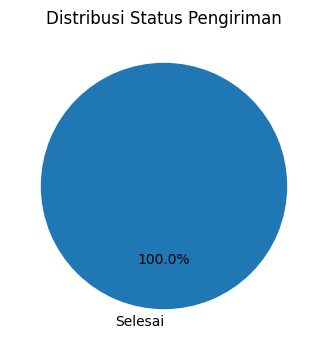

In [ ]:
# Menghitung distribusi status pengiriman
distribusi_status = df['Status Pesanan'].value_counts()

# Menampilkan distribusi status pengiriman
print(distribusi_status)

# Membuat diagram lingkaran
plt.figure(figsize=(4, 4))
plt.pie(distribusi_status, labels=distribusi_status.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Status Pengiriman')
plt.show()

Distribusi Status Pengiriman:

Terdapat 6185 pesanan yang telah selesai. Berdasarkan diagram lingkaran yang telah divisualisasikan, dapat disimpulkan bahwa 100%
pengiriman selesai sebelum tanggal perkiraan tiba
(tiba cepat). Hal ini menunjukan bahwa seluruh pesanan berhasil diselesaikan dengan cepat, dan tidak ada pengiriman yang tertunda melebihi tanggal perkiraan tiba.

Mengetahui distribusi pendapatan total di antara penjual-penjual yang ada

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Penjual Berkinerja Terbaik: laylahijab27 dengan Pendapatan Total 15072.516
Penjual Berkinerja Terburuk: dlsxks01 dengan Pendapatan Total -863.223


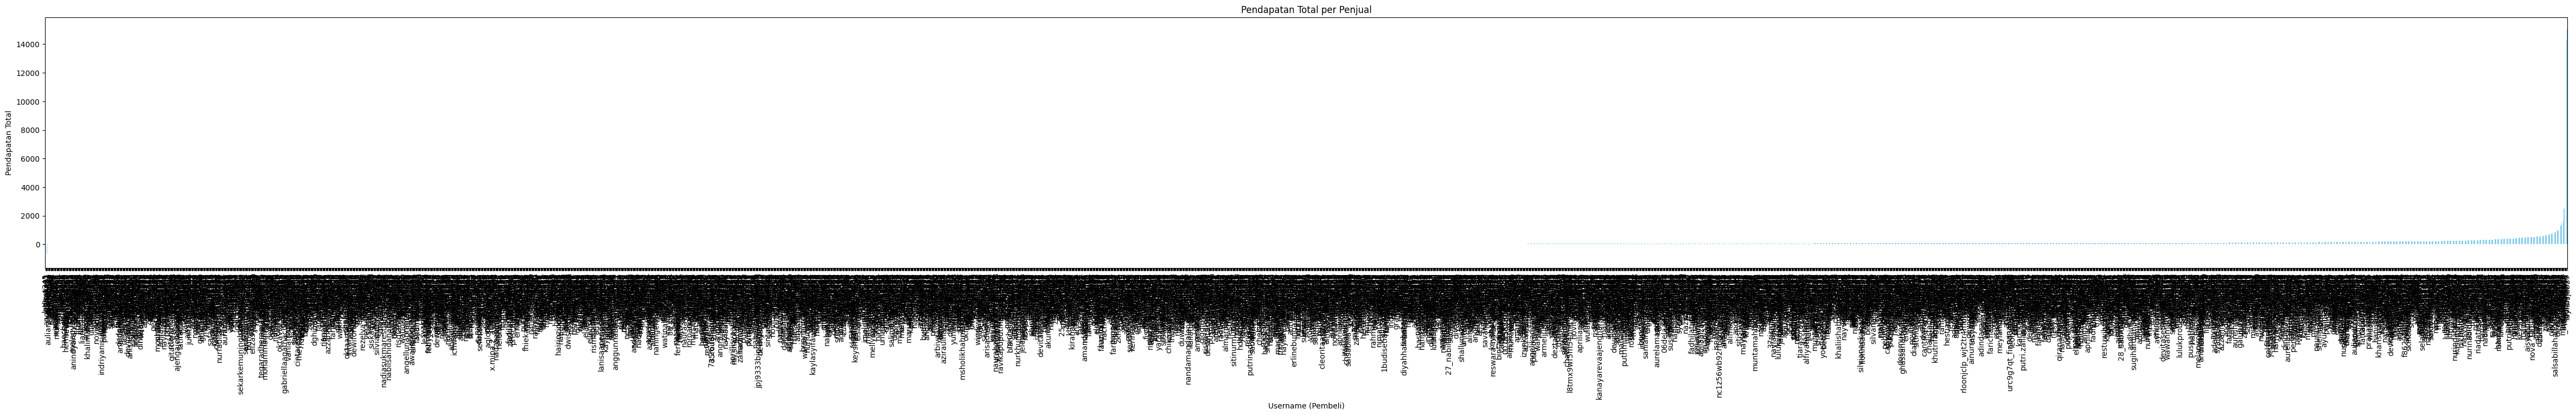

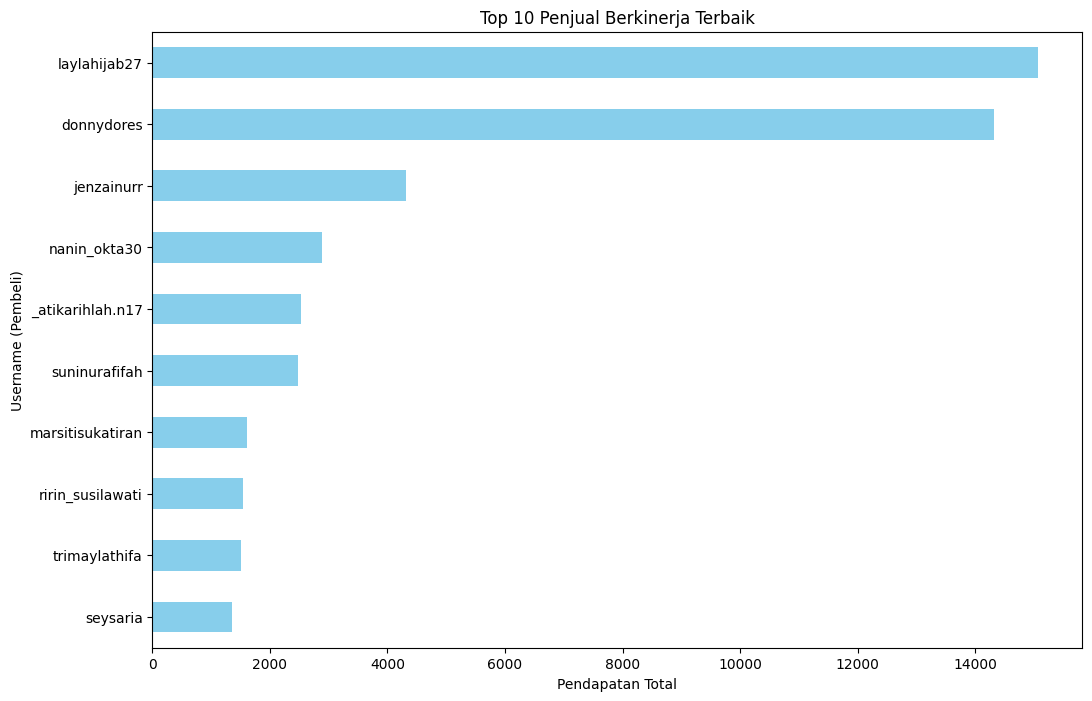

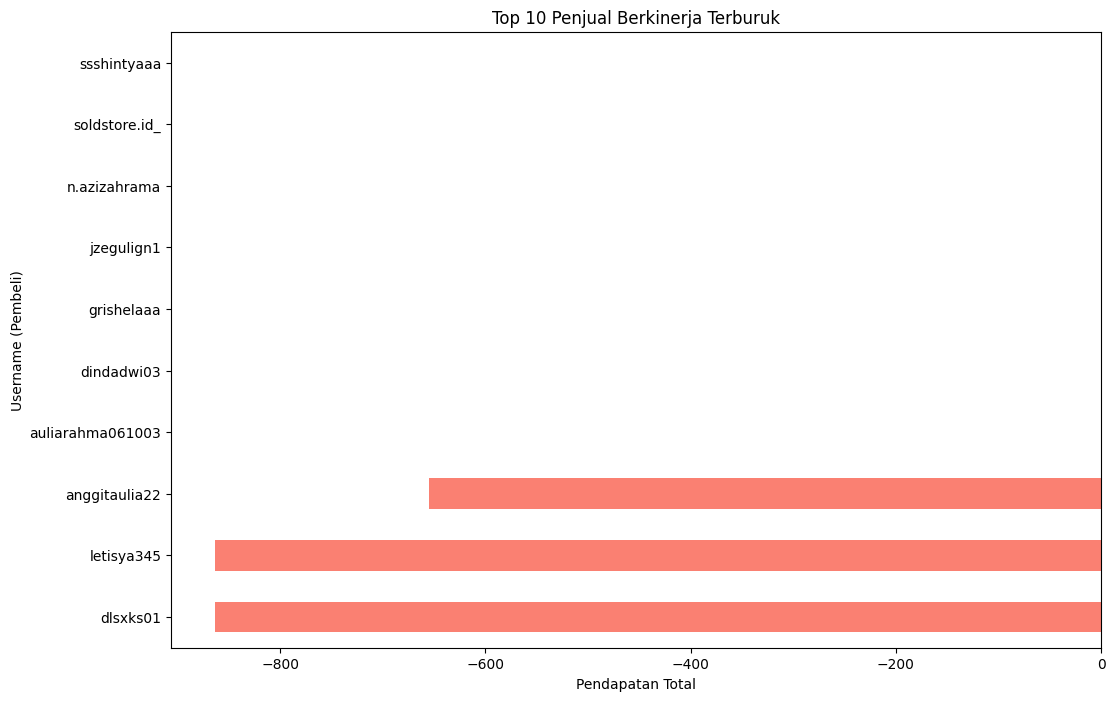

In [ ]:
# Menghitung pendapatan total untuk setiap penjual
df['Pendapatan Total'] = df['Total Pembayaran'] - df['Diskon Dari Penjual'] - df['Diskon Dari Shopee']

# Mengelompokkan data berdasarkan penjual dan menghitung pendapatan total
pendapatan_penjual = df.groupby('Username (Pembeli)')['Pendapatan Total'].sum()

# Menampilkan penjual berkinerja terbaik dan terburuk
penjual_terbaik = pendapatan_penjual.idxmax()
penjual_terburuk = pendapatan_penjual.idxmin()

print(f'Penjual Berkinerja Terbaik: {penjual_terbaik} dengan Pendapatan Total {pendapatan_penjual.max()}')
print(f'Penjual Berkinerja Terburuk: {penjual_terburuk} dengan Pendapatan Total {pendapatan_penjual.min()}')

# Visualisasi pendapatan total dengan bar chart
plt.figure(figsize=(60, 6))
pendapatan_penjual.sort_values().plot(kind='bar', color='skyblue')
plt.title('Pendapatan Total per Penjual')
plt.xlabel('Username (Pembeli)')
plt.ylabel('Pendapatan Total')
plt.show()

# Mengambil 10 penjual teratas
top_penjual = pendapatan_penjual.nlargest(10)

# Visualisasi pendapatan total penjual dengan bar chart
plt.figure(figsize=(12, 8))
top_penjual.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Penjual Berkinerja Terbaik')
plt.xlabel('Pendapatan Total')
plt.ylabel('Username (Pembeli)')
plt.show()

# Mengambil 10 penjual terbawah
bottom_penjual = pendapatan_penjual.nsmallest(10)

# Visualisasi pendapatan total penjual terbawah dengan bar chart
plt.figure(figsize=(12, 8))
bottom_penjual.sort_values().plot(kind='barh', color='salmon')
plt.title('Top 10 Penjual Berkinerja Terburuk')
plt.xlabel('Pendapatan Total')
plt.ylabel('Username (Pembeli)')
plt.show()


Analisis Pendapatan Penjual:

Berdasarkan analisis, dapat diidentifikasi bahwa penjual yang mencapai kinerja paling baik adalah laylahijab27, dengan pendapatan total sebesar 15072.516.

Sebaliknya, dlsxks01 diidentifikasi sebagai penjual berkinerja terburuk dengan pendapatan total -863.223, yang menunjukkan kerugian dalam bisnisnya.

Mengetahui distribusi pendapatan total di antara produk-produk yang dijual

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Produk Berkinerja Terbaik: Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet dengan Pendapatan Total 236535.74
Produk Berkinerja Terburuk: SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJAB ANTI LETOY JAHIT FULL TEPI dengan Pendapatan Total 254.894


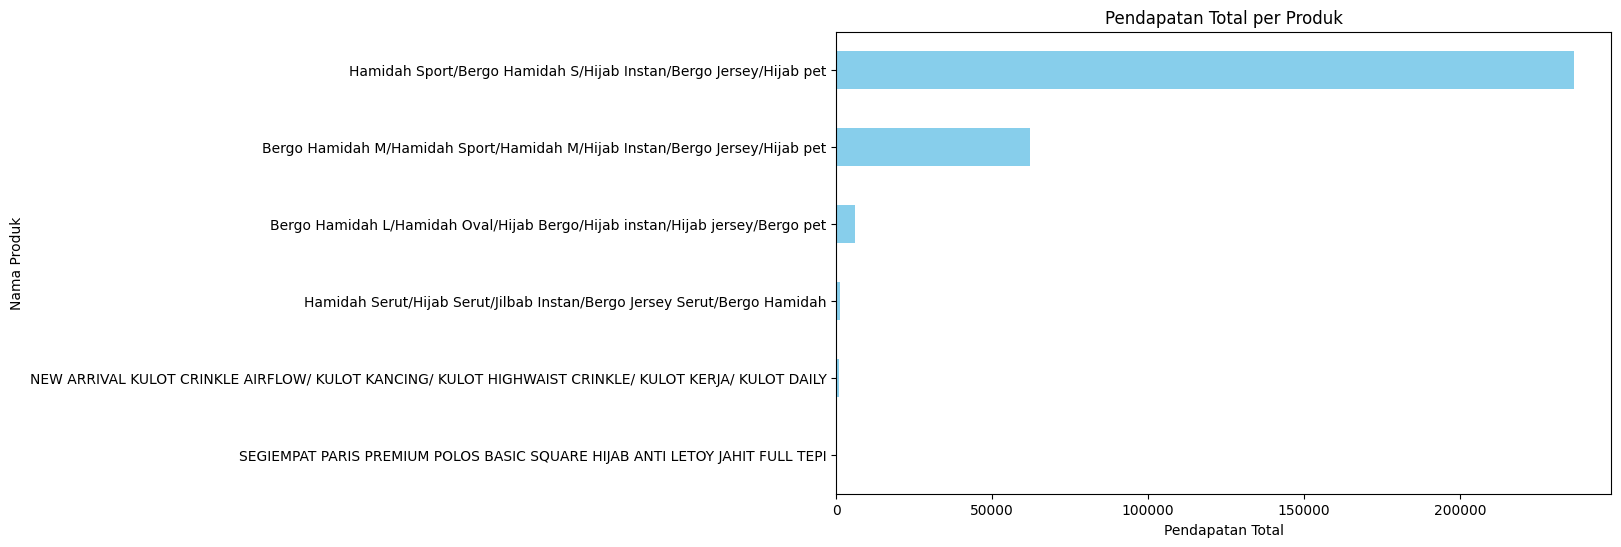

In [ ]:
# Menghitung pendapatan total untuk setiap produk
df['Pendapatan Produk'] = df['Total Pembayaran']

# Mengelompokkan data berdasarkan produk dan menghitung pendapatan total
pendapatan_produk = df.groupby('Nama Produk')['Pendapatan Produk'].sum()

# Menampilkan produk berkinerja terbaik dan terburuk
produk_terbaik = pendapatan_produk.idxmax()
produk_terburuk = pendapatan_produk.idxmin()

print(f'Produk Berkinerja Terbaik: {produk_terbaik} dengan Pendapatan Total {pendapatan_produk.max()}')
print(f'Produk Berkinerja Terburuk: {produk_terburuk} dengan Pendapatan Total {pendapatan_produk.min()}')

# Visualisasi pendapatan total produk dengan bar chart
plt.figure(figsize=(10, 6))
pendapatan_produk.sort_values().plot(kind='barh', color='skyblue')
plt.title('Pendapatan Total per Produk')
plt.xlabel('Pendapatan Total')
plt.ylabel('Nama Produk')
plt.show()

Analisis Pendapatan Produk:

Berdasarkan visualisasi bar chart, produk paling terlaris  produk yaitu Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet dengan pendapatan total 236535.74.

dan produk paling rendah yaitu SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJAB ANTI LETOY JAHIT FULL TEPI dengan Pendapatan Total 254.894.


Mengetahui tren total pendapatan dan jumlah pesanan secara keseluruhan selama periode penjualan bulan Januari hingga November 2023, dengan mempertimbangkan distribusi penjualan di Provinsi dan Kota/Kabupaten

In [ ]:
# Menghitung pendapatan total
df['Pendapatan Total'] = df['Total Pembayaran']

# Menghitung jumlah pesanan
jumlah_pesanan = df['No. Pesanan'].count()

# Menghitung rata-rata pendapatan per pesanan
rata_rata_pendapatan_per_pesanan = df['Pendapatan Total'].mean()

# Menghitung total pendapatan per pesanan
total_pendapatan = df['Total Pembayaran'].sum()

# Menampilkan hasil
print(f'Jumlah Pesanan: {jumlah_pesanan}')
print(f'Total Pendapatan: {total_pendapatan}')
print(f'Rata-rata Pendapatan per Pesanan: {rata_rata_pendapatan_per_pesanan}')


Jumlah Pesanan: 6185
Total Pendapatan: 307141.042
Rata-rata Pendapatan per Pesanan: 49.65902053354891


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mengubah kolom 'Waktu Pesanan Selesai' menjadi format datetime
df['Waktu Pesanan Selesai'] = pd.to_datetime(df['Waktu Pesanan Selesai'], format='%d/%m/%y %H.%M')

# Menambah kolom 'Bulan' untuk pengelompokan
df['Bulan'] = df['Waktu Pesanan Selesai'].dt.to_period('M')

# Menghitung pendapatan total per bulan
df['Pendapatan Total'] = df['Total Pembayaran']

# Mengelompokkan data berdasarkan bulan dan menghitung total pendapatan per bulan
pendapatan_per_bulan = df.groupby('Bulan')['Pendapatan Total'].sum()

# Menampilkan informasi yang diminta
jumlah_pesanan_tertinggi = df[df['Bulan'] == '2023-04']['Jumlah Produk di Pesan'].sum()
print(f"Jumlah pesanan tertinggi terjadi pada bulan April 2023 sebanyak {jumlah_pesanan_tertinggi} pesanan, dengan pendapatan total sekitar {pendapatan_per_bulan['2023-04']}.")

jumlah_pesanan_terendah = df[df['Bulan'] == '2023-11']['Jumlah Produk di Pesan'].sum()
print(f"Jumlah pesanan terendah terjadi pada bulan November 2023 sebanyak {jumlah_pesanan_terendah} pesanan, dengan pendapatan total sekitar {pendapatan_per_bulan['2023-11']}.")

# Peningkatan jumlah pesanan paling signifikan
peningkatan_pesanan = df[(df['Bulan'] == '2023-04') | (df['Bulan'] == '2023-02')]['Jumlah Produk di Pesan'].sum()
print(f"Peningkatan jumlah pesanan paling signifikan terjadi pada bulan Februari-April sebanyak {peningkatan_pesanan} pesanan.")

# Penurunan jumlah pesanan paling signifikan
penurunan_pesanan = df[(df['Bulan'] == '2023-11') | (df['Bulan'] == '2023-07')]['Jumlah Produk di Pesan'].sum()
print(f"Penurunan jumlah pesanan paling signifikan terjadi pada bulan Juli-November sebanyak {penurunan_pesanan} pesanan.")


Jumlah pesanan tertinggi terjadi pada bulan April 2023 sebanyak 1958 pesanan, dengan pendapatan total sekitar 45038.327.
Jumlah pesanan terendah terjadi pada bulan November 2023 sebanyak 50 pesanan, dengan pendapatan total sekitar 1122.905.
Peningkatan jumlah pesanan paling signifikan terjadi pada bulan Februari-April sebanyak 3022 pesanan.
Penurunan jumlah pesanan paling signifikan terjadi pada bulan Juli-November sebanyak 1931 pesanan.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Jumlah pendapatan tertinggi terjadi pada bulan April 2023 dengan pendapatan total sekitar 45038.327.
Jumlah pendapatan terendah terjadi pada bulan November 2023 dengan pendapatan total sekitar 1122.905.
Peningkatan jumlah pendapatan paling signifikan terjadi pada bulan Februari-April sebanyak 68710.683.
Penurunan jumlah pendapatan paling signifikan terjadi pada bulan Juli-Oktober sebanyak 51800.94500000001.
Total jumlah pendapatan Per Bulan
2023-01    34860.893
2023-02    23672.356
2023-03    43534.156
2023-04    45038.327
2023-05    33991.248
2023-06    36301.708
2023-07    39582.903
2023-08    20940.949
2023-09    15877.555
2023-10    12218.042
2023-11     1122.905
Freq: M, Name: Pendapatan Total, dtype: float64.


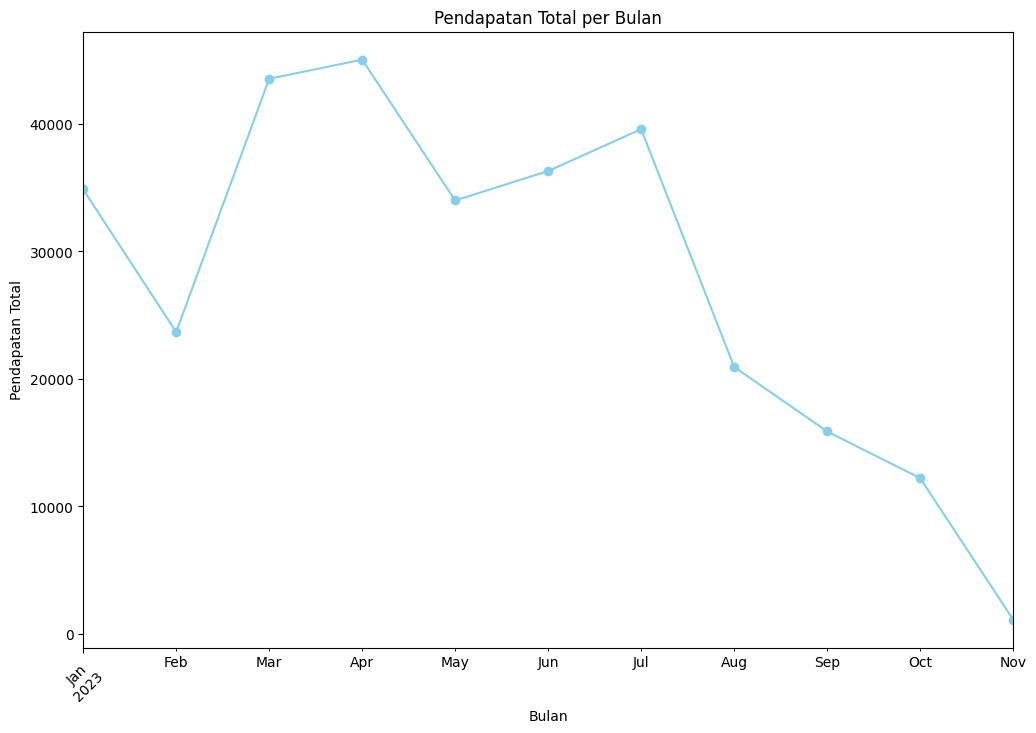

In [ ]:
# Mengubah kolom 'Waktu Pesanan Selesai' menjadi format datetime
df['Waktu Pesanan Selesai'] = pd.to_datetime(df['Waktu Pesanan Selesai'], format='%d/%m/%y %H.%M')

# Menambah kolom 'Bulan' untuk pengelompokan
df['Bulan'] = df['Waktu Pesanan Selesai'].dt.to_period('M')

# Menghitung pendapatan total per bulan
df['Pendapatan Total'] = df['Total Pembayaran']

# Mengelompokkan data berdasarkan bulan dan menghitung total pendapatan per bulan
pendapatan_per_bulan = df.groupby('Bulan')['Pendapatan Total'].sum()

# Menampilkan informasi yang diminta
jumlah_pendapatan_tertinggi = df[df['Bulan'] == '2023-04']['Jumlah'].sum()
print(f"Jumlah pendapatan tertinggi terjadi pada bulan April 2023 dengan pendapatan total sekitar {pendapatan_per_bulan['2023-04']}.")

jumlah_pesanan_terendah = df[df['Bulan'] == '2023-10']['Jumlah'].sum()
print(f"Jumlah pendapatan terendah terjadi pada bulan November 2023 dengan pendapatan total sekitar {pendapatan_per_bulan['2023-11']}.")

# Peningkatan jumlah pesanan paling signifikan
peningkatan_pendapatan = df[(df['Bulan'] == '2023-04') | (df['Bulan'] == '2023-02')]['Pendapatan Total'].sum()
print(f"Peningkatan jumlah pendapatan paling signifikan terjadi pada bulan Februari-April sebanyak {peningkatan_pendapatan}.")

# Penurunan jumlah pesanan paling signifikan
penurunan_pendapatan = df[(df['Bulan'] == '2023-10') | (df['Bulan'] == '2023-07')]['Pendapatan Total'].sum()
print(f"Penurunan jumlah pendapatan paling signifikan terjadi pada bulan Juli-Oktober sebanyak {penurunan_pendapatan}.")

# Penurunan jumlah pesanan paling signifikan
penurunan_pendapatan = df['Pendapatan Total'].sum()
print(f"Total jumlah pendapatan Per {pendapatan_per_bulan}.")


# Visualisasi pendapatan total per bulan
plt.figure(figsize=(12, 8))
pendapatan_per_bulan.plot(kind='line', marker='o', color='skyblue')
plt.title('Pendapatan Total per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Pendapatan Total')
plt.xticks(rotation=45)
plt.show()


Analisis Pendapatan per Bulan:

Jumlah pendapatan tertinggi terjadi pada bulan April 2023 dengan pendapatan total sekitar 45038.327.

Jumlah pendapatan terendah terjadi pada bulan November 2023 dengan pendapatan total sekitar 1122.905.

Peningkatan jumlah pendapatan paling signifikan terjadi pada bulan Februari-April sebanyak 68710.683.

Penurunan jumlah pendapatan paling signifikan terjadi pada bulan Juli-November sebanyak 51800.94500000001.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Jumlah pesanan tertinggi terjadi pada bulan April 2023 sebanyak 1958 pesanan.
Dan pada bulan Juli 2023 sebanyak 1881 pesanan.
Jumlah pesanan terendah terjadi pada bulan November 2023 sebanyak 50 pesanan.
Peningkatan jumlah pesanan paling signifikan terjadi pada bulan Februari-April sebanyak 3022 pesanan.
Penurunan jumlah pesanan paling signifikan terjadi pada bulan Juli-November sebanyak 1931 pesanan.


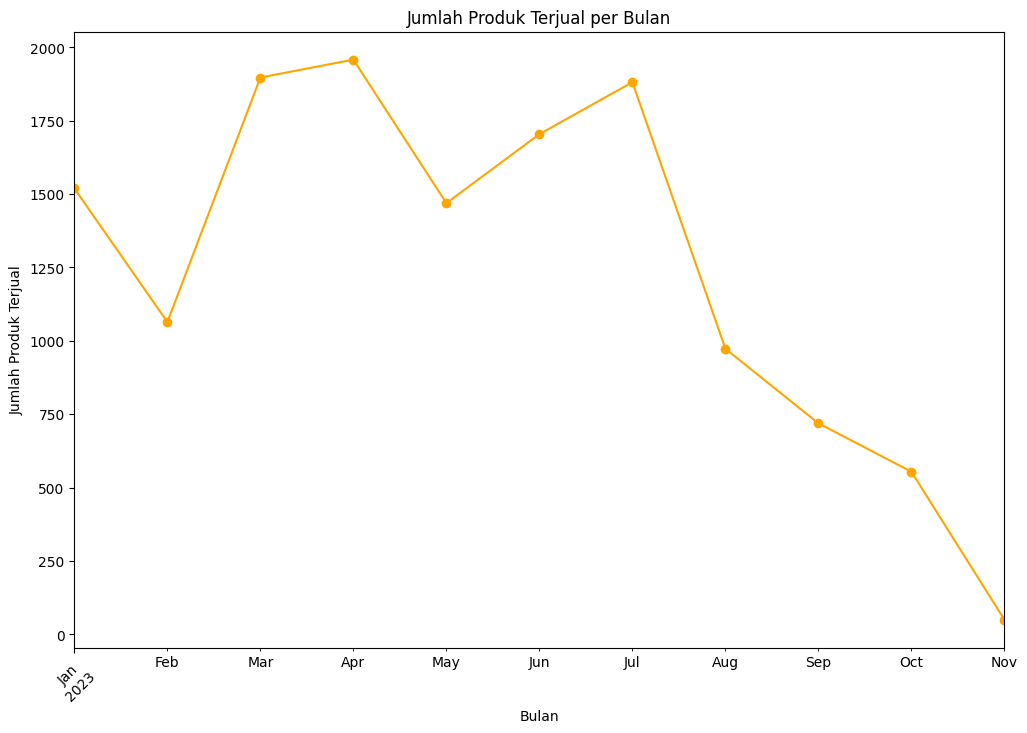

In [ ]:
# Mengubah kolom 'Waktu Pesanan Selesai' menjadi format datetime
df['Waktu Pesanan Selesai'] = pd.to_datetime(df['Waktu Pesanan Selesai'], format='%d/%m/%y %H.%M')

# Menambah kolom 'Bulan' untuk pengelompokan
df['Bulan'] = df['Waktu Pesanan Selesai'].dt.to_period('M')

# Menghitung jumlah produk terjual per bulan
produk_terjual_per_bulan = df.groupby('Bulan')['Jumlah Produk di Pesan'].sum()

# Menampilkan informasi yang diminta
jumlah_pesanan_tertinggi_maret = df[df['Bulan'] == '2023-04']['Jumlah Produk di Pesan'].sum()
jumlah_pesanan_tertinggi_juli = df[df['Bulan'] == '2023-07']['Jumlah Produk di Pesan'].sum()
print(f"Jumlah pesanan tertinggi terjadi pada bulan April 2023 sebanyak {jumlah_pesanan_tertinggi_maret} pesanan.")
print(f"Dan pada bulan Juli 2023 sebanyak {jumlah_pesanan_tertinggi_juli} pesanan.")

jumlah_pesanan_terendah = df[df['Bulan'] == '2023-11']['Jumlah Produk di Pesan'].sum()
print(f"Jumlah pesanan terendah terjadi pada bulan November 2023 sebanyak {jumlah_pesanan_terendah} pesanan.")

# Peningkatan jumlah pesanan paling signifikan
peningkatan_pesanan = df[(df['Bulan'] == '2023-04') | (df['Bulan'] == '2023-02')]['Jumlah Produk di Pesan'].sum()
print(f"Peningkatan jumlah pesanan paling signifikan terjadi pada bulan Februari-April sebanyak {peningkatan_pesanan} pesanan.")

# Penurunan jumlah pesanan paling signifikan
penurunan_pesanan = df[(df['Bulan'] == '2023-11') | (df['Bulan'] == '2023-07')]['Jumlah Produk di Pesan'].sum()
print(f"Penurunan jumlah pesanan paling signifikan terjadi pada bulan Juli-November sebanyak {penurunan_pesanan} pesanan.")

# Visualisasi jumlah produk terjual per bulan
plt.figure(figsize=(12, 8))
produk_terjual_per_bulan.plot(kind='line', marker='o', color='orange')
plt.title('Jumlah Produk Terjual per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Produk Terjual')
plt.xticks(rotation=45)
plt.show()

Analisis Penjualan per Bulan:

Jumlah pesanan tertinggi terjadi pada bulan April 2023 sebanyak 1958 pesanan.

Dan pada bulan Juni 2023 sebanyak 1881 pesanan.

Jumlah pesanan terendah terjadi pada bulan November 2023 sebanyak 50 pesanan.

Peningkatan jumlah pesanan paling signifikan terjadi pada bulan Februari-April sebanyak 3022 pesanan.

Penurunan jumlah pesanan paling signifikan terjadi pada bulan Juli-November sebanyak 1931 pesanan.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


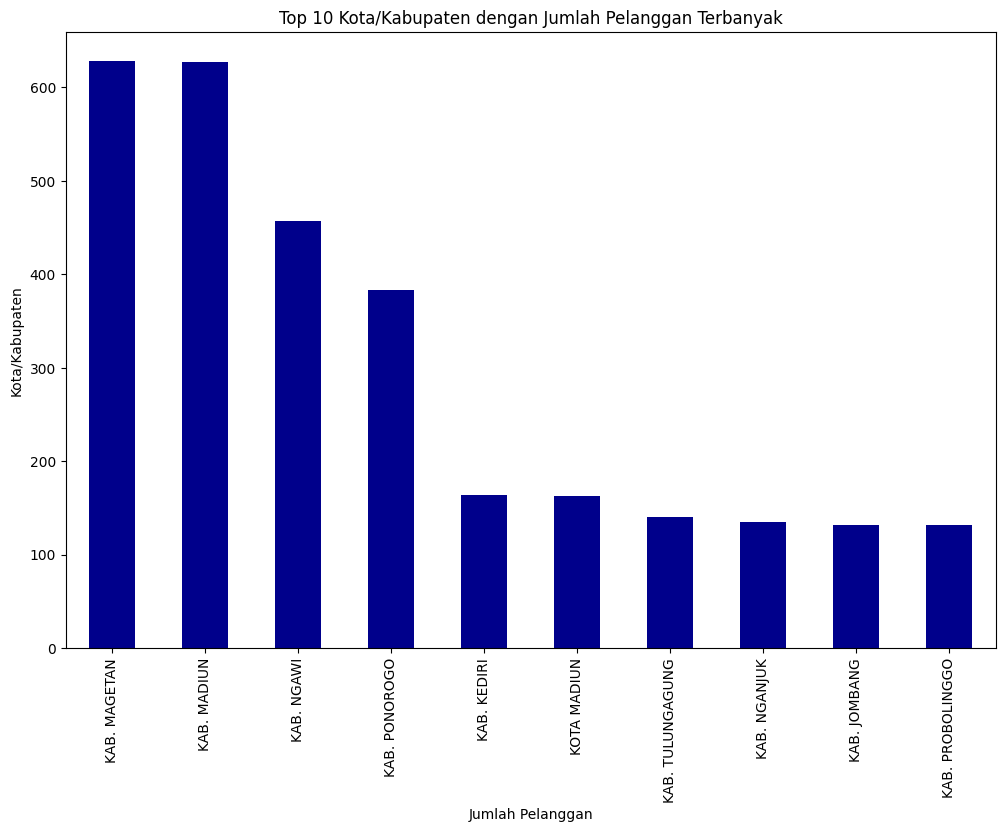

Jumlah pelanggan per kota/kabupaten:
Kota/Kabupaten
KAB. MAGETAN        628
KAB. MADIUN         627
KAB. NGAWI          457
KAB. PONOROGO       383
KAB. KEDIRI         164
KOTA MADIUN         163
KAB. TULUNGAGUNG    140
KAB. NGANJUK        135
KAB. JOMBANG        132
KAB. PROBOLINGGO    132
Name: No. Pesanan, dtype: int64


In [ ]:
# Analisis Lokasi Pelanggan
count_location = df['Kota/Kabupaten'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
count_location.plot(kind='bar', color='darkblue')
plt.title('Top 10 Kota/Kabupaten dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota/Kabupaten')
plt.show()

# Menghitung jumlah pelanggan setiap kota/kabupaten
jumlah_pelanggan_per_kota = df.groupby('Kota/Kabupaten')['No. Pesanan'].count().nlargest(10)

# Menampilkan informasi jumlah pelanggan per kota/kabupaten
print("Jumlah pelanggan per kota/kabupaten:")
print(jumlah_pelanggan_per_kota)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


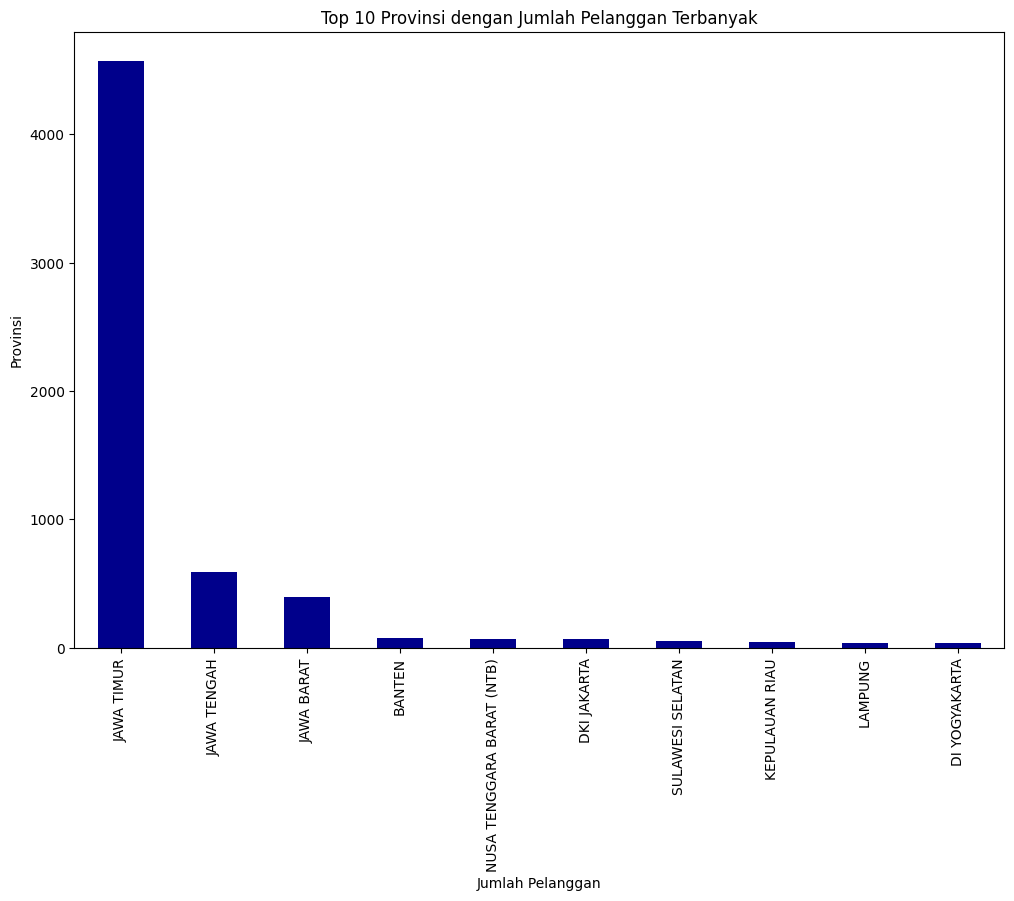

Jumlah pelanggan per Provinsi:
Provinsi
JAWA TIMUR                   4569
JAWA TENGAH                   593
JAWA BARAT                    395
BANTEN                         73
DKI JAKARTA                    66
NUSA TENGGARA BARAT (NTB)      66
SULAWESI SELATAN               55
KEPULAUAN RIAU                 42
LAMPUNG                        39
DI YOGYAKARTA                  35
Name: No. Pesanan, dtype: int64


In [ ]:
# Analisis Lokasi Pelanggan
count_location = df['Provinsi'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
count_location.plot(kind='bar', color='darkblue')
plt.title('Top 10 Provinsi dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Provinsi')
plt.show()

# Menghitung jumlah pelanggan setiap kota/kabupaten
jumlah_pelanggan_per_provinsi = df.groupby('Provinsi')['No. Pesanan'].count().nlargest(10)

# Menampilkan informasi jumlah pelanggan per kota/kabupaten
print("Jumlah pelanggan per Provinsi:")
print(jumlah_pelanggan_per_provinsi)

# **Identifikasi Pelanggan Churn**

In [ ]:
jumlah_pesanan_per_pelanggan = df.groupby('Username (Pembeli)')['No. Pesanan'].count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Melakukan identifikasi "churn"

In [ ]:
threshold_pesanan = 1
churned_customers = jumlah_pesanan_per_pelanggan[jumlah_pesanan_per_pelanggan <= threshold_pesanan]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Menampilkan pelanggan yang dianggap churn

In [ ]:
# Mencetak pelanggan yang dianggap churn
print("Pelanggan yang dianggap Churn:")
print(churned_customers)

Pelanggan yang dianggap Churn:
Username (Pembeli)
.23230_               1
007558208910.03.07    1
00_vr17               1
02cart                1
02konorre6            1
                     ..
zuliati900            1
zulvavaaa             1
zwethakirana          1
zxg01dh5bn            1
zz3slvy9vl            1
Name: No. Pesanan, Length: 2434, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dalam analisis churn,  mengidentifikasi pelanggan yang dianggap "churn" berdasarkan jumlah pesanan unik per pelanggan.
Terdapat 2434 pelanggan yang dianggap "churn" dengan satu pesanan atau kurang.

# **Churn Berdasarkan Pelanggan Yang Aktif**

Apa proporsi pelanggan yang dianggap "churn" dan "aktif," dan bagaimana perbandingannya? Dan bagaimana pola pembelian (jumlah pesanan) berbeda antara pelanggan yang dianggap "churn" dan "aktif"? Apakah terdapat perbedaan signifikan dalam jumlah pesanan?

## Membuat visualisasi menggunakan grafik lingkaran

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


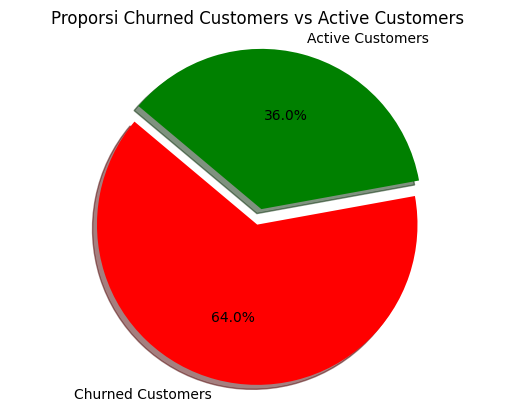

JUMLAH PRESENTASE Churned Customers: 64.0%
JUMLAH PRESENTASE Active Customers: 36.0%


In [ ]:
# Visualisasi dengan grafik lingkaran
churned_count = len(churned_customers)
active_count = len(jumlah_pesanan_per_pelanggan) - churned_count

labels = ['Churned Customers', 'Active Customers']
sizes = [churned_count, active_count]
colors = ['red', 'green']
explode = (0.1, 0)  # memberikan efek potong untuk bagian churned

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Mengatur tampilan lingkaran menjadi lingkaran sejati

plt.title('Proporsi Churned Customers vs Active Customers')
plt.show()

print("JUMLAH PRESENTASE Churned Customers: {:.1f}%".format((churned_count / (churned_count + active_count)) * 100))
print("JUMLAH PRESENTASE Active Customers: {:.1f}%".format((active_count / (churned_count + active_count)) * 100))

Berdasarkan analisis churn, sekitar 64% pelanggan dianggap "churn," sedangkan sekitar 36% pelanggan dianggap "aktif."

In [ ]:
df_active_count = df
df_churned_count = df
df_active_count.to_csv('data_aktif_analysis.csv', index=False)
df_churned_count.to_csv('data_churn_analysis.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Churn Berdasarkan Opsi Pembayaran**

Bagaimana pola pembayaran (Opsi pembayaran) mempengaruhi perilaku pelanggan? Apakah terdapat perbedaan dalam jumlah pesanan antara pembayaran "COD" dan "Shopeepay"?

## Mengelompokan seluruh kolom menjadi satu atribut

In [ ]:
num = [
    "No. Pesanan", "Status Pesanan", "Status Pembatalan/ Pengembalian", "Opsi Pengiriman", "Antar ke counter/ pick-up",
    "Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)", "Waktu Pengiriman Diatur", "Waktu Pesanan Dibuat", "Waktu Pembayaran Dilakukan",
    "Metode Pembayaran", "Nama Produk", "Nama Variasi", "Jumlah",
    "Kota/Kabupaten", "Provinsi", "Churn"
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Mengidentifikasi Churn berdasarkan Opsi Pembayaran

In [ ]:
df['Churn'] = df['Metode Pembayaran'].apply(lambda x: 'COD (Bayar di Tempat)' if x == 'COD (Bayar di Tempat)' else 'ShopeePay')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Menampilkan jumlah total dan persentase dari churn yg diidentifikasi

In [ ]:
print('count of Churn')
print(df['Churn'].value_counts())
print('% of Churn')
print(df['Churn'].value_counts(normalize=True)*100)

count of Churn
COD (Bayar di Tempat)    4746
ShopeePay                1439
Name: Churn, dtype: int64
% of Churn
COD (Bayar di Tempat)    76.734034
ShopeePay                23.265966
Name: Churn, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mayoritas pelanggan yang berlangganan (churn) memilih metode pembayaran "COD (Bayar di Tempat)" sebanyak 76.73%, sedangkan metode pembayaran "ShopeePay" hanya menyumbang sekitar 23.26% dari total churn.

Hal ini menunjukkan bahwa metode pembayaran "COD (Bayar di Tempat)" memiliki kontribusi yang lebih besar terhadap jumlah pelanggan yang berhenti berlangganan dibandingkan dengan metode pembayaran "ShopeePay".

## Membuat visualisasi data dari analisis churn yg telah dibuat

In [ ]:
sns.set(style='darkgrid')
def exp2(columns):
    sns.histplot(data=df, x=columns, hue='Churn')
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


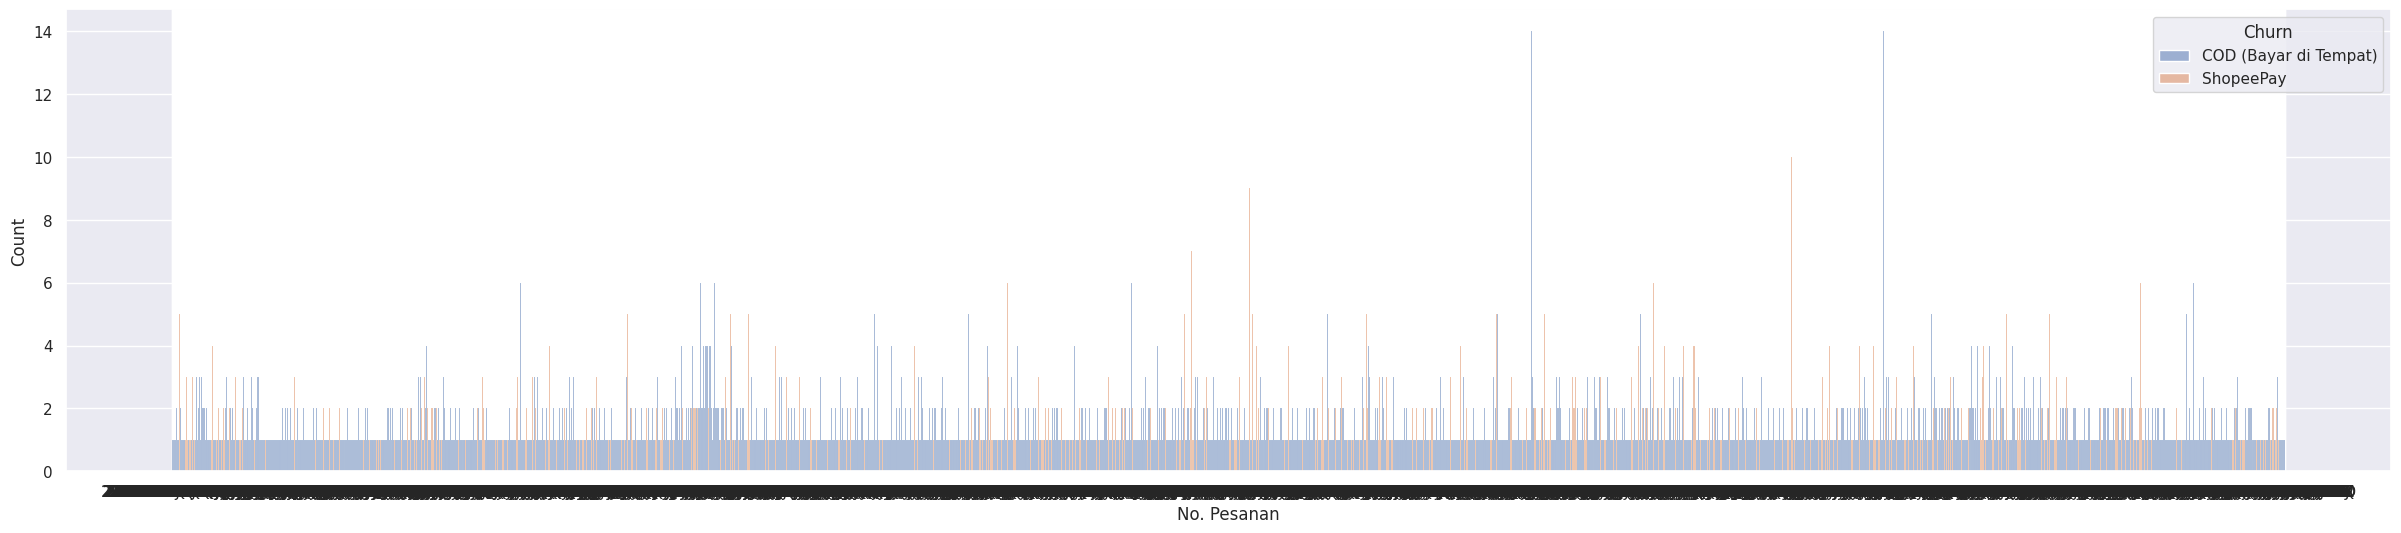

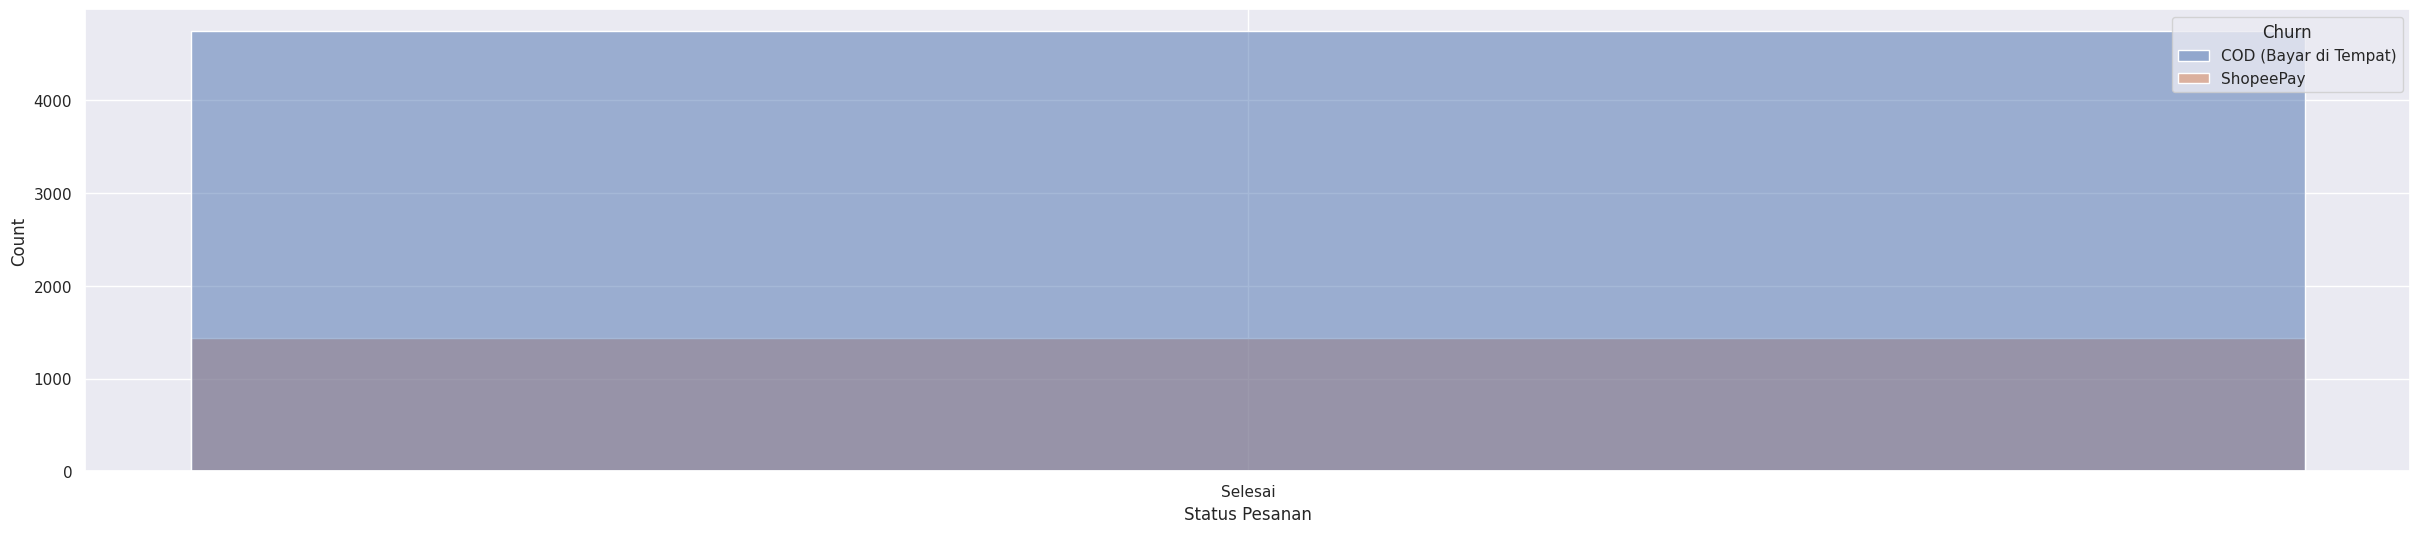

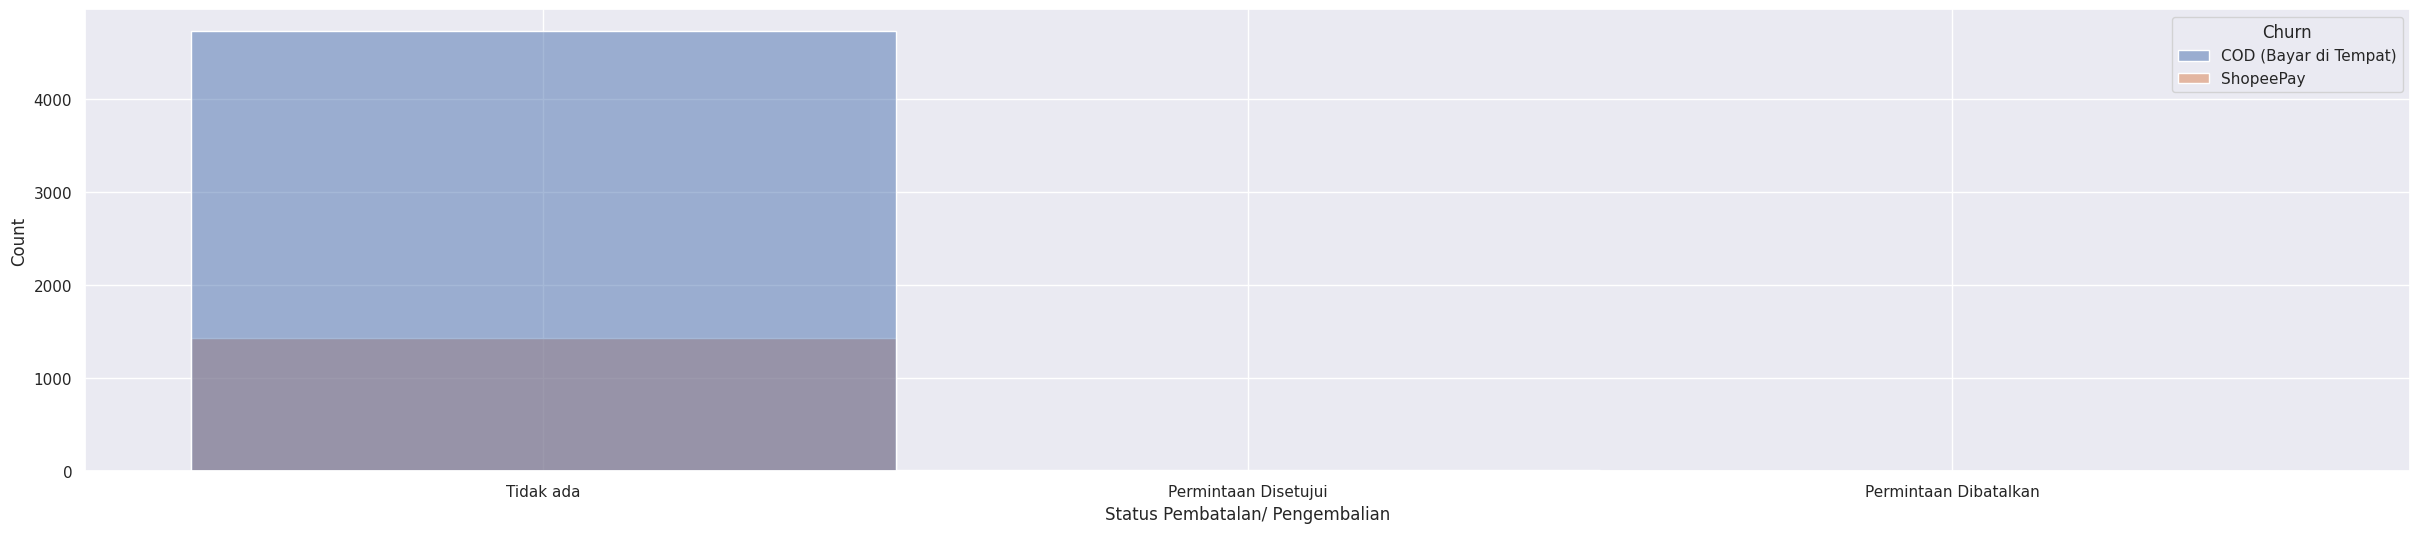

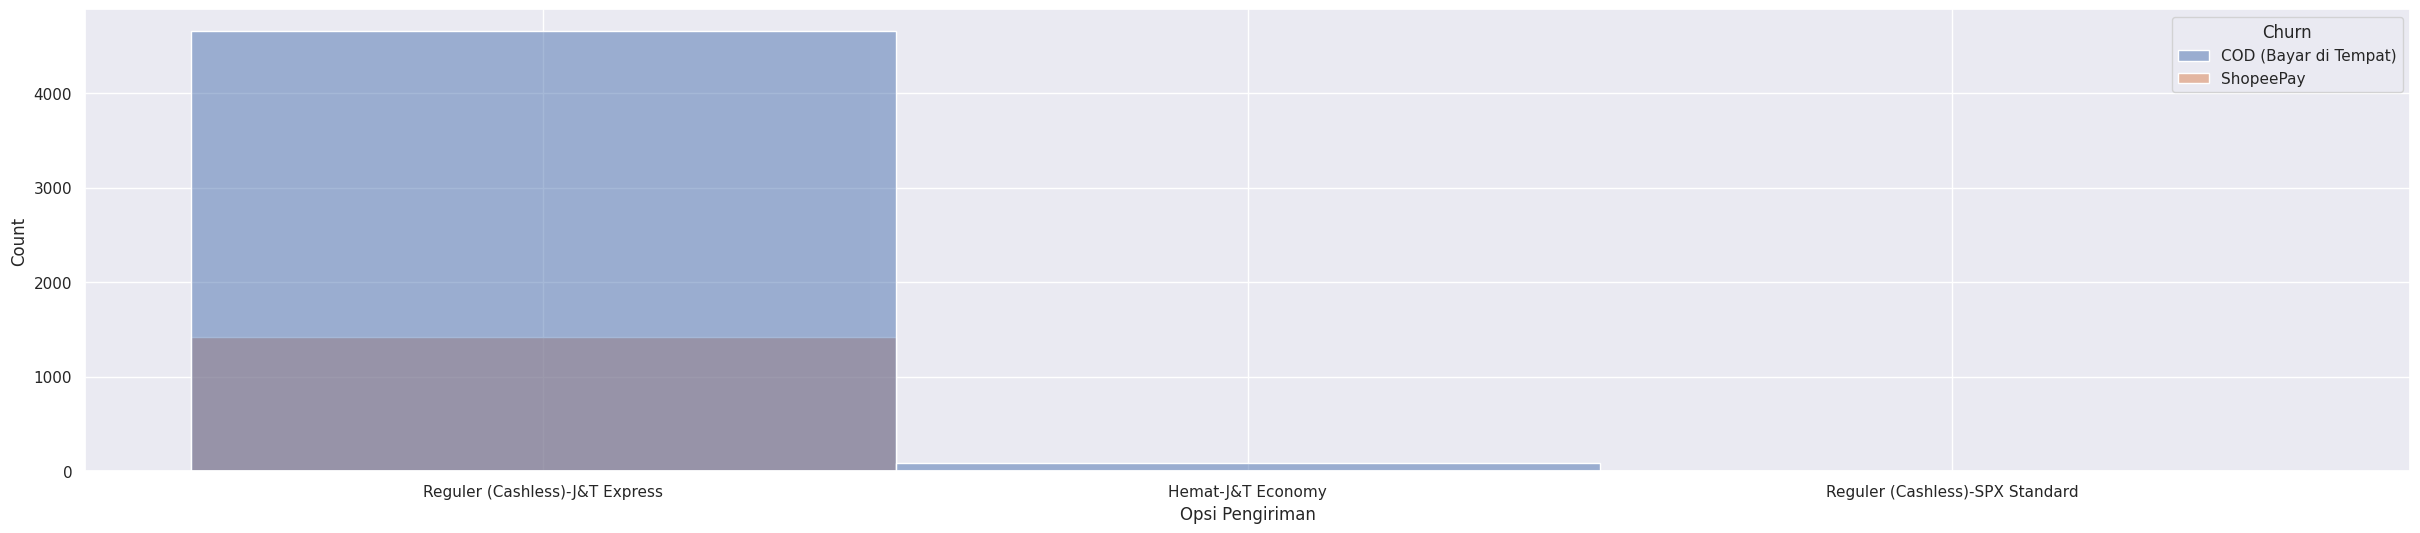

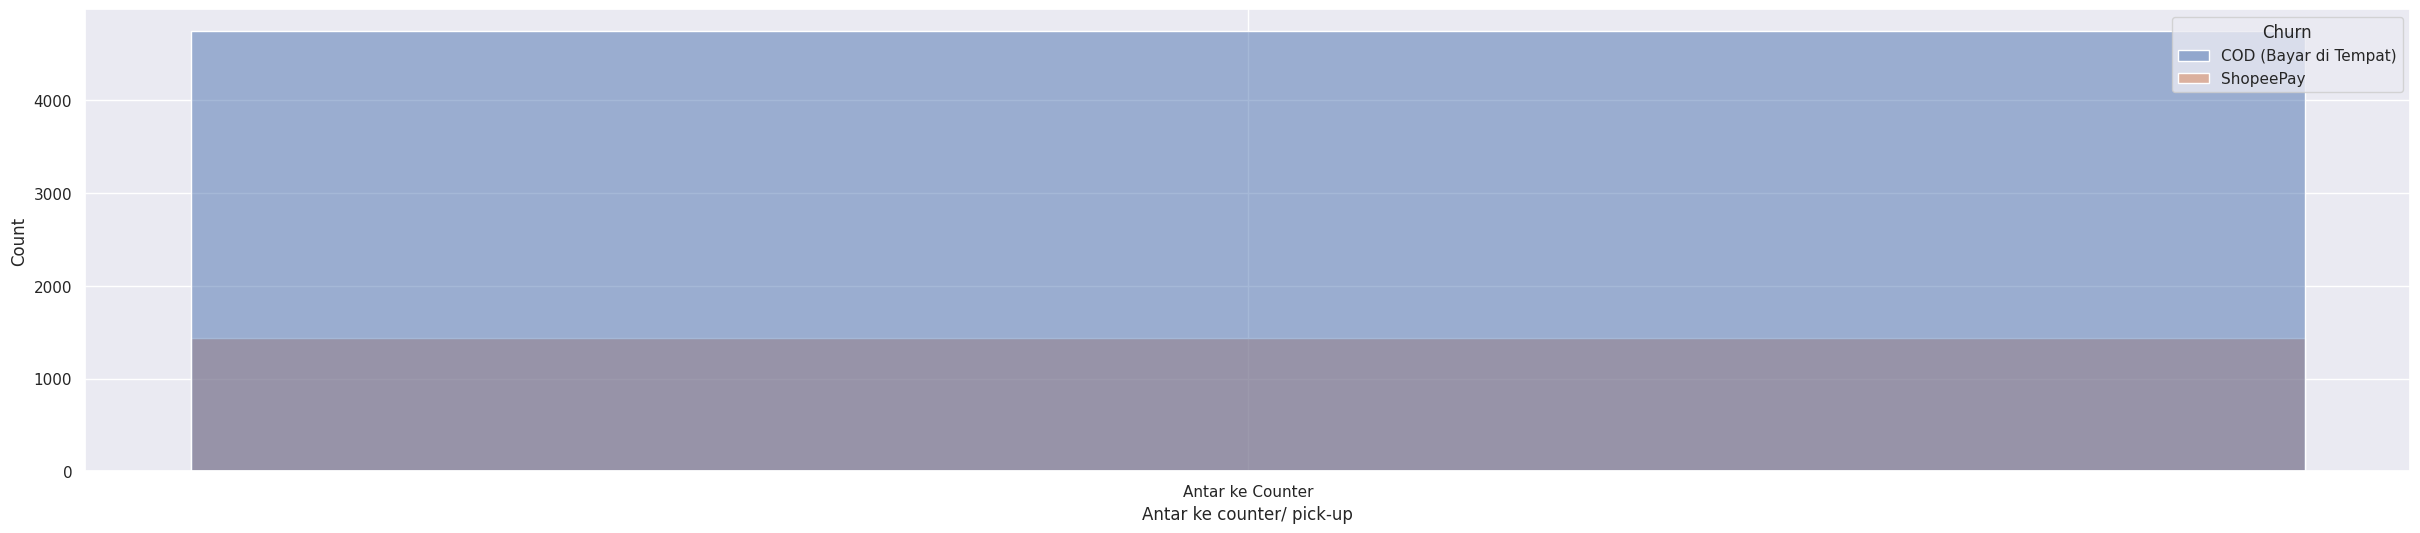

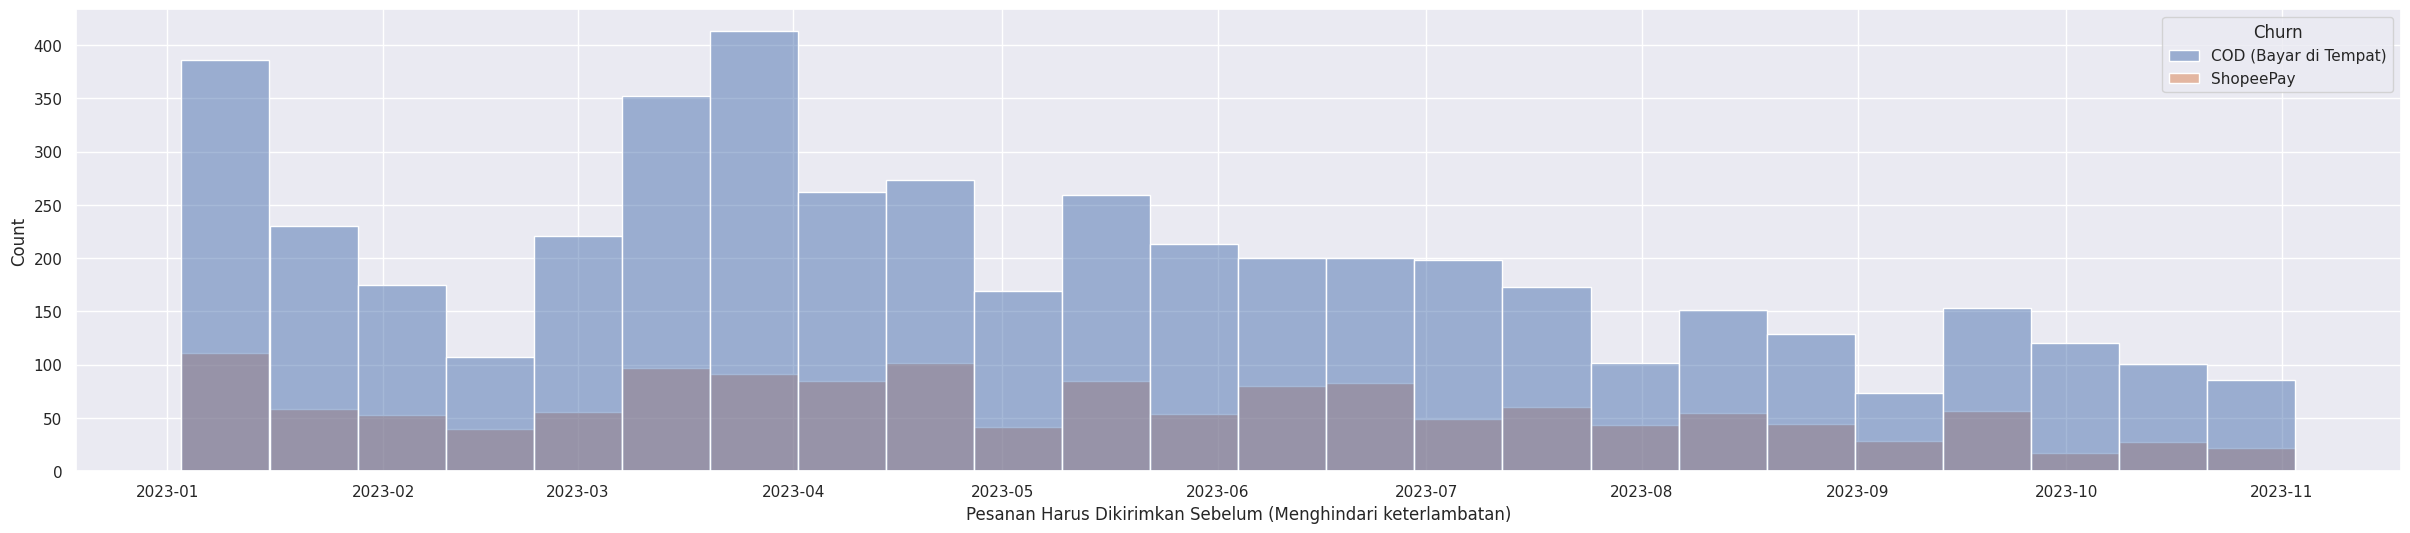

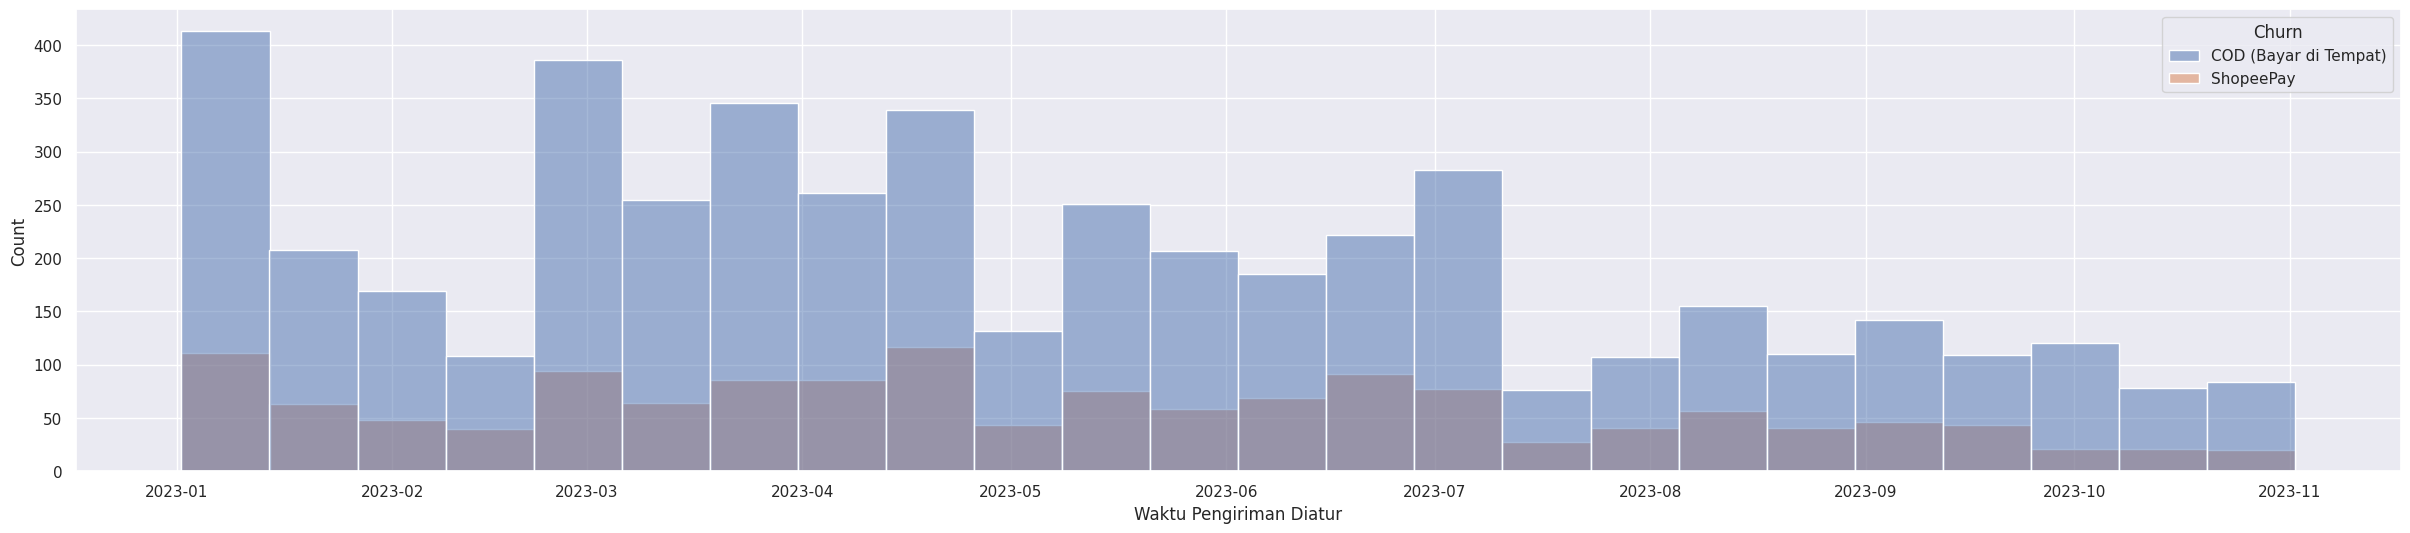

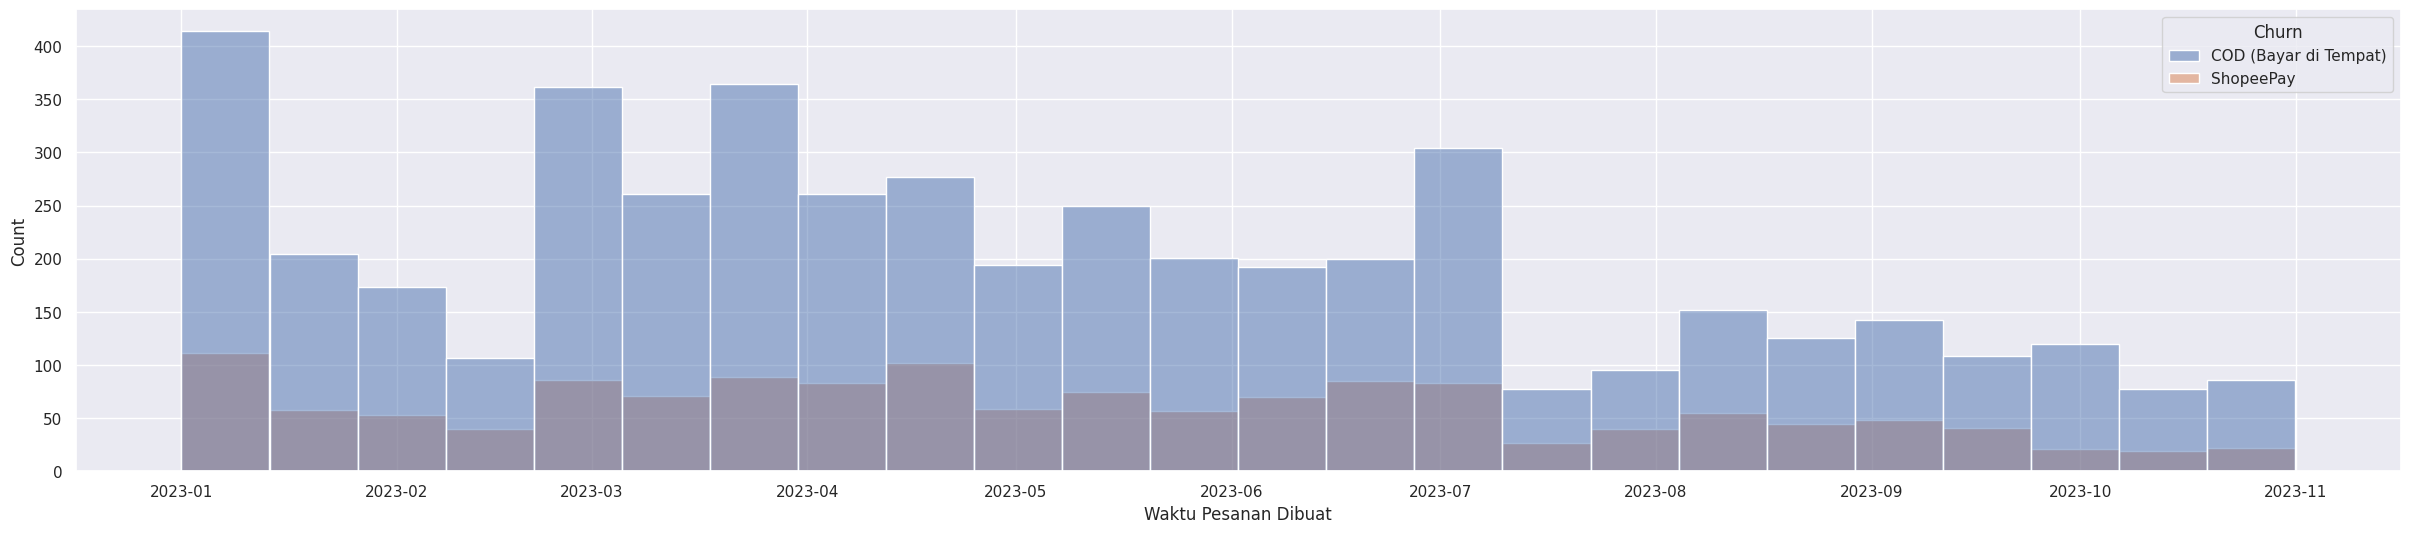

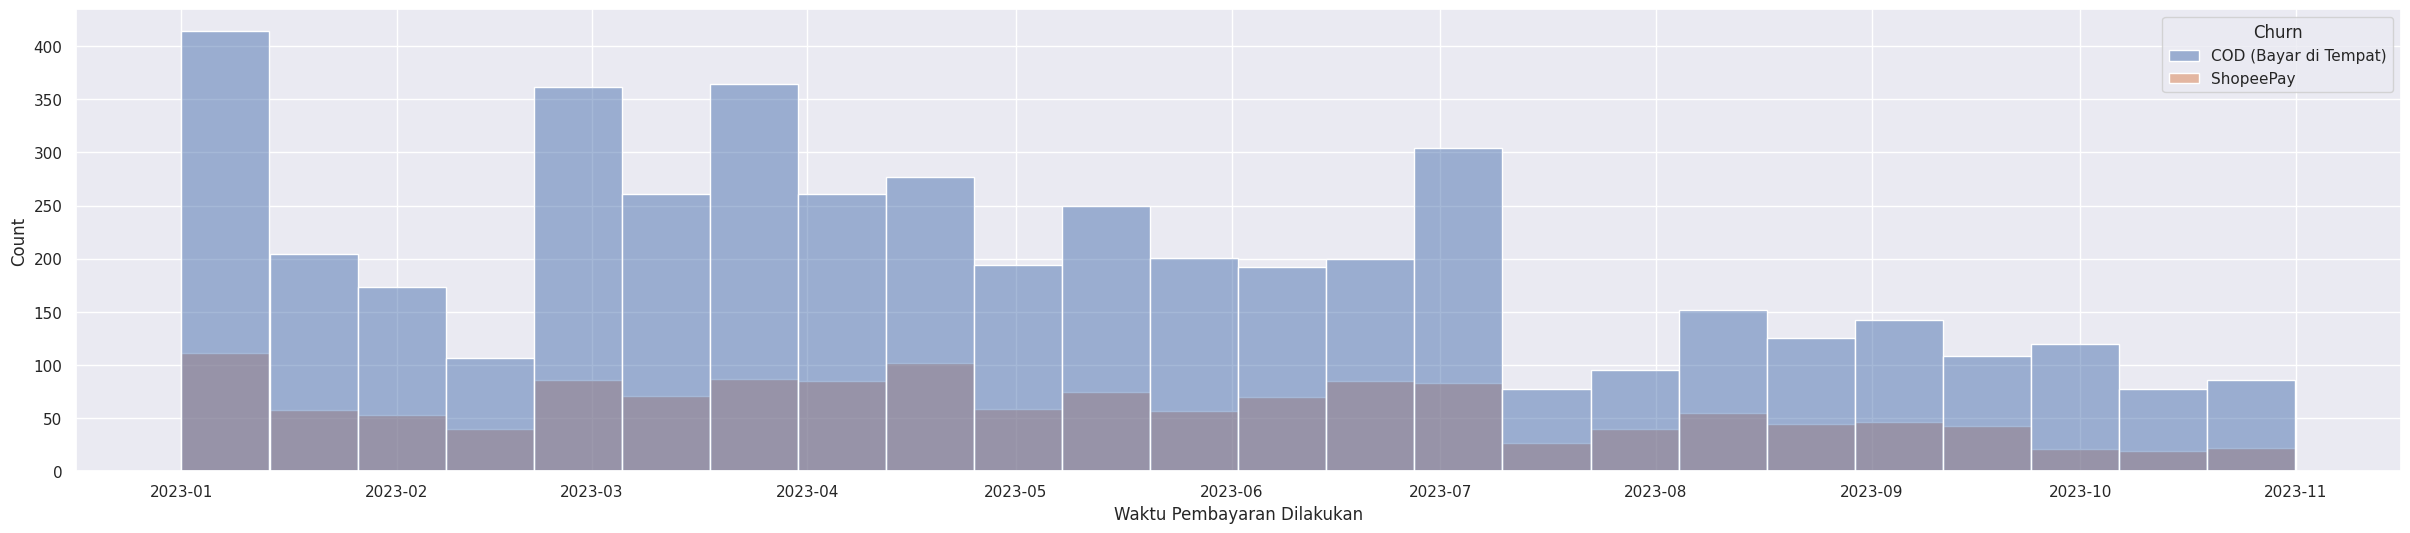

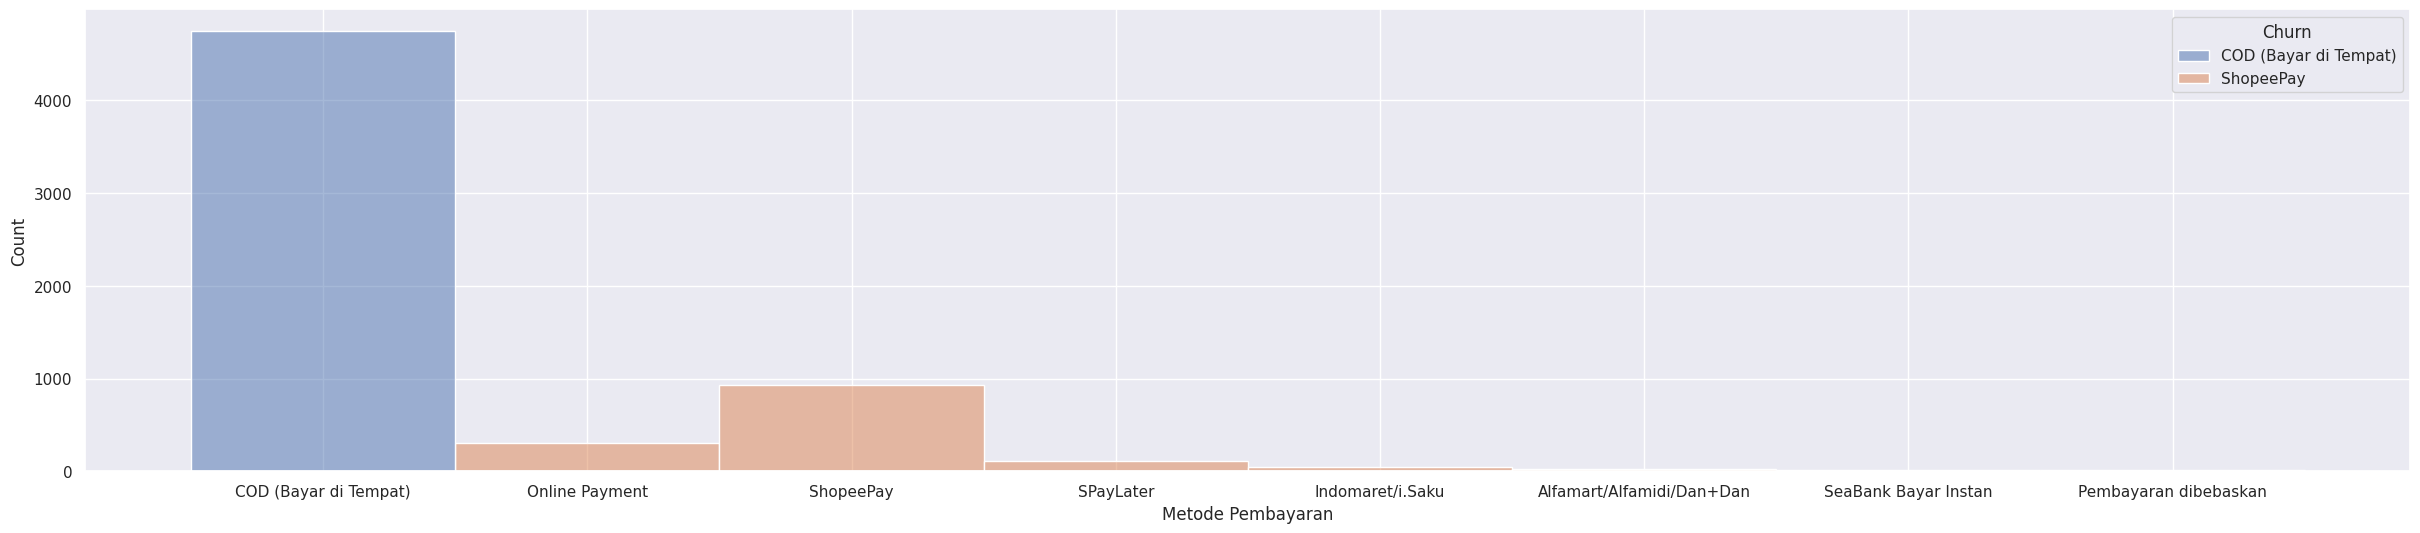

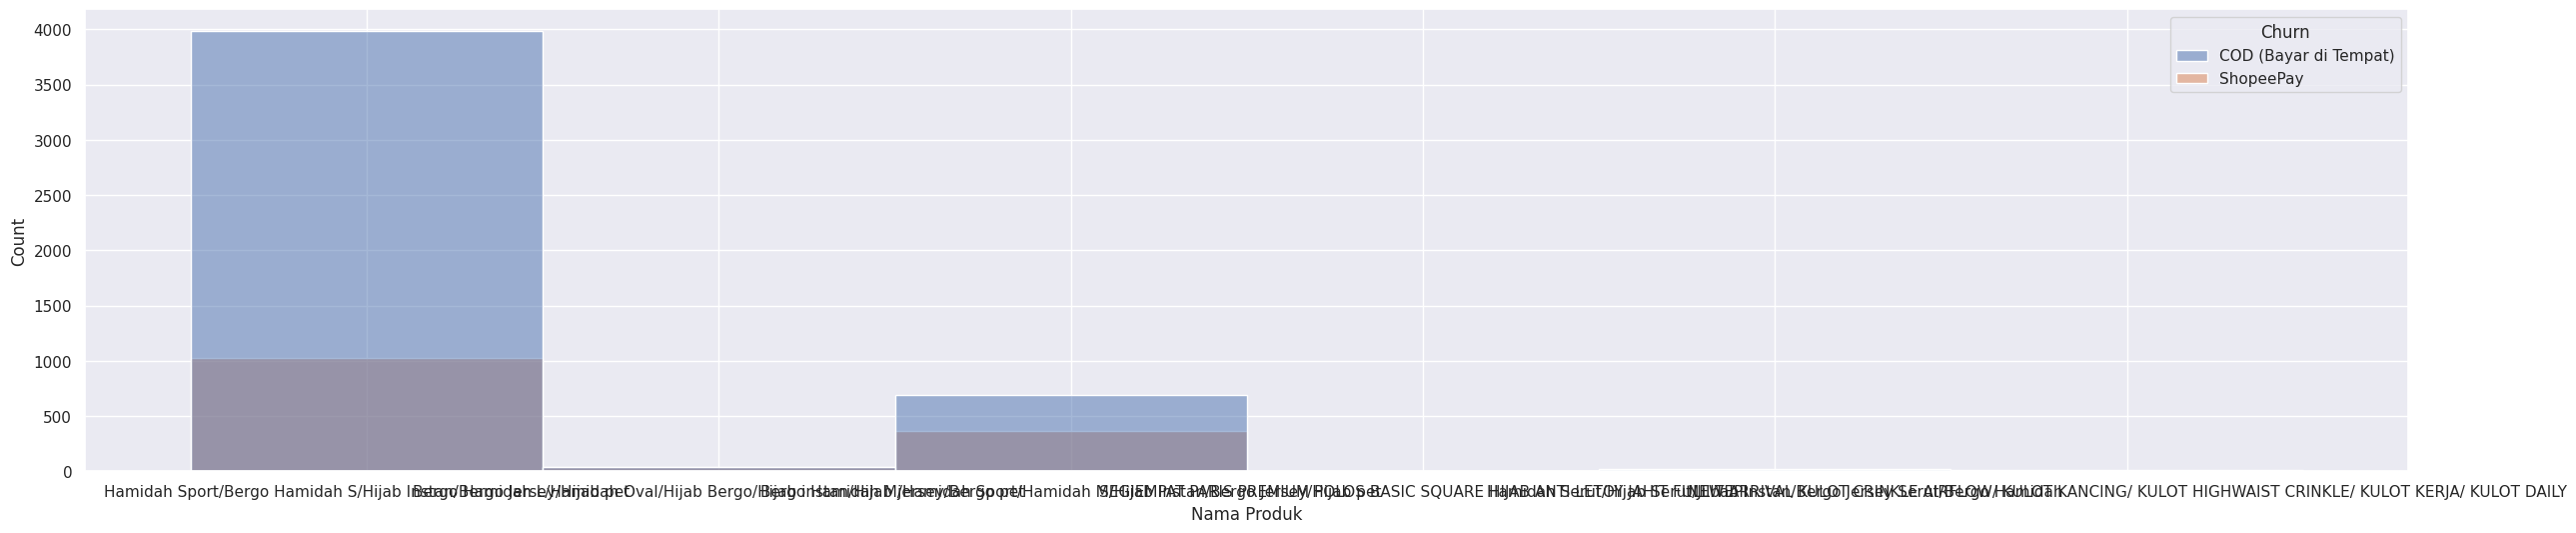

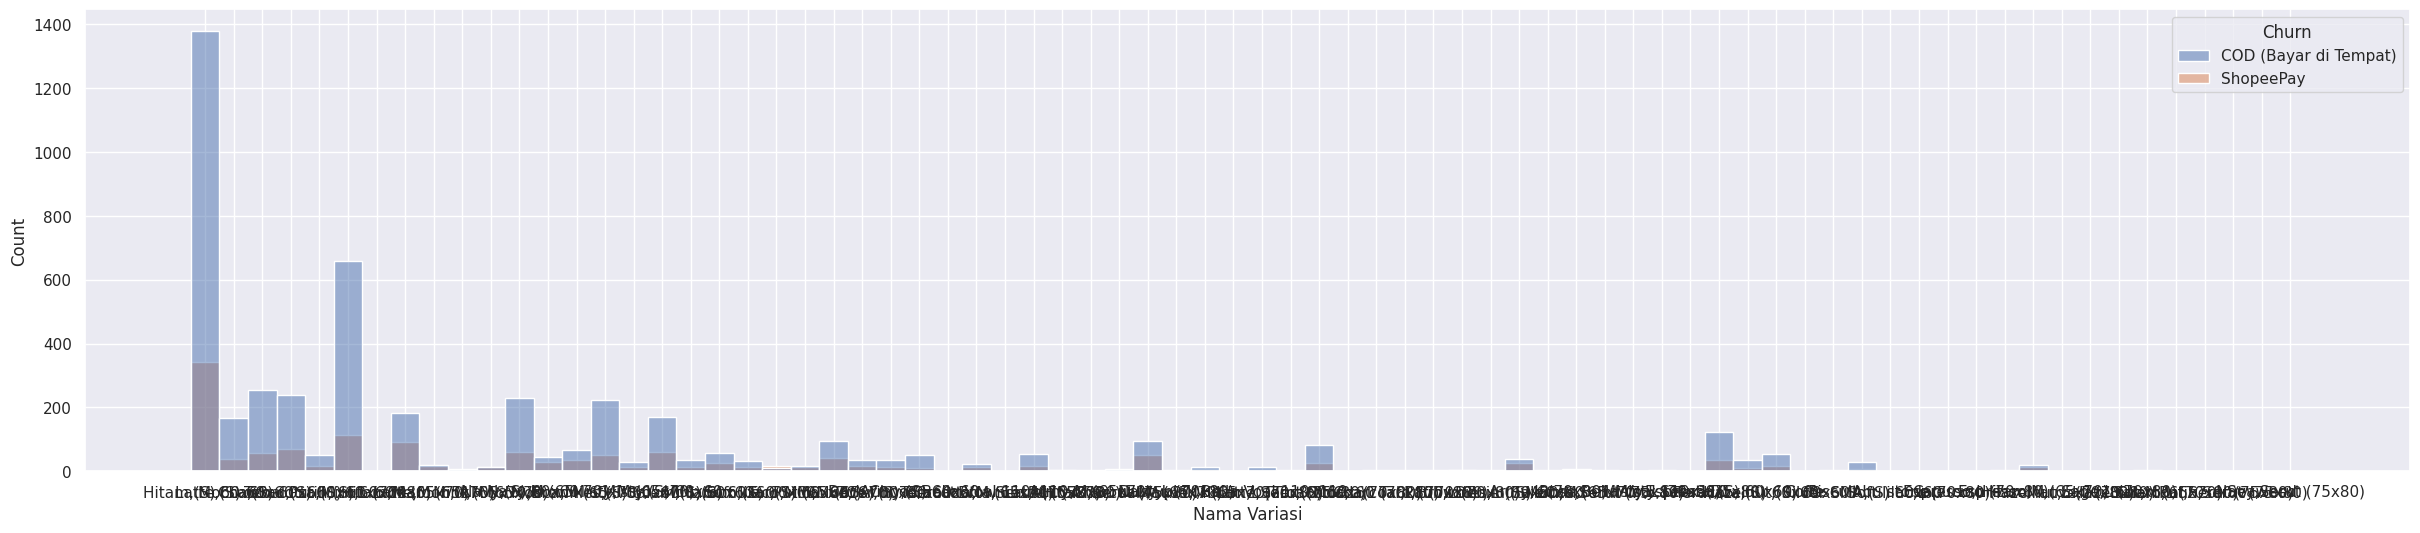

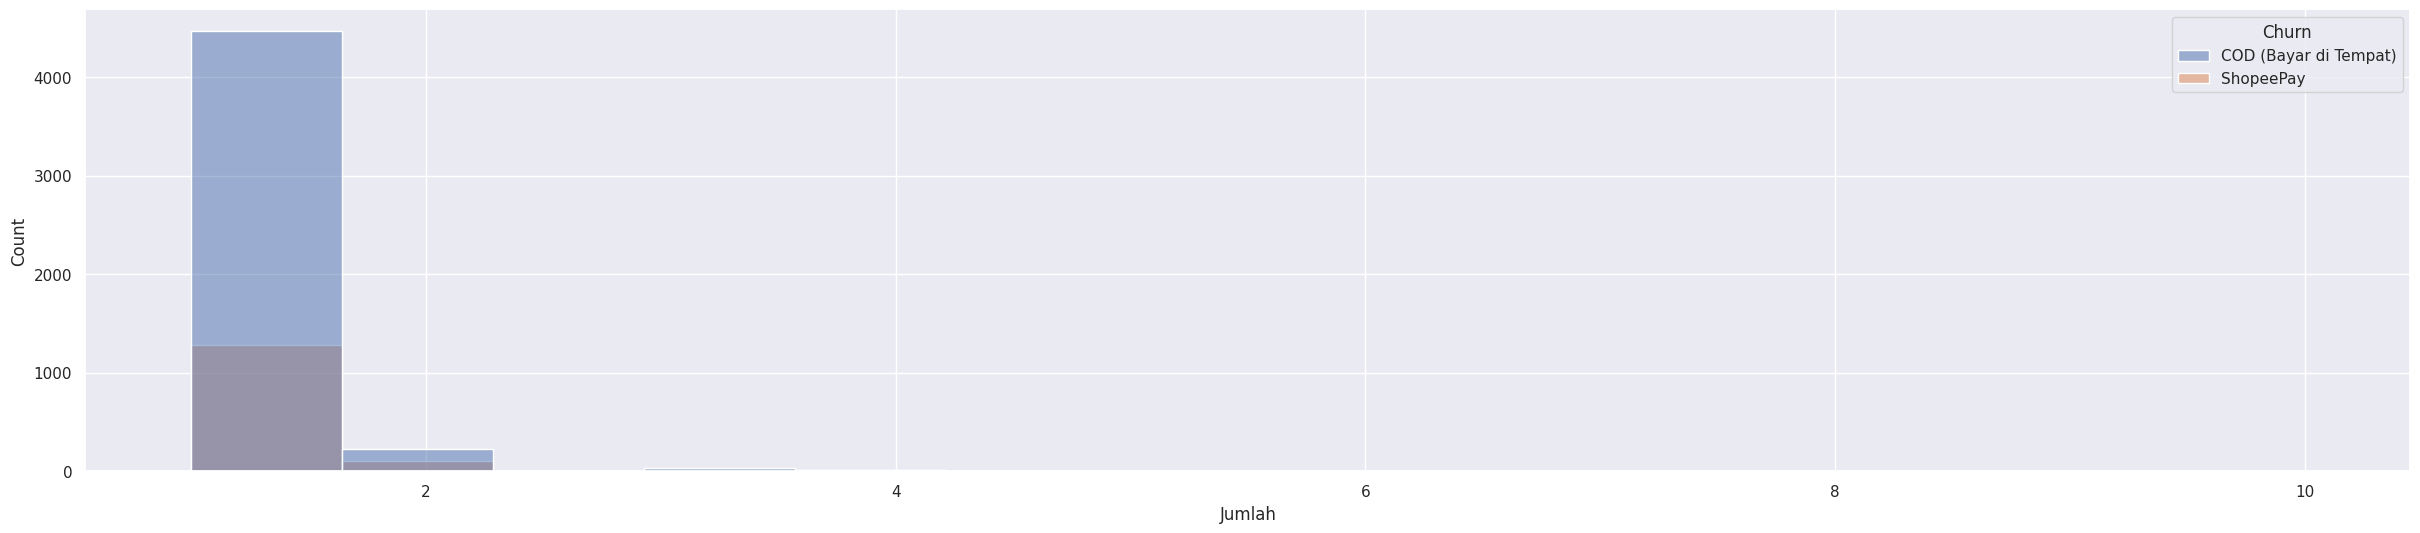

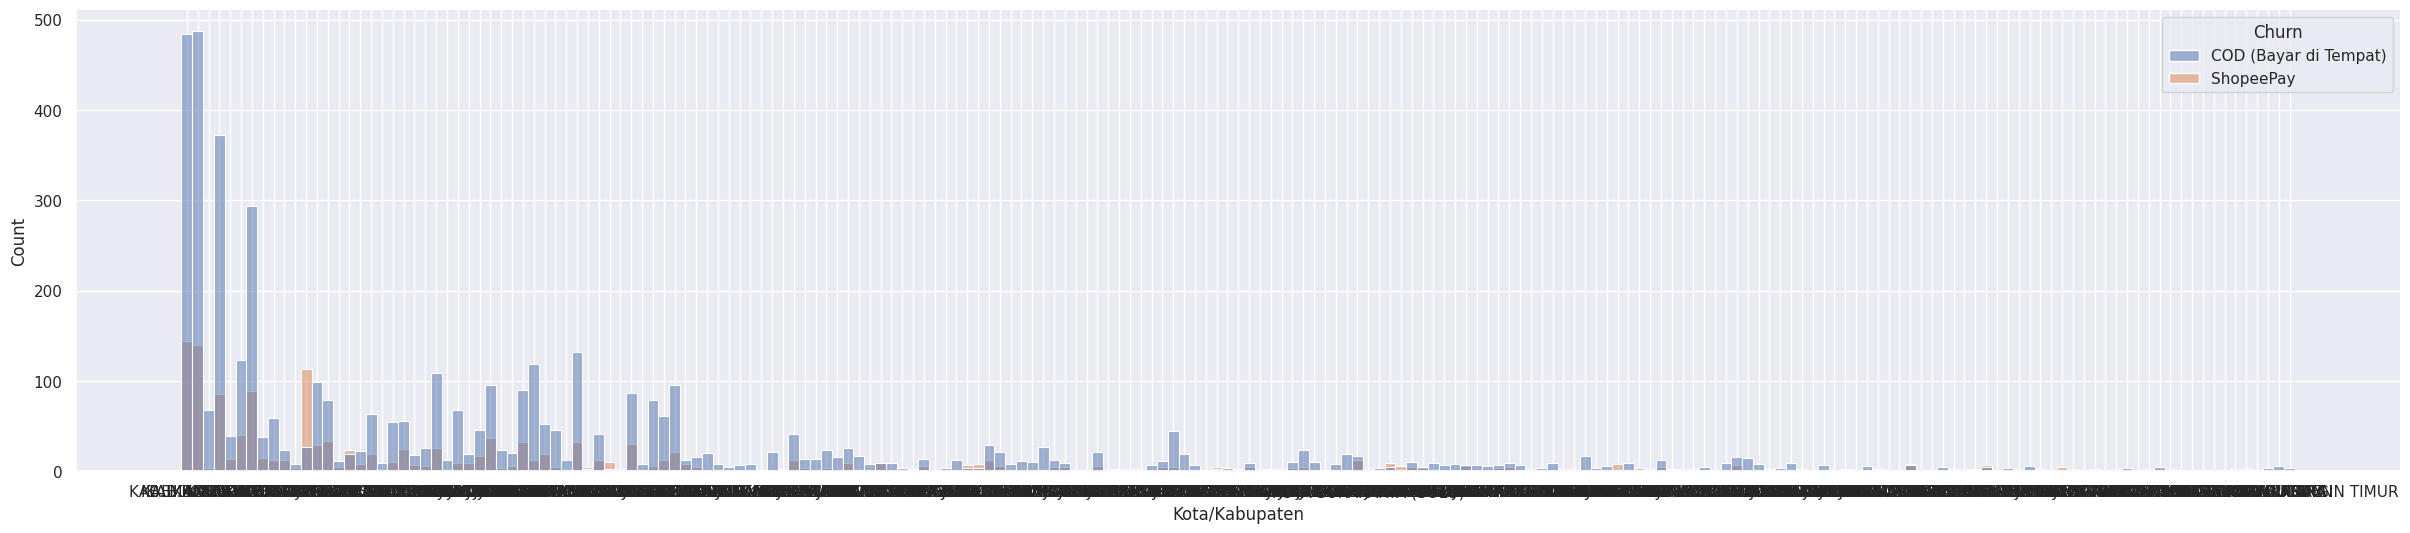

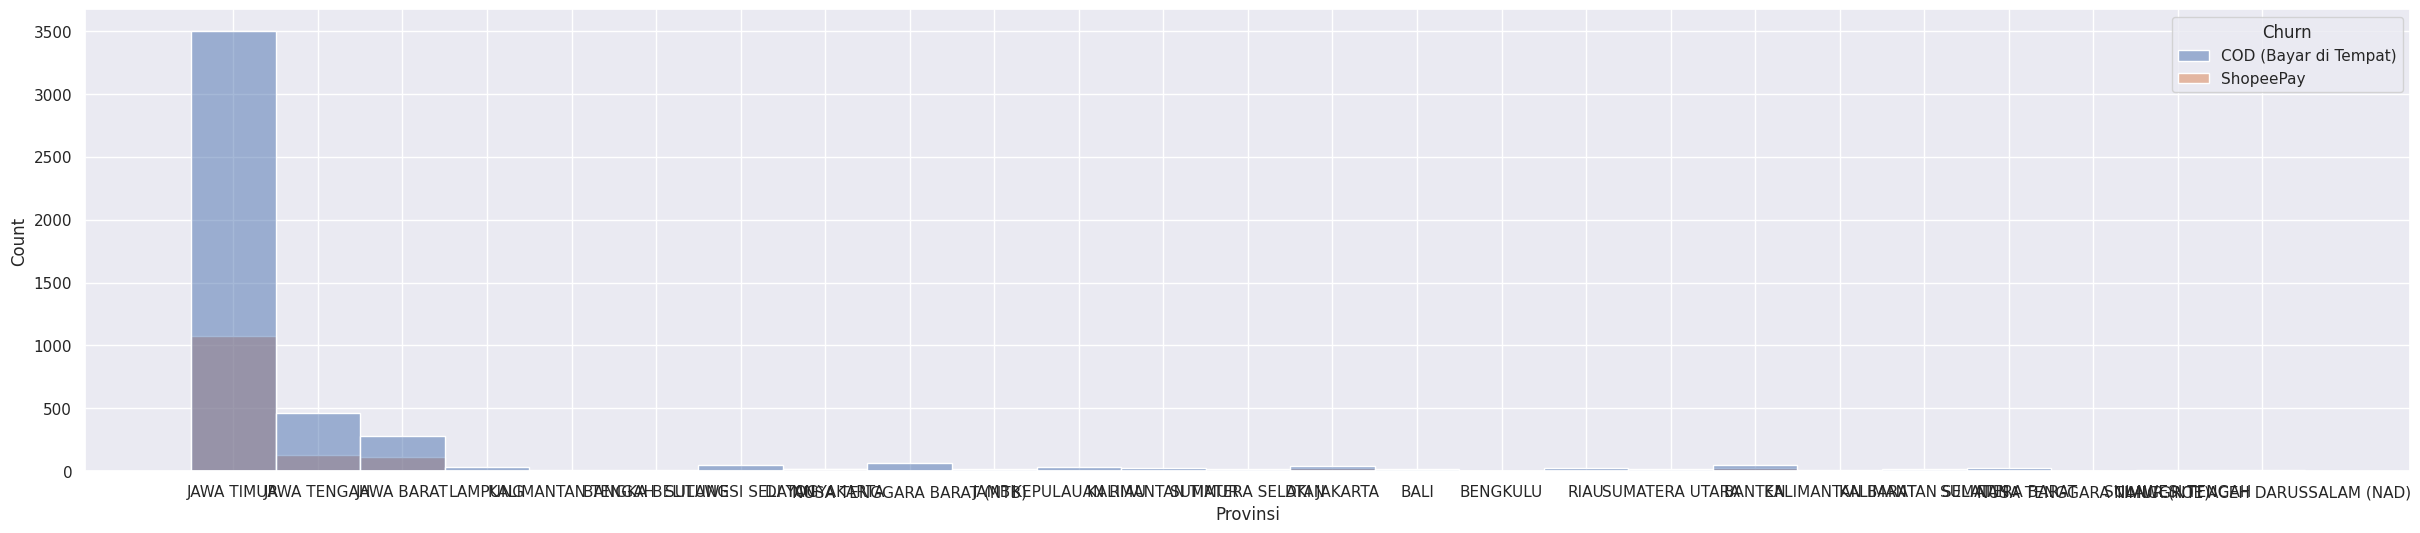

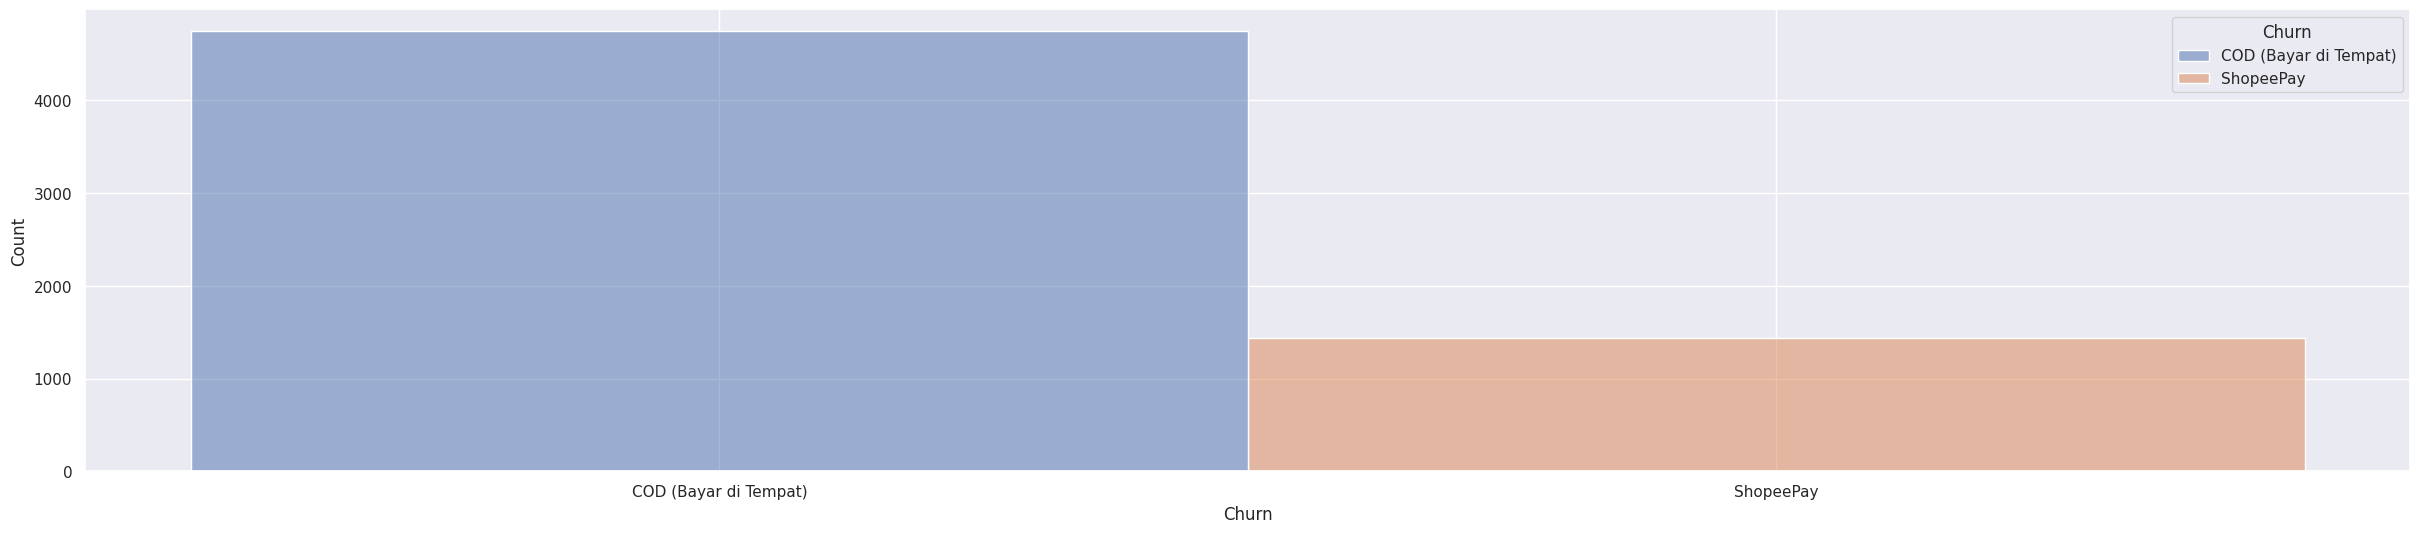

In [ ]:
for feature in num:
    fig, ax = plt.subplots(figsize=(30, 6))
    exp2(feature)

## Heatmap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-38-609c3e347655>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

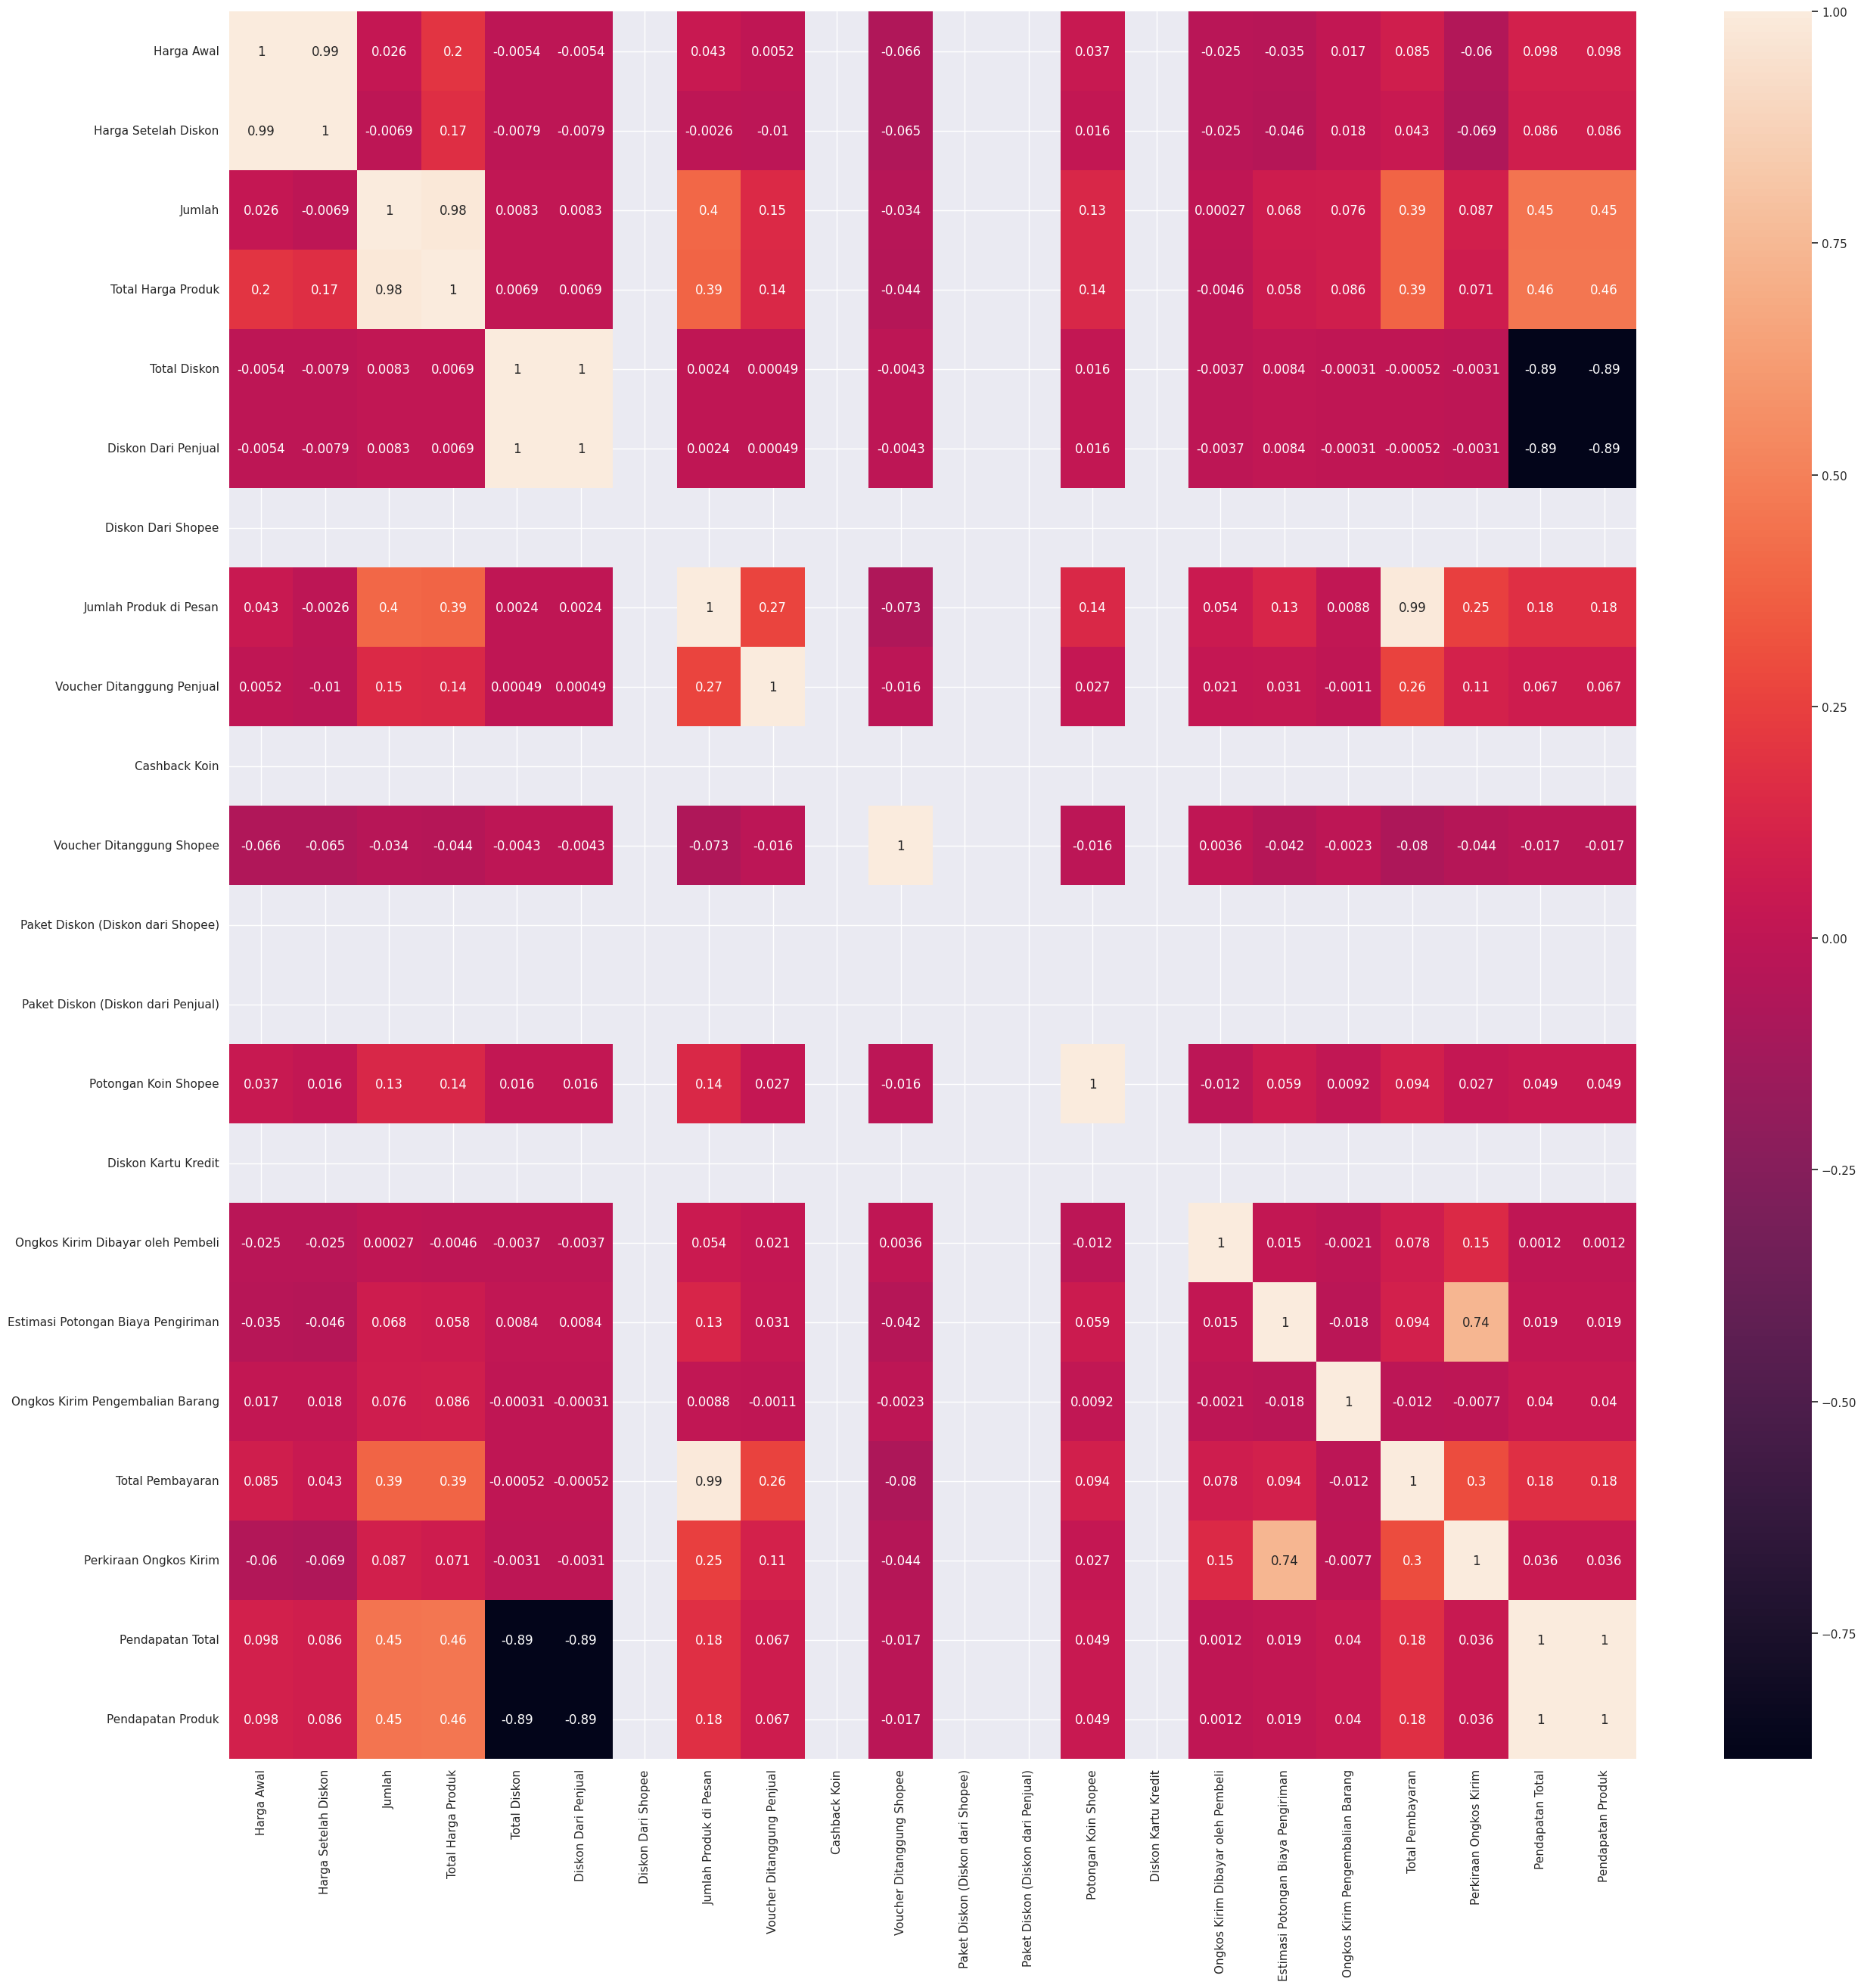

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True)

# Analisis Lanjutan Dalam Mengidentifikasi Churn Untuk Memepertahankan Pelanggan yang Aktif dengan Metode Pembayaran "COD (Bayar di Tempat)"

## Proses analisis dan visualisasi untuk mengetahui jumlah pesanan yang menggunakan metode COD per bulannya

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


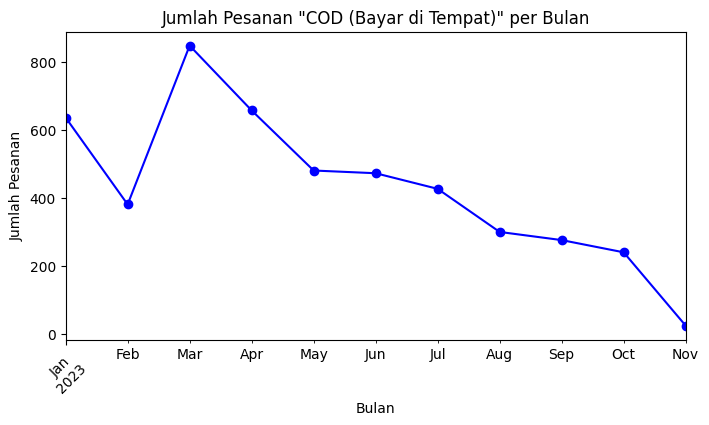

Jumlah Pesanan COD (Bayar di Tempat) per Bulan:
Bulan
2023-01    637
2023-02    381
2023-03    849
2023-04    658
2023-05    481
2023-06    473
2023-07    427
2023-08    300
2023-09    276
2023-10    240
2023-11     24
Freq: M, Name: No. Pesanan, dtype: int64


In [ ]:
# Mengubah kolom 'Waktu Pesanan Selesai' menjadi format datetime
df['Waktu Pesanan Selesai'] = pd.to_datetime(df['Waktu Pesanan Selesai'], format='%d/%m/%y %H.%M')

# Menambah kolom 'Bulan' untuk pengelompokan
df['Bulan'] = df['Waktu Pesanan Selesai'].dt.to_period('M')

# Filter data untuk metode pembayaran "COD (Bayar di Tempat)"
df_cod = df[df['Metode Pembayaran'] == 'COD (Bayar di Tempat)']

# Menghitung jumlah pesanan per bulan
pesanan_per_bulan_cod = df_cod.groupby('Bulan')['No. Pesanan'].count()

# Visualisasi jumlah pesanan per bulan
plt.figure(figsize=(8, 4))
pesanan_per_bulan_cod.plot(kind='line', marker='o', color='blue')
plt.title('Jumlah Pesanan "COD (Bayar di Tempat)" per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

# Menampilkan informasi jumlah pelanggan per kota/kabupaten
print("Jumlah Pesanan COD (Bayar di Tempat) per Bulan:")
print(pesanan_per_bulan_cod)

## Jenis Produk yang Dibeli oleh Pelanggan Aktif dan Pelanggan Churn

In [ ]:
# Analisis jenis produk yang dibeli oleh pelanggan aktif
jenis_produk_dibeli_aktif = df[~df['Username (Pembeli)'].isin(churned_customers.index)]['Nama Produk'].value_counts()
print("Jenis Produk yang Dibeli oleh Pelanggan Aktif:")
print(jenis_produk_dibeli_aktif)
print("")

# Analisis jenis produk yang dibeli oleh pelanggan churn
jenis_produk_dibeli_churn = df[df['Username (Pembeli)'].isin(churned_customers.index)]['Nama Produk'].value_counts()
print("Jenis Produk yang Dibeli oleh Pelanggan Churn:")
print(jenis_produk_dibeli_churn)


Jenis Produk yang Dibeli oleh Pelanggan Aktif:
Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet                                      2933
Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet                             726
Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab instan/Hijab jersey/Bergo pet                             61
Hamidah Serut/Hijab Serut/Jilbab Instan/Bergo Jersey Serut/Bergo Hamidah                                 21
NEW ARRIVAL KULOT CRINKLE AIRFLOW/ KULOT KANCING/ KULOT HIGHWAIST CRINKLE/ KULOT KERJA/ KULOT DAILY       6
SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJAB ANTI LETOY JAHIT FULL TEPI                               4
Name: Nama Produk, dtype: int64

Jenis Produk yang Dibeli oleh Pelanggan Churn:
Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet                                      2080
Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab Instan/Bergo Jersey/Hijab pet                             327
Bergo Ham

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mengidentifikasi Churn berdasarkan Opsi Pembayaran
df['Churn'] = df['Metode Pembayaran'].apply(lambda x: 'COD (Bayar di Tempat)' if x == 'COD (Bayar di Tempat)' else 'ShopeePay')

# Filter data untuk metode pembayaran "COD (Bayar di Tempat)"
df_cod = df[df['Metode Pembayaran'] == 'COD (Bayar di Tempat)']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Mengidentifikasi jam-jam dengan tingkat churn yang tinggi untuk menjadi dasar dalam merancang strategi retensi pelanggan pada rentang waktu tersebut.**

## Proses analisis waktu pemesanan dan visualisasi berdasarkan tiap jam

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


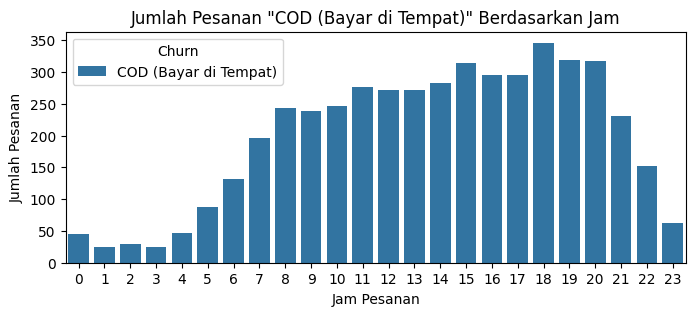

Jumlah Pesanan per Jam:


Jam Pesanan
0      45
1      25
2      30
3      24
4      47
5      87
6     131
7     196
8     243
9     238
10    247
11    276
12    271
13    272
14    282
15    314
16    295
17    295
18    346
19    319
20    318
21    231
22    152
23     62
Name: No. Pesanan, dtype: int64

In [ ]:
# Analisis waktu pemesanan
df['Jam Pesanan'] = df['Waktu Pesanan Dibuat'].dt.hour
df['Hari Pesanan'] = df['Waktu Pesanan Dibuat'].dt.day_name()

# Visualisasi jumlah pesanan berdasarkan jam
plt.figure(figsize=(8, 3))
sns.countplot(x='Jam Pesanan', data=df_cod, hue='Churn')
plt.title('Jumlah Pesanan "COD (Bayar di Tempat)" Berdasarkan Jam')
plt.xlabel('Jam Pesanan')
plt.ylabel('Jumlah Pesanan')
plt.show()
jumlah_pesanan_per_jam = df_cod.groupby('Jam Pesanan')['No. Pesanan'].count()
print("Jumlah Pesanan per Jam:")
jumlah_pesanan_per_jam


## Analisa segmentasi pelanggan

In [ ]:
# Analisis segmen pelanggan
segmentasi_pelanggan = df_cod.groupby(['Username (Pembeli)', 'Nama Produk'])['Jumlah'].count().reset_index()
segmentasi_pelanggan.sort_values(by='Jumlah', ascending=False, inplace=True)
print("Segmentasi Pelanggan:")
segmentasi_pelanggan

Segmentasi Pelanggan:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Username (Pembeli)                                        Nama Produk  \
956          donnydores  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
1763   marsitisukatiran  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
2488      ristaseptya14  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
2232  oliviayulianti225  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
3088       yayukarianty  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
...                 ...                                                ...   
1282        gondang0401  Bergo Hamidah M/Hamidah Sport/Hamidah M/Hijab ...   
1283       goodbyemoody  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
1285      grandisrambat  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
1291         h6opp42qfb  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
3225         zz3slvy9vl  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   

      Jumlah  
956       28  
1763      13  
2488       9  
2232       9  
3088       8  
...      ...  
1282       1  
1283       1  
1285       1  
1291       1  
3225       1  

[3226 rows x 3 columns]

## Proses analisis nilai rata-rata pesanan antara pelanggan churn dan aktif

In [ ]:
# Analisis nilai rata-rata pesanan
rata_rata_pesanan_churn = df[df['Username (Pembeli)'].isin(churned_customers.index)]['Total Harga Produk'].mean()
rata_rata_pesanan_aktif = df[~df['Username (Pembeli)'].isin(churned_customers.index)]['Total Harga Produk'].mean()
print("Rata-rata Pesanan Pelanggan Churn: {:.1f}".format(rata_rata_pesanan_churn))
print("Rata-rata Pesanan Pelanggan Aktif: {:.1f}".format(rata_rata_pesanan_aktif))

Rata-rata Pesanan Pelanggan Churn: 21.9
Rata-rata Pesanan Pelanggan Aktif: 23.2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
 #Simpan data setelah analisis churn ke dalam file CSV
df_after_churn_analysis = df  # Ganti ini dengan DataFrame setelah analisis churn
df_after_churn_analysis.to_csv('data_after_churn_analysis.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Simpan data setelah analisis pembayaran "COD (Bayar di Tempat)" ke dalam file CSV
df_cod.to_csv('data_after_cod_analysis.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Kesimpulan Analisis Churn Dalam Mmepertahankan Pelanggan yang Aktif dengan Metode Pembayaran "COD (Bayar di Tempat)"**



**Analisis Waktu Pemesanan:**

Terdapat visualisasi jumlah pesanan "COD (Bayar di Tempat)" berdasarkan jam pemesanan, yang dapat memberikan wawasan tentang jam-jam dengan tingkat churn yang tinggi.

**Jenis Produk yang Dibeli:**

Pelanggan aktif cenderung membeli berbagai jenis produk, dengan mayoritas memilih "Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet."

Pelanggan yang dianggap churn juga cenderung membeli jenis produk yang serupa, dengan dominasi pada produk "Hamidah Sport/Bergo Hamidah S/Hijab Instan/Bergo Jersey/Hijab pet."

**Segmentasi Pelanggan:**

Terdapat segmentasi pelanggan berdasarkan jumlah dan jenis produk yang dibeli, memberikan informasi tentang preferensi pelanggan.

**Rata-rata Pesanan:**

Rata-rata pesanan pelanggan churn adalah 21.0, sedangkan rata-rata pesanan pelanggan aktif adalah 22.3.

# **Alasan Kenapa Terjadinya Churn, Pada Penurunan Penjualan**

Dari hasil analisis tersebut, terdapat penyebab churn dan penurunan penjualan antara lain:

1. **Metode Pembayaran:**

 - Mayoritas pelanggan yang churn memilih metode pembayaran "COD (Bayar di Tempat)" (76.73%).
 - Metode pembayaran "ShopeePay" hanya menyumbang sekitar 23.26% dari total churn.
 - Perlu dilakukan peninjauan terhadap metode pembayaran "ShopeePay" untuk memahami apakah ada isu atau kendala tertentu yang mungkin membuat pelanggan beralih.

2. **Waktu Pemesanan:**
 - Visualisasi jumlah pesanan "COD (Bayar di Tempat)" berdasarkan jam pemesanan menunjukkan adanya jam-jam tertentu dengan tingkat churn yang tinggi.

3. **Jenis Produk yang Dibeli:**
 - Pelanggan aktif dan pelanggan churn cenderung membeli jenis produk serupa.

4. **Segmentasi Pelanggan:**
 - Terdapat segmentasi pelanggan berdasarkan jumlah dan jenis produk yang dibeli.

5. **Rata-rata Pesanan:**
 - Rata-rata pesanan pelanggan churn adalah 21.0, sedangkan rata-rata pesanan pelanggan aktif adalah 22.3.

## **Rekomendasi Strategi Retensi**


**Fokus pada Metode Pembayaran "COD (Bayar di Tempat)":**

Karena metode pembayaran "COD (Bayar di Tempat)" memiliki tingkat churn yang tinggi, strategi retensi dapat difokuskan pada peningkatan kenyamanan dan kepercayaan pelanggan pada metode pembayaran ini.


**Pemahaman Lebih Lanjut tentang Jenis Produk yang Diminati:**

Analisis jenis produk dapat membantu dalam menyusun strategi pemasaran yang lebih terarah untuk mempertahankan pelanggan aktif dan menarik pelanggan yang berpotensi "churn".


**Optimalkan Jam Pemesanan:**

Memahami pola pesanan pada jam-jam tertentu dapat membantu dalam menyusun penawaran khusus atau promosi pada rentang waktu tersebut untuk meningkatkan retensi.

Siasati dengan strategi pemasaran khusus, diskon waktu terbatas, atau promosi untuk mendorong pembelian selama periode waktu tersebut.


**Segmentasi Pelanggan:**

Segmentasi pelanggan dapat membantu dalam menyusun strategi pelayanan yang lebih personal dan sesuai dengan preferensi masing-masing kelompok pelanggan.


**Monitoring dan Evaluasi Periodik:**

Langkah-langkah retensi yang diimplementasikan perlu dipantau secara berkala untuk mengevaluasi efektivitasnya dan melakukan penyesuaian jika diperlukan.

Dengan memahami pola perilaku pelanggan, terutama pada metode pembayaran "COD (Bayar di Tempat)", bisnis dapat mengoptimalkan strategi retensi untuk mempertahankan pelanggan yang aktif dan meminimalkan tingkat churn.


**Meningkatkan promosi produk hijab Hamidah Sport:**

Produk hijab Hamidah Sport merupakan produk yang paling banyak dibeli oleh pelanggan churn. Oleh karena itu, toko dapat meningkatkan promosi produk ini untuk menarik minat pelanggan baru dan mempertahankan pelanggan aktif. Promosi dapat dilakukan melalui berbagai saluran, seperti media sosial, iklan online, atau promosi offline di toko.


**Program Loyalitas:**

Implementasikan program loyalitas untuk pelanggan aktif dengan memberikan reward atau diskon khusus bagi mereka yang sering berbelanja.


**Analisis Feedback Pelanggan:**

Perhatikan ulasan atau feedback pelanggan untuk memahami kebutuhan dan preferensi mereka.
Pertimbangkan untuk mengadakan survei atau kuesioner untuk mendapatkan umpan balik langsung dari pelanggan.


**Personalisasi Pengalaman Pelanggan:**

Gunakan data pelanggan untuk memberikan pengalaman yang lebih personal, misalnya, rekomendasi produk yang sesuai dengan sejarah pembelian mereka.


**Analisis Lokasi:**

Tinjau lokasi geografis pelanggan untuk mengidentifikasi area dengan tingkat churn yang tinggi.
Sesuaikan strategi pemasaran atau promosi untuk target khusus di wilayah-wilayah tersebut.

# **Pivot Table**

Bagaimana total jumlah produk yang dipesan berdasarkan jenis voucher (ditanggung penjual atau Shopee)?

## Membuat pivot table untuk mengetahui jumlah pesanan berdasarkan voucher yg ditanggung Shopee dan ditanggung penjual

In [ ]:
pivot_table = df.groupby(["Voucher Ditanggung Penjual", "Voucher Ditanggung Shopee"])["No. Pesanan"].count().reset_index()
pivot_table.columns = ["Voucher Ditanggung Penjual", "Voucher Ditanggung Shopee", "Jumlah Pesanan"]
pivot_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Voucher Ditanggung Penjual  Voucher Ditanggung Shopee  Jumlah Pesanan
0                        0.000                      0.000            5249
1                        0.000                      1.144               1
2                        0.000                      1.145              29
3                        0.000                      1.240               1
4                        0.000                      1.295               1
..                         ...                        ...             ...
94                       3.852                      0.000               6
95                       4.122                      0.000               2
96                       6.600                      0.000               3
97                       8.391                      0.000               3
98                       9.639                      0.000               9

[99 rows x 3 columns]

In [ ]:
df.groupby(by=["Nama Produk", "Voucher Ditanggung Shopee", "Voucher Ditanggung Penjual"]).agg({
    "Jumlah": "sum",
    })


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Jumlah
Nama Produk                                        Voucher Ditanggung Shopee Voucher Ditanggung Penjual        
Bergo Hamidah L/Hamidah Oval/Hijab Bergo/Hijab ... 0.000                     0.000                           59
                                                   1.295                     0.000                            1
                                                   2.540                     0.000                            2
                                                   2.590                     0.000                            2
                                                   2.690                     0.000                            1
...                                                                                                         ...
NEW ARRIVAL KULOT CRINKLE AIRFLOW/ KULOT KANCIN... 4.290                     0.000                            1
                                                   8.580                     0.000                            2
                                                   10.000                    0.000                            2
SEGIEMPAT PARIS PREMIUM POLOS BASIC SQUARE HIJA... 0.000                     0.000                            3
                                                                             2.358                            1

[143 rows x 1 columns]

# **Cohort Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 49 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   No. Pesanan                                                   6185 non-null   object        
 1   Status Pesanan                                                6185 non-null   object        
 2   Status Pembatalan/ Pengembalian                               6185 non-null   object        
 3   Opsi Pengiriman                                               6185 non-null   object        
 4   Antar ke counter/ pick-up                                     6185 non-null   object        
 5   Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  6185 non-null   datetime64[ns]
 6   Waktu Pengiriman Diatur                                       6185 non-null   datetime64[ns]
 7   Waktu 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Waktu Pesanan Selesai'] = df['Waktu Pesanan Selesai'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Reformat Timestamp

In [ ]:
import dateutil
from datetime import datetime as dt
from pytz import utc

df['datetime'] = df['Waktu Pesanan Selesai'].apply(lambda x: dateutil.parser.parse(x).timestamp())
df['month'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).month)
df['year'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).year)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. Pesanan Status Pesanan Status Pembatalan/ Pengembalian  \
0  23010160M3FU4A        Selesai                       Tidak ada   
1  230101758PUTWU        Selesai                       Tidak ada   
2  2301016N6NT8B5        Selesai                       Tidak ada   
3  2301016N6NT8B5        Selesai                       Tidak ada   
4  2301016N6NT8B5        Selesai                       Tidak ada   

                  Opsi Pengiriman Antar ke counter/ pick-up  \
0  Reguler (Cashless)-J&T Express          Antar ke Counter   
1  Reguler (Cashless)-J&T Express          Antar ke Counter   
2  Reguler (Cashless)-J&T Express          Antar ke Counter   
3  Reguler (Cashless)-J&T Express          Antar ke Counter   
4  Reguler (Cashless)-J&T Express          Antar ke Counter   

  Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  \
0                                2023-01-03 00:27:00             
1                                2023-01-03 11:23:00             
2                                2023-01-03 06:35:00             
3                                2023-01-03 06:35:00             
4                                2023-01-03 06:35:00             

  Waktu Pengiriman Diatur Waktu Pesanan Dibuat Waktu Pembayaran Dilakukan  \
0     2023-01-01 16:48:00  2023-01-01 00:27:00        2023-01-01 00:27:00   
1     2023-01-01 16:48:00  2023-01-01 11:23:00        2023-01-01 11:23:00   
2     2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
3     2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
4     2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   

       Metode Pembayaran                                        Nama Produk  \
0  COD (Bayar di Tempat)  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
1  COD (Bayar di Tempat)  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
2  COD (Bayar di Tempat)  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
3  COD (Bayar di Tempat)  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
4  COD (Bayar di Tempat)  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   

         Nama Variasi  Harga Awal  Harga Setelah Diskon  Jumlah  \
0     Hitam,(S) 60x60          19                    19       1   
1     Latte,(S) 60x60          19                    19       1   
2     Mocca,(S) 60x60          19                    19       1   
3     Hitam,(S) 60x60          19                    19       1   
4  Charcoal,(S) 60x60          19                    19       1   

   Total Harga Produk  Total Diskon  Diskon Dari Penjual  Diskon Dari Shopee  \
0                  19             0                    0                   0   
1                  19             0                    0                   0   
2                  19             0                    0                   0   
3                  19             0                    0                   0   
4                  19             0                    0                   0   

  Berat Produk  Jumlah Produk di Pesan Total Berat  \
0        83 gr                       1       83 gr   
1        83 gr                       1       83 gr   
2        83 gr                       3      249 gr   
3        83 gr                       3      249 gr   
4        83 gr                       3      249 gr   

   Voucher Ditanggung Penjual  Cashback Koin  Voucher Ditanggung Shopee  \
0                           0              0                          0   
1                           0              0                          0   
2                           0              0                          0   
3                           0              0                          0   
4                           0              0                          0   

  Paket Diskon  Paket Diskon (Diskon dari Shopee)  \
0            N                                  0   
1            N                                  0   
2            N                                  0   
3          

## Membuat Cohort

In [ ]:
df['cohort'] = df.apply(lambda row: (row['year'] * 100) + (row['month']), axis=1)
# 2023 * 100 = 2023 00
# Aug -> 202300 + 08 = 202308

cohorts = df.groupby('No. Pesanan')['cohort'].min().reset_index()
cohorts.columns = ['No. Pesanan', 'first_cohort']

df = df.merge(cohorts, on='No. Pesanan', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cohorts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. Pesanan  first_cohort
0     230101602B57GP        202301
1     23010160M3FU4A        202301
2     230101614E5AKY        202301
3     23010164KWUH04        202301
4     23010164NPYFDS        202301
...              ...           ...
4312  231030APCJX33T        202311
4313  231030ASR2UWRD        202311
4314  231031CUMWUKHX        202311
4315  231031DB0T90WE        202311
4316  231031DDA2C57B        202311

[4317 rows x 2 columns]

## Membuat header untuk setiap cohorts dan menampilkannya

In [ ]:
headers = df['cohort'].value_counts().reset_index()
headers.columns = ['Cohorts', 'Count']
headers.head()
headers = headers.sort_values(['Cohorts'])['Cohorts'].to_list()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
headers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[202301,
 202302,
 202303,
 202304,
 202305,
 202306,
 202307,
 202308,
 202309,
 202310,
 202311]

## Membuat pivot data berdasarkan cohort

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. Pesanan Status Pesanan Status Pembatalan/ Pengembalian  \
0  23010160M3FU4A        Selesai                       Tidak ada   
1  230101758PUTWU        Selesai                       Tidak ada   
2  2301016N6NT8B5        Selesai                       Tidak ada   
3  2301016N6NT8B5        Selesai                       Tidak ada   
4  2301016N6NT8B5        Selesai                       Tidak ada   

                  Opsi Pengiriman Antar ke counter/ pick-up  \
0  Reguler (Cashless)-J&T Express          Antar ke Counter   
1  Reguler (Cashless)-J&T Express          Antar ke Counter   
2  Reguler (Cashless)-J&T Express          Antar ke Counter   
3  Reguler (Cashless)-J&T Express          Antar ke Counter   
4  Reguler (Cashless)-J&T Express          Antar ke Counter   

  Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  \
0                                2023-01-03 00:27:00             
1                                2023-01-03 11:23:00             
2                                2023-01-03 06:35:00             
3                                2023-01-03 06:35:00             
4                                2023-01-03 06:35:00             

  Waktu Pengiriman Diatur Waktu Pesanan Dibuat Waktu Pembayaran Dilakukan  \
0     2023-01-01 16:48:00  2023-01-01 00:27:00        2023-01-01 00:27:00   
1     2023-01-01 16:48:00  2023-01-01 11:23:00        2023-01-01 11:23:00   
2     2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
3     2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
4     2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   

       Metode Pembayaran                                        Nama Produk  \
0  COD (Bayar di Tempat)  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
1  COD (Bayar di Tempat)  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
2  COD (Bayar di Tempat)  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
3  COD (Bayar di Tempat)  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   
4  COD (Bayar di Tempat)  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...   

         Nama Variasi  Harga Awal  Harga Setelah Diskon  Jumlah  \
0     Hitam,(S) 60x60      19.899                19.899       1   
1     Latte,(S) 60x60      19.899                19.899       1   
2     Mocca,(S) 60x60      19.899                19.899       1   
3     Hitam,(S) 60x60      19.899                19.899       1   
4  Charcoal,(S) 60x60      19.899                19.899       1   

   Total Harga Produk  Total Diskon  Diskon Dari Penjual  Diskon Dari Shopee  \
0              19.899           0.0                  0.0                   0   
1              19.899           0.0                  0.0                   0   
2              19.899           0.0                  0.0                   0   
3              19.899           0.0                  0.0                   0   
4              19.899           0.0                  0.0                   0   

  Berat Produk  Jumlah Produk di Pesan Total Berat  \
0        83 gr                       1       83 gr   
1        83 gr                       1       83 gr   
2        83 gr                       3      249 gr   
3        83 gr                       3      249 gr   
4        83 gr                       3      249 gr   

   Voucher Ditanggung Penjual  Cashback Koin  Voucher Ditanggung Shopee  \
0                         0.0              0                        0.0   
1                         0.0              0                        0.0   
2                         0.0              0                        0.0   
3                         0.0              0                        0.0   
4                         0.0              0                        0.0   

  Paket Diskon  Paket Diskon (Diskon dari Shopee)  \
0            N                                  0   
1            N                                  0   
2            N                                  0   
3          

In [ ]:
df.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['cohort_distance'] = df.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort'])) if (row['first_cohort'] != 0 and row['cohort'] != 0) else np.nan, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. Pesanan Status Pesanan Status Pembatalan/ Pengembalian  \
0     23010160M3FU4A        Selesai                       Tidak ada   
1     230101758PUTWU        Selesai                       Tidak ada   
2     2301016N6NT8B5        Selesai                       Tidak ada   
3     2301016N6NT8B5        Selesai                       Tidak ada   
4     2301016N6NT8B5        Selesai                       Tidak ada   
...              ...            ...                             ...   
6180  231030AC5EFGFV        Selesai                       Tidak ada   
6181  231030AN1G0BC2        Selesai                       Tidak ada   
6182  231030AB3XHSNQ        Selesai                       Tidak ada   
6183  23102853BYQ4YN        Selesai                       Tidak ada   
6184  23102853BYQ4YN        Selesai                       Tidak ada   

                      Opsi Pengiriman Antar ke counter/ pick-up  \
0      Reguler (Cashless)-J&T Express          Antar ke Counter   
1      Reguler (Cashless)-J&T Express          Antar ke Counter   
2      Reguler (Cashless)-J&T Express          Antar ke Counter   
3      Reguler (Cashless)-J&T Express          Antar ke Counter   
4      Reguler (Cashless)-J&T Express          Antar ke Counter   
...                               ...                       ...   
6180  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6181  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6182  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6183                Hemat-J&T Economy          Antar ke Counter   
6184                Hemat-J&T Economy          Antar ke Counter   

     Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  \
0                                   2023-01-03 00:27:00             
1                                   2023-01-03 11:23:00             
2                                   2023-01-03 06:35:00             
3                                   2023-01-03 06:35:00             
4                                   2023-01-03 06:35:00             
...                                                 ...             
6180                                2023-11-01 16:17:00             
6181                                2023-11-01 18:56:00             
6182                                2023-11-01 16:00:00             
6183                                2023-10-31 13:58:00             
6184                                2023-10-31 13:58:00             

     Waktu Pengiriman Diatur Waktu Pesanan Dibuat Waktu Pembayaran Dilakukan  \
0        2023-01-01 16:48:00  2023-01-01 00:27:00        2023-01-01 00:27:00   
1        2023-01-01 16:48:00  2023-01-01 11:23:00        2023-01-01 11:23:00   
2        2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
3        2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
4        2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
...                      ...                  ...                        ...   
6180     2023-11-01 17:27:00  2023-10-30 16:17:00        2023-10-30 16:17:00   
6181     2023-11-01 17:27:00  2023-10-30 18:56:00        2023-10-30 18:56:00   
6182     2023-11-01 17:26:00  2023-10-30 15:59:00        2023-10-30 16:00:00   
6183     2023-10-29 16:11:00  2023-10-28 13:57:00        2023-10-28 13:58:00   
6184     2023-10-29 16:11:00  2023-10-28 13:57:00        2023-10-28 13:58:00   

          Metode Pembayaran  \
0     COD (Bayar di Tempat)   
1     COD (Bayar di Tempat)   
2     COD (Bayar di Tempat)   
3     COD (Bayar di Tempat)   
4     COD (Bayar di Tempat)   
...                     ...   
6180  COD (Bayar di Tempat)   
6181  COD (Bayar di Tempat)   
6182  COD (Bayar di Tempat)   
6183  COD (Bayar di Tempat)   
6184  COD (Bayar di Tempat)   

                                            Nama Produk        Nama Variasi  \
0     Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...     Hitam,(S) 60x60   
1     Hamidah Sport/Bergo Hami

In [ ]:
cohort_pivot = pd.pivot_table(df,
                              index='first_cohort',
                              columns='cohort_distance',
                              values='No. Pesanan',
                              aggfunc=pd.Series.nunique)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cohort_pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cohort_distance    0
first_cohort        
202301           622
202302           357
202303           720
202304           609
202305           431
202306           441
202307           381
202308           253
202309           257
202310           216
202311            22

## Heatmap Cohort

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


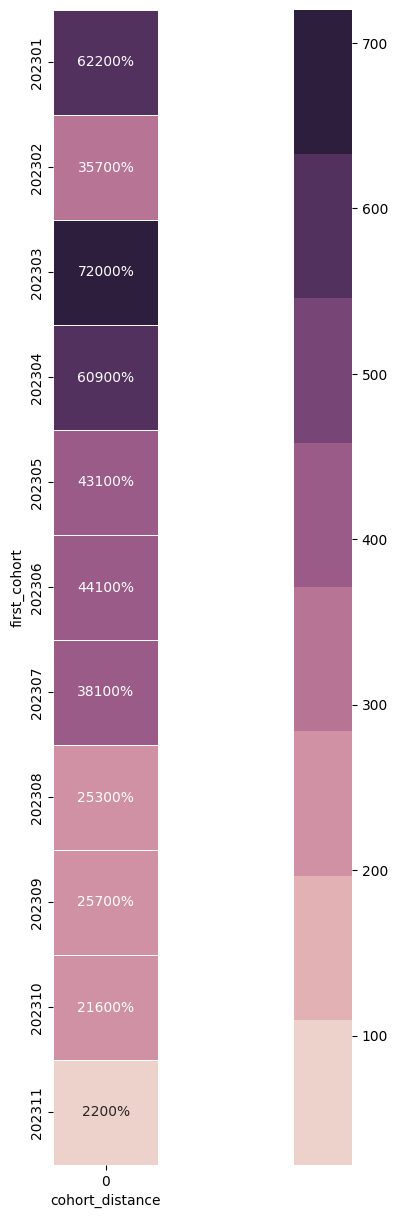

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig_dims = (35, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', mask=cohort_pivot.isnull(), ax=ax, square=True, linewidths=.5, cmap=sns.cubehelix_palette(8))

plt.show()

# **SQL**
[Hasil Analisa Menggunakan SQL](https://drive.google.com/drive/folders/1Lh2hDNBmPEU2_MmmENKtjkm8BObtK1Ft?usp=sharing)

# **Statistik Inferensial**

Bagaimana ketersediaan voucher yang ditanggung oleh penjual atau Shopee memengaruhi jumlah pesanan? Apakah ada bukti statistik yang menunjukkan hubungan ini?

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. Pesanan Status Pesanan Status Pembatalan/ Pengembalian  \
0     23010160M3FU4A        Selesai                       Tidak ada   
1     230101758PUTWU        Selesai                       Tidak ada   
2     2301016N6NT8B5        Selesai                       Tidak ada   
3     2301016N6NT8B5        Selesai                       Tidak ada   
4     2301016N6NT8B5        Selesai                       Tidak ada   
...              ...            ...                             ...   
6180  231030AC5EFGFV        Selesai                       Tidak ada   
6181  231030AN1G0BC2        Selesai                       Tidak ada   
6182  231030AB3XHSNQ        Selesai                       Tidak ada   
6183  23102853BYQ4YN        Selesai                       Tidak ada   
6184  23102853BYQ4YN        Selesai                       Tidak ada   

                      Opsi Pengiriman Antar ke counter/ pick-up  \
0      Reguler (Cashless)-J&T Express          Antar ke Counter   
1      Reguler (Cashless)-J&T Express          Antar ke Counter   
2      Reguler (Cashless)-J&T Express          Antar ke Counter   
3      Reguler (Cashless)-J&T Express          Antar ke Counter   
4      Reguler (Cashless)-J&T Express          Antar ke Counter   
...                               ...                       ...   
6180  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6181  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6182  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6183                Hemat-J&T Economy          Antar ke Counter   
6184                Hemat-J&T Economy          Antar ke Counter   

     Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  \
0                                   2023-01-03 00:27:00             
1                                   2023-01-03 11:23:00             
2                                   2023-01-03 06:35:00             
3                                   2023-01-03 06:35:00             
4                                   2023-01-03 06:35:00             
...                                                 ...             
6180                                2023-11-01 16:17:00             
6181                                2023-11-01 18:56:00             
6182                                2023-11-01 16:00:00             
6183                                2023-10-31 13:58:00             
6184                                2023-10-31 13:58:00             

     Waktu Pengiriman Diatur Waktu Pesanan Dibuat Waktu Pembayaran Dilakukan  \
0        2023-01-01 16:48:00  2023-01-01 00:27:00        2023-01-01 00:27:00   
1        2023-01-01 16:48:00  2023-01-01 11:23:00        2023-01-01 11:23:00   
2        2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
3        2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
4        2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
...                      ...                  ...                        ...   
6180     2023-11-01 17:27:00  2023-10-30 16:17:00        2023-10-30 16:17:00   
6181     2023-11-01 17:27:00  2023-10-30 18:56:00        2023-10-30 18:56:00   
6182     2023-11-01 17:26:00  2023-10-30 15:59:00        2023-10-30 16:00:00   
6183     2023-10-29 16:11:00  2023-10-28 13:57:00        2023-10-28 13:58:00   
6184     2023-10-29 16:11:00  2023-10-28 13:57:00        2023-10-28 13:58:00   

          Metode Pembayaran  \
0     COD (Bayar di Tempat)   
1     COD (Bayar di Tempat)   
2     COD (Bayar di Tempat)   
3     COD (Bayar di Tempat)   
4     COD (Bayar di Tempat)   
...                     ...   
6180  COD (Bayar di Tempat)   
6181  COD (Bayar di Tempat)   
6182  COD (Bayar di Tempat)   
6183  COD (Bayar di Tempat)   
6184  COD (Bayar di Tempat)   

                                            Nama Produk        Nama Variasi  \
0     Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...     Hitam,(S) 60x60   
1     Hamidah Sport/Bergo Hami

In [ ]:
# Statistik deskriptif 'Voucher di tanggung penjual'
penjual = df['Voucher Ditanggung Penjual'].describe()

# Statistik deskriptif Voucher di tanggung shopee'
shopee = df['Voucher Ditanggung Shopee'].describe()


print("Statistik Deskriptif Voucher di tanggung penjual:")
print(penjual)
print("\nStatistik Deskriptif Voucher di tanggung shopee:")
print(shopee)

Statistik Deskriptif Voucher di tanggung penjual:
count    6174.000000
mean        0.042274
std         0.471093
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Voucher Ditanggung Penjual, dtype: float64

Statistik Deskriptif Voucher di tanggung shopee:
count    6174.000000
mean       30.829284
std       170.089402
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       996.000000
Name: Voucher Ditanggung Shopee, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Voucher Ditanggung Penjual:**

Rata-rata jumlah voucher yang ditanggung penjual adalah sekitar 0.042, dengan standar deviasi sekitar 0.471093.

Jumlah voucher yang ditanggung penjual bervariasi dari 0 hingga maksimal 9.

Sebagian besar data (75%) memiliki nilai 0, dan 25% lainnya juga memiliki nilai 0.

Terdapat ketidaksimetrisan dalam distribusi, di mana sebagian besar data berkumpul di nilai 0, dengan nilai rata-rata dan median yang rendah.

**Voucher Ditanggung Shopee:**

Rata-rata jumlah voucher yang ditanggung Shopee lebih tinggi, yaitu sekitar 30.829284, dengan standar deviasi yang cukup besar, yaitu sekitar 170.089402.

Jumlah voucher yang ditanggung Shopee bervariasi dari 0 hingga maksimal 996.

Sebagian besar data (75%) memiliki nilai 0, dan distribusi juga menunjukkan ketidaksimetrisan dengan sebagian besar data yang berkumpul di nilai 0.

Rata-rata lebih tinggi dari median, menunjukkan adanya nilai yang tinggi di beberapa kasus.

# **Regeresi Linear**

Apakah terdapat korelasi antara variabel "Voucher Ditanggung Penjual" dan "Voucher Ditanggung Shopee" dengan jumlah pesanan? Apakah korelasi tersebut positif atau negatif?

In [ ]:
import statsmodels.api as sm

# Menentukan variabel dependen (Y) dan variabel independen (X)
Y = df['Jumlah Produk di Pesan']
X = df[['Voucher Ditanggung Penjual']]

# Menambahkan konstanta (intercept) ke model
X = sm.add_constant(X)

# Membangun model regresi linier
model_penjual = sm.OLS(Y, X).fit()

# Melakukan analisis regresi
hasil_regresi = model_penjual.summary()

print(hasil_regresi)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                              OLS Regression Results                              
Dep. Variable:     Jumlah Produk di Pesan   R-squared:                       0.070
Model:                                OLS   Adj. R-squared:                  0.070
Method:                     Least Squares   F-statistic:                     466.2
Date:                    Wed, 29 Nov 2023   Prob (F-statistic):          9.69e-100
Time:                            20:31:36   Log-Likelihood:                -14370.
No. Observations:                    6174   AIC:                         2.874e+04
Df Residuals:                        6172   BIC:                         2.876e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Voucher Ditanggung Penjual:

Model regresi linear sederhana yang digunakan untuk memprediksi "Jumlah Produk di Pesan" dengan variabel independen "Voucher Ditanggung Penjual" menunjukkan bahwa terdapat hubungan positif antara jumlah voucher yang ditanggung penjual dengan jumlah produk yang dipesan oleh pelanggan.

R-squared sebesar 0.070 menunjukkan bahwa model dapat menjelaskan sekitar 7.0% variasi dalam "Jumlah Produk di Pesan."

Koefisien untuk "Voucher Ditanggung Penjual" sebesar 1.4474 menunjukkan bahwa setiap unit peningkatan dalam jumlah voucher yang ditanggung penjual berhubungan dengan peningkatan sekitar 1.4474 unit dalam "Jumlah Produk di Pesan."

P-value yang sangat rendah untuk koefisien "Voucher Ditanggung Penjual" (p < 0.05) menunjukkan bahwa hubungan ini sangat signifikan secara statistik.

Nilai skewness yang tinggi dan nilai kurtosis yang tinggi pada residual menunjukkan bahwa residual tidak terdistribusi normal, dan model mungkin tidak sempurna dalam menjelaskan variasi dalam "Jumlah Produk di Pesan."

In [ ]:
# Menentukan variabel dependen (Y) dan variabel independen (X)
Y = df['Jumlah Produk di Pesan']
X = df[['Voucher Ditanggung Shopee']]

# Menambahkan konstanta (intercept) ke model
X = sm.add_constant(X)

# Membangun model regresi linier
model_shopee = sm.OLS(Y, X).fit()

# Melakukan analisis regresi
hasil_regresi = model_shopee.summary()

print(hasil_regresi)


                              OLS Regression Results                              
Dep. Variable:     Jumlah Produk di Pesan   R-squared:                       0.005
Model:                                OLS   Adj. R-squared:                  0.005
Method:                     Least Squares   F-statistic:                     33.27
Date:                    Wed, 29 Nov 2023   Prob (F-statistic):           8.40e-09
Time:                            20:32:58   Log-Likelihood:                -14578.
No. Observations:                    6174   AIC:                         2.916e+04
Df Residuals:                        6172   BIC:                         2.917e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Voucher Ditanggung Shopee:

Model regresi linear sederhana yang digunakan untuk memprediksi "Jumlah Produk di Pesan" dengan variabel independen "Voucher Ditanggung Shopee" menunjukkan bahwa terdapat hubungan negatif antara jumlah voucher yang ditanggung Shopee dengan jumlah produk yang dipesan oleh pelanggan.

R-squared sebesar 0.005 menunjukkan bahwa model hanya dapat menjelaskan sekitar 0.5% variasi dalam "Jumlah Produk di Pesan."

Koefisien untuk "Voucher Ditanggung Shopee" sebesar -0.0011 menunjukkan bahwa setiap unit peningkatan dalam jumlah voucher yang ditanggung Shopee berhubungan dengan penurunan sekitar 0.0011 unit dalam "Jumlah Produk di Pesan."

P-value yang sangat rendah untuk koefisien "Voucher Ditanggung Shopee" (p < 0.05) menunjukkan bahwa hubungan ini sangat signifikan secara statistik.

Meskipun signifikan secara statistik, nilai R-squared yang rendah menandakan bahwa model ini mungkin tidak memberikan penjelasan yang kuat untuk variasi dalam "Jumlah Produk di Pesan."

# **Uji Hipotesis**

Hipotesis Nol (H0): Ketersediaan voucher yang ditanggung oleh penjual atau Shopee tidak memengaruhi peningkatan jumlah pesanan.

Hipotesis Alternatif (H1): Ketersediaan voucher yang ditanggung oleh penjual atau Shopee memengaruhi peningkatan jumlah pesanan.

In [ ]:
# Uji hipotesis dengan tingkat signifikansi 0.05 (5%)
alpha = 0.05

# Peroleh nilai p dari koefisien yang sesuai pada hasil regresi
p_value_penjual = model_penjual.pvalues['Voucher Ditanggung Penjual']
p_value_shopee = model_shopee.pvalues['Voucher Ditanggung Shopee']

# Print nilai p
print(f'Nilai p untuk Voucher Ditanggung Penjual: {p_value_penjual}')
print(f'Nilai p untuk Voucher Ditanggung Shopee: {p_value_shopee}')
print("")
# Bandingkan nilai p dengan tingkat signifikansi alpha
if p_value_penjual < alpha:
    print("Hipotesis nol (H0) ditolak. Voucher Ditanggung Penjual memengaruhi peningkatan jumlah pesanan.")
else:
    print("Hipotesis nol (H0) diterima. Tidak ada bukti bahwa Voucher Ditanggung Penjual memengaruhi peningkatan jumlah pesanan.")

if p_value_shopee < alpha:
    print("Hipotesis nol (H0) ditolak. Voucher Ditanggung Shopee memengaruhi peningkatan jumlah pesanan.")
else:
    print("Hipotesis nol (H0) diterima. Tidak ada bukti bahwa Voucher Ditanggung Shopee memengaruhi peningkatan jumlah pesanan.")


Nilai p untuk Voucher Ditanggung Penjual: 9.685749755517564e-100
Nilai p untuk Voucher Ditanggung Shopee: 8.397711527481995e-09

Hipotesis nol (H0) ditolak. Voucher Ditanggung Penjual memengaruhi peningkatan jumlah pesanan.
Hipotesis nol (H0) ditolak. Voucher Ditanggung Shopee memengaruhi peningkatan jumlah pesanan.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


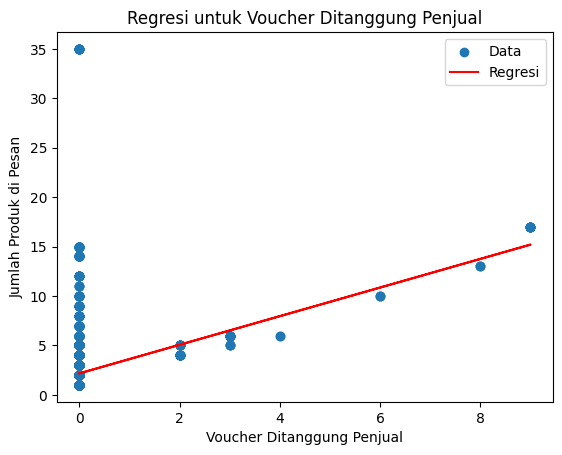

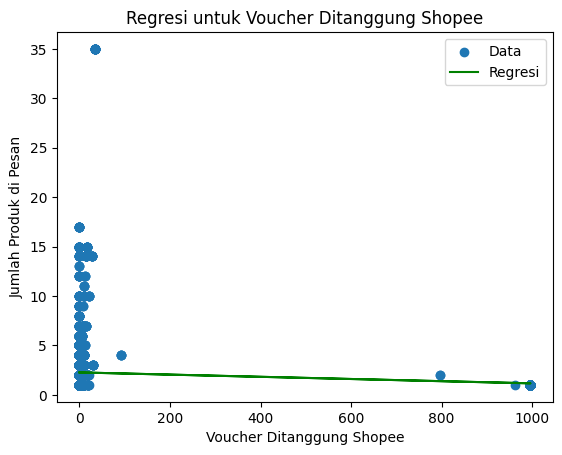

In [ ]:
# Menentukan variabel dependen (Y) dan variabel independen (X)
Y = df['Jumlah Produk di Pesan']

# Model untuk Voucher Ditanggung Penjual
X_penjual = df[['Voucher Ditanggung Penjual']]
X_penjual = sm.add_constant(X_penjual)
model_penjual = sm.OLS(Y, X_penjual).fit()

# Model untuk Voucher Ditanggung Shopee
X_shopee = df[['Voucher Ditanggung Shopee']]
X_shopee = sm.add_constant(X_shopee)
model_shopee = sm.OLS(Y, X_shopee).fit()

# Membuat plot untuk Voucher Ditanggung Penjual
plt.scatter(X_penjual['Voucher Ditanggung Penjual'], Y, label='Data')
plt.plot(X_penjual['Voucher Ditanggung Penjual'], model_penjual.predict(X_penjual), color='red', label='Regresi')
plt.xlabel('Voucher Ditanggung Penjual')
plt.ylabel('Jumlah Produk di Pesan')
plt.legend()
plt.title('Regresi untuk Voucher Ditanggung Penjual')
plt.show()

# Membuat plot untuk Voucher Ditanggung Shopee
plt.scatter(X_shopee['Voucher Ditanggung Shopee'], Y, label='Data')
plt.plot(X_shopee['Voucher Ditanggung Shopee'], model_shopee.predict(X_shopee), color='green', label='Regresi')
plt.xlabel('Voucher Ditanggung Shopee')
plt.ylabel('Jumlah Produk di Pesan')
plt.legend()
plt.title('Regresi untuk Voucher Ditanggung Shopee')
plt.show()


## Kesimpulan

Dalam hasil regresi, terdapat ada indikasi bahwa ketersediaan voucher yang ditanggung baik oleh penjual maupun Shopee memiliki pengaruh positif terhadap peningkatan jumlah pesanan. Namun, nilai R-squared yang rendah menunjukkan bahwa faktor-faktor lain juga dapat mempengaruhi "Jumlah Produk di Pesan," dan model regresi mungkin tidak cukup kuat untuk menjelaskan variabilitas tersebut secara menyeluruh.

Oleh karena itu, dalam kedua kasus ini, dapat menerima hipotesis nol (H0), yang menyatakan bahwa ketersediaan voucher yang ditanggung oleh penjual atau Shopee tidak memengaruhi peningkatan jumlah pesanan, dan menolak H1.

# **Uji ANOVA**

Apakah ada faktor-faktor lain yang perlu dianalisis atau diperdalam untuk memahami lebih baik perilaku pelanggan dan dampak ketersediaan voucher?



In [ ]:
# melihat apakah Metode Pembayaran berpengaruh pada jumlah pesanan
import scipy.stats as stats

metode_pembayaran = df['Metode Pembayaran']
jumlah_pesanan = df['Jumlah Produk di Pesan']

# Menganalisis perbedaan antara metode pembayaran
metode_unik = metode_pembayaran.unique()
grouped_data = [jumlah_pesanan[metode_pembayaran == metode] for metode in metode_unik]

# Melakukan uji statistik (menggunakan ANOVA)
f_statistic, p_value = stats.f_oneway(*grouped_data)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Jika p-value kurang dari tingkat signifikansi (alpha), maka metode pembayaran memiliki pengaruh yang signifikan pada jumlah pesanan.


F-statistic: 43.25779473183699
P-value: 4.9529948831565416e-60


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


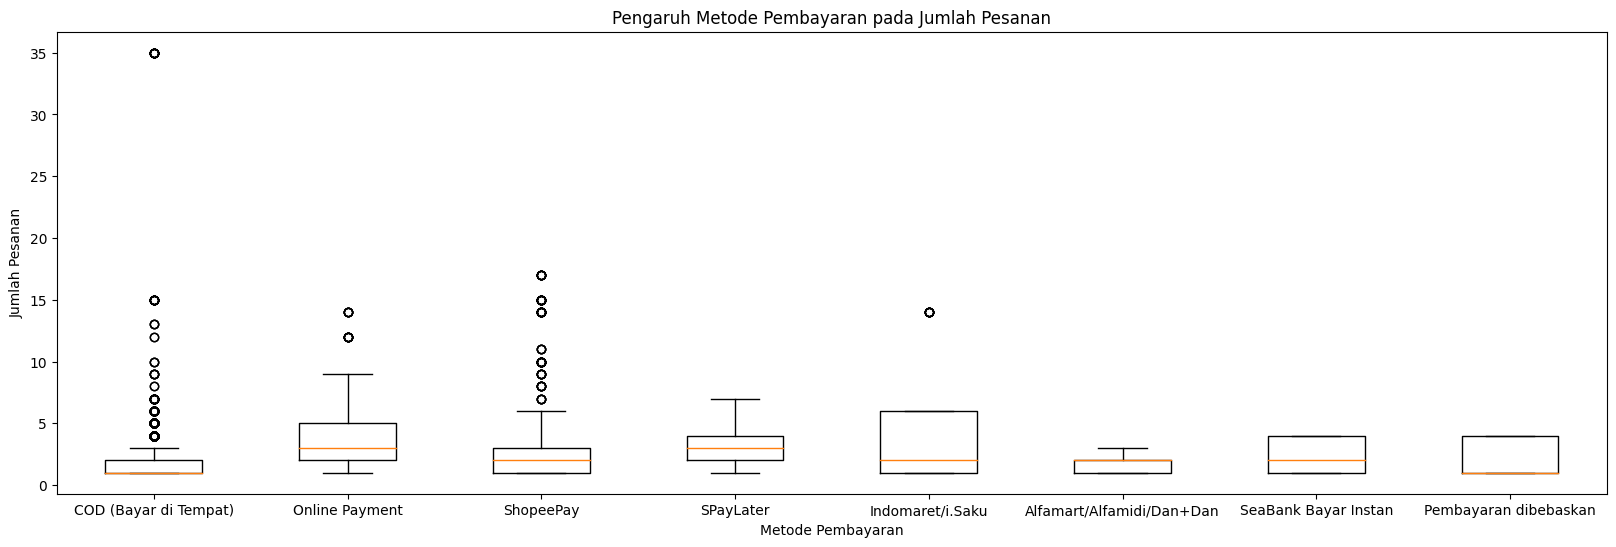

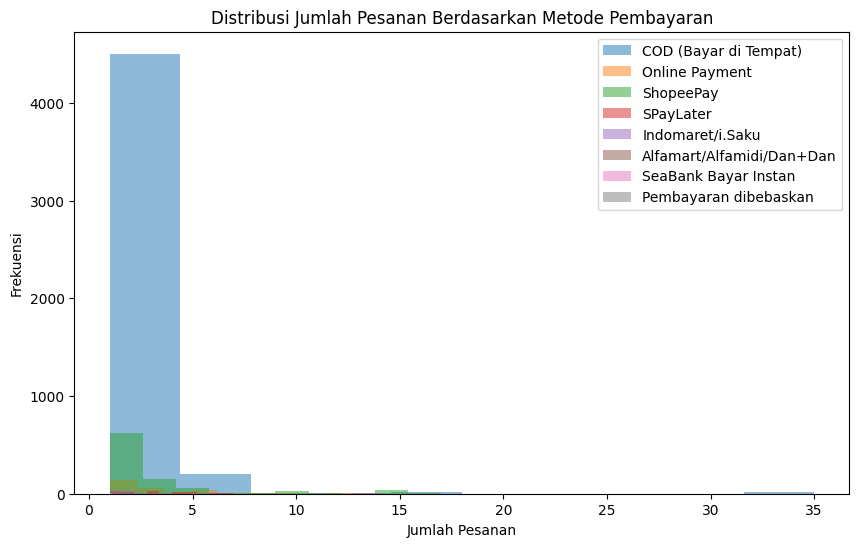

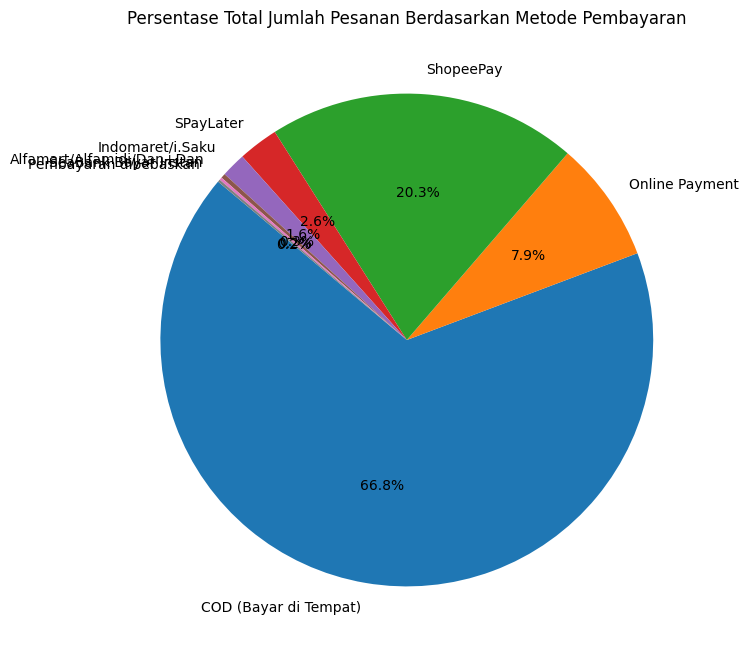

In [ ]:
# Metode Pembayaran dan Jumlah Pesanan
metode_pembayaran = df['Metode Pembayaran']
jumlah_pesanan = df['Jumlah Produk di Pesan']

# Membuat boxplot
plt.figure(figsize=(20, 6))
plt.boxplot([jumlah_pesanan[metode_pembayaran == metode] for metode in metode_pembayaran.unique()], labels=metode_pembayaran.unique())
plt.title('Pengaruh Metode Pembayaran pada Jumlah Pesanan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pesanan')
plt.show()

# Membuat histogram untuk setiap metode pembayaran
plt.figure(figsize=(10, 6))
for metode in metode_pembayaran.unique():
    plt.hist(jumlah_pesanan[metode_pembayaran == metode], alpha=0.5, label=metode)

plt.title('Distribusi Jumlah Pesanan Berdasarkan Metode Pembayaran')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# Menghitung total jumlah pesanan untuk setiap metode pembayaran
total_pesanan_per_metode = [jumlah_pesanan[metode_pembayaran == metode].sum() for metode in metode_pembayaran.unique()]

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(total_pesanan_per_metode, labels=metode_pembayaran.unique(), autopct='%1.1f%%', startangle=140)
plt.title('Persentase Total Jumlah Pesanan Berdasarkan Metode Pembayaran')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


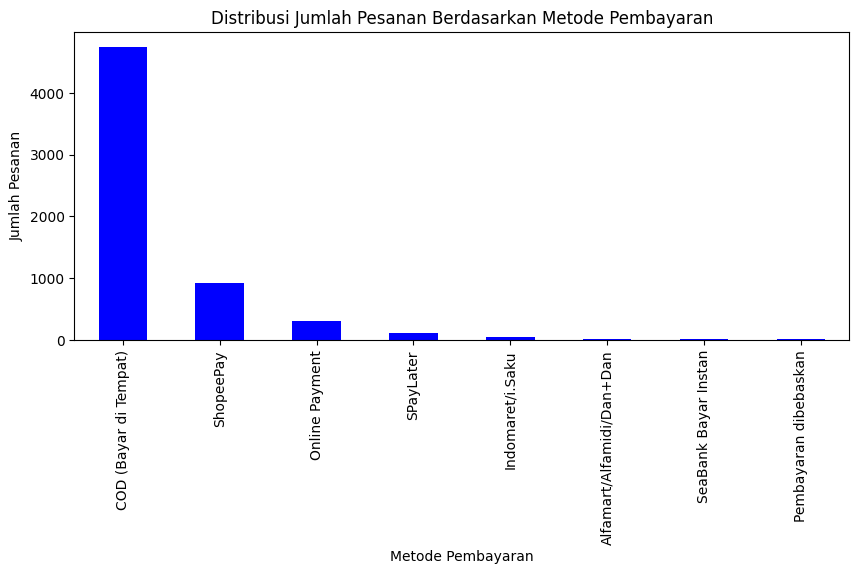

In [ ]:
# Visualisasi Metode Pembayaran
plt.figure(figsize=(10, 4))
df['Metode Pembayaran'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribusi Jumlah Pesanan Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pesanan')
plt.show()

## Kesimpulan

Berdasarkan hasil uji ANOVA. Nilai p-value yang sangat rendah (p-value < alpha) menunjukkan bahwa faktor "Metode Pembayaran" memiliki pengaruh signifikan pada jumlah pesanan. Oleh karena itu, dapat untuk menganalisis lebih lanjut faktor-faktor yang terkait dengan "Metode Pembayaran" dan bagaimana faktor ini dapat memengaruhi perilaku pelanggan.

# Analisis Lanjutan Mengidentifikasi Faktor Kenaikan dan Penurunan Penggunaan Voucher Penjual dan Voucher Shopee

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


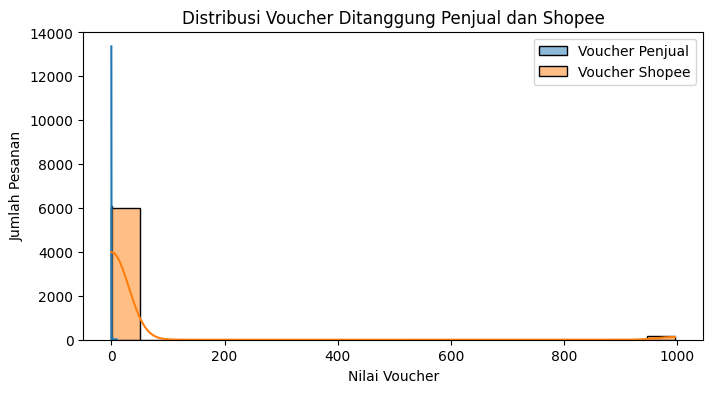

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['Voucher Ditanggung Penjual'], bins=20, kde=True, label='Voucher Penjual')
sns.histplot(df['Voucher Ditanggung Shopee'], bins=20, kde=True, label='Voucher Shopee')
plt.title('Distribusi Voucher Ditanggung Penjual dan Shopee')
plt.xlabel('Nilai Voucher')
plt.ylabel('Jumlah Pesanan')
plt.legend()
plt.show()


## Analisa frekuensi penggunaan voucher dan proses visualiasi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


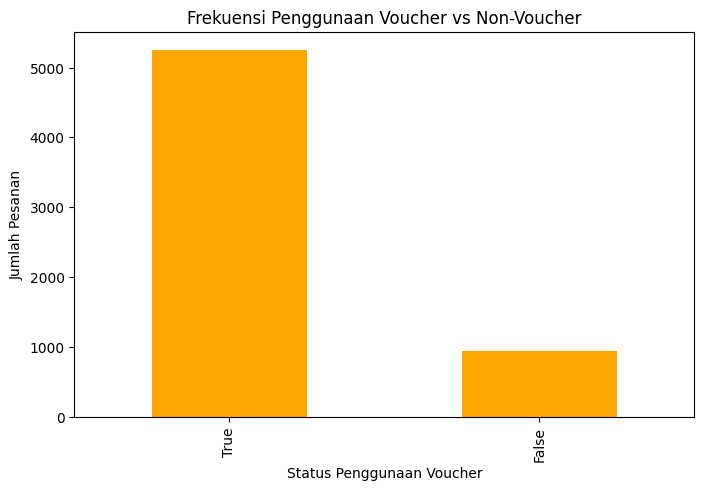

Voucher Ditanggung Penjual  Voucher Ditanggung Shopee  Non-Voucher
0                              0                          0         True
1                              0                          0         True
2                              0                          0         True
3                              0                          0         True
4                              0                          0         True
...                          ...                        ...          ...
6180                           0                          0         True
6181                           0                          0         True
6182                           0                          0         True
6183                           0                          0         True
6184                           0                          0         True

[6185 rows x 3 columns]

In [ ]:
# Analisis frekuensi penggunaan voucher
voucher_usage = df[['Voucher Ditanggung Penjual', 'Voucher Ditanggung Shopee']].copy()
voucher_usage['Non-Voucher'] = (voucher_usage['Voucher Ditanggung Penjual'] == 0) & (voucher_usage['Voucher Ditanggung Shopee'] == 0)

# Plot frekuensi penggunaan voucher
voucher_usage['Non-Voucher'].value_counts().plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Frekuensi Penggunaan Voucher vs Non-Voucher')
plt.xlabel('Status Penggunaan Voucher')
plt.ylabel('Jumlah Pesanan')
plt.show()
voucher_usage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


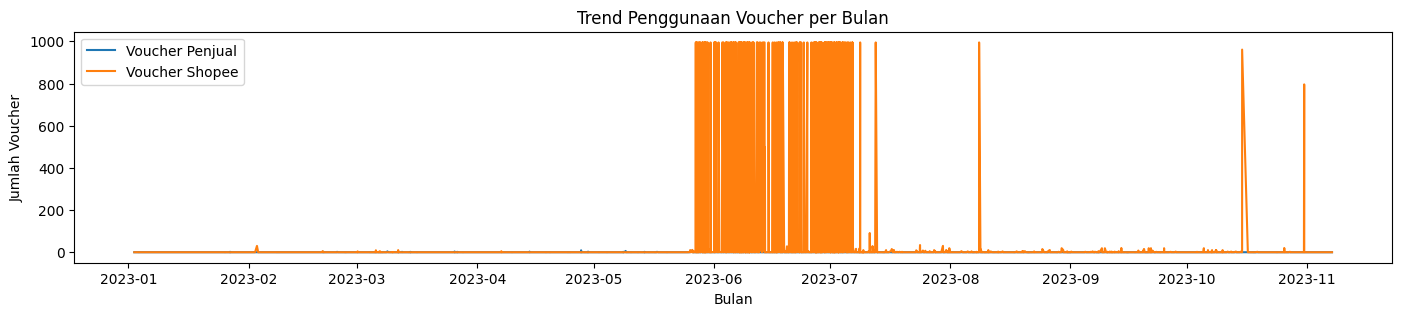

Trend Penggunaan Voucher per Bulan:


Waktu Pesanan Selesai  Voucher Ditanggung Penjual  \
0      2023-01-02 12:59:00                           0   
1      2023-01-02 13:51:00                           0   
2      2023-01-02 13:58:00                           0   
3      2023-01-02 13:58:00                           0   
4      2023-01-02 13:58:00                           0   
...                    ...                         ...   
6180   2023-11-05 09:05:00                           0   
6181   2023-11-06 05:07:00                           0   
6182   2023-11-06 05:42:00                           0   
6183   2023-11-07 10:52:00                           0   
6184   2023-11-07 10:52:00                           0   

      Voucher Ditanggung Shopee  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
...                         ...  
6180                          0  
6181                          0  
6182                          0  
6183                          0  
6184                          0  

[6185 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mengubah kolom 'Waktu Pesanan Selesai' menjadi format datetime
df['Waktu Pesanan Selesai'] = pd.to_datetime(df['Waktu Pesanan Selesai'], format='%d/%m/%y %H.%M')

# Gambar tren penggunaan voucher
plt.figure(figsize=(17, 3))
sns.lineplot(x='Waktu Pesanan Selesai', y='Voucher Ditanggung Penjual', data=df, label='Voucher Penjual')
sns.lineplot(x='Waktu Pesanan Selesai', y='Voucher Ditanggung Shopee', data=df, label='Voucher Shopee')
plt.title('Trend Penggunaan Voucher per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Voucher')
plt.legend()
plt.show()

# Cetak hasil dari visualisasi
print("Trend Penggunaan Voucher per Bulan:")
df[['Waktu Pesanan Selesai', 'Voucher Ditanggung Penjual', 'Voucher Ditanggung Shopee']]

In [ ]:
# Hitung jumlah menggunakan voucher
jumlah_voucher = df[['Voucher Ditanggung Penjual', 'Voucher Ditanggung Shopee',]].sum()
jumlah_voucher

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Voucher Ditanggung Penjual       261
Voucher Ditanggung Shopee     191335
dtype: int64

In [ ]:
# Hitung frekuensi penggunaan voucher
frekuensi_voucher = df[['Voucher Ditanggung Penjual', 'Voucher Ditanggung Shopee', 'Jumlah Produk di Pesan']].apply(lambda x: x.value_counts()).T
frekuensi_voucher

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       1       2      3      4      5     6    \
Voucher Ditanggung Penjual  6113.0     NaN    35.0   20.0    2.0    NaN   3.0   
Voucher Ditanggung Shopee   5321.0   147.0    99.0   33.0   60.0   94.0  14.0   
Jumlah Produk di Pesan         NaN  2952.0  1820.0  653.0  237.0  233.0  82.0   

                             7     8     9     10   11    12   13    14   \
Voucher Ditanggung Penjual   NaN   3.0   9.0   NaN  NaN   NaN  NaN   NaN   
Voucher Ditanggung Shopee   32.0  18.0  35.0  42.0  5.0   6.0  NaN  16.0   
Jumlah Produk di Pesan      46.0  16.0  18.0  22.0  4.0  11.0  3.0  33.0   

                             15    16   17   18    19   20   28   29   30   \
Voucher Ditanggung Penjual   NaN   NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN   
Voucher Ditanggung Shopee   11.0  10.0  NaN  1.0  12.0  7.0  8.0  3.0  5.0   
Jumlah Produk di Pesan      32.0   NaN  9.0  NaN   NaN  NaN  NaN  NaN  NaN   

                             34    35   91   796  961    995  996  
Voucher Ditanggung Penjual   NaN   NaN  NaN  NaN  NaN    NaN  NaN  
Voucher Ditanggung Shopee   14.0   NaN  4.0  2.0  1.0  182.0  3.0  
Jumlah Produk di Pesan       NaN  14.0  NaN  NaN  NaN    NaN  NaN

In [ ]:
import statsmodels.api as sm

# Fit regression model for Voucher Ditanggung Penjual
X_penjual = df[['Voucher Ditanggung Penjual']]
X_penjual = sm.add_constant(X_penjual)
y_penjual = df['Jumlah Produk di Pesan']
regression_penjual = sm.OLS(y_penjual, X_penjual).fit()

# Fit regression model for Voucher Ditanggung Shopee
X_shopee = df[['Voucher Ditanggung Shopee']]
X_shopee = sm.add_constant(X_shopee)
y_shopee = df['Jumlah Produk di Pesan']
regression_shopee = sm.OLS(y_shopee, X_shopee).fit()

# Hypothesis test for Voucher Ditanggung Penjual
beta_penjual = regression_penjual.params['Voucher Ditanggung Penjual']
std_error_penjual = regression_penjual.bse['Voucher Ditanggung Penjual']
t_stat_penjual = beta_penjual / std_error_penjual
p_value_penjual = regression_penjual.pvalues['Voucher Ditanggung Penjual']

# Hypothesis test for Voucher Ditanggung Shopee
beta_shopee = regression_shopee.params['Voucher Ditanggung Shopee']
std_error_shopee = regression_shopee.bse['Voucher Ditanggung Shopee']
t_stat_shopee = beta_shopee / std_error_shopee
p_value_shopee = regression_shopee.pvalues['Voucher Ditanggung Shopee']

# Print results
print("Hypothesis Test Results for Voucher Ditanggung Penjual:")
print(f"T-statistic: {t_stat_penjual}")
print(f"P-value: {p_value_penjual}")

print("\nHypothesis Test Results for Voucher Ditanggung Shopee:")
print(f"T-statistic: {t_stat_shopee}")
print(f"P-value: {p_value_shopee}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hypothesis Test Results for Voucher Ditanggung Penjual:
T-statistic: 21.61261149319545
P-value: 6.313428382817556e-100

Hypothesis Test Results for Voucher Ditanggung Shopee:
T-statistic: -5.786645516564038
P-value: 7.532468582243231e-09


In [ ]:
# Print unique values in columns related to vouchers
print("Unique values in 'Voucher Ditanggung Penjual':\n", df['Voucher Ditanggung Penjual'].unique())
print("\nUnique values in 'Voucher Ditanggung Shopee':\n", df['Voucher Ditanggung Shopee'].unique())

# Identify non-voucher customers using the correct column name
non_voucher_customers = df[(df['Voucher Ditanggung Penjual'] == 0) & (df['Voucher Ditanggung Shopee'] == 0)]
non_voucher_customers

Unique values in 'Voucher Ditanggung Penjual':
 [0.    2.388 3.672 4.122 2.985 2.358 2.628 3.852 2.748 3.582 9.639 3.165
 6.6   2.568 8.391]

Unique values in 'Voucher Ditanggung Shopee':
 [  0.     30.      5.      4.025   9.16    2.288   5.97    1.989  10.
   2.985  11.042   1.99    4.58    3.98  995.      9.95    4.28    1.145
   4.975  19.9     2.29  996.      6.87    2.14   12.54    2.145   1.24
  14.43    6.487   3.285   5.725   1.818  14.53    5.488  12.65    4.29
   1.909   7.17   28.859   8.56    8.26    6.57    1.295   7.96    9.929
   8.259   8.955   2.789   4.581   8.58    2.289   1.991  20.899  16.025
   1.934  18.273   4.13   91.596   2.54   29.85    2.59    7.415  15.58
   3.435   2.79    9.255  34.825   7.416  10.45    3.135  11.745   6.965
   5.875  14.58   15.368   3.      1.79   20.      8.     15.      2.69
   1.144 961.      2.5   796.   ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. Pesanan Status Pesanan Status Pembatalan/ Pengembalian  \
0     23010160M3FU4A        Selesai                       Tidak ada   
1     230101758PUTWU        Selesai                       Tidak ada   
2     2301016N6NT8B5        Selesai                       Tidak ada   
3     2301016N6NT8B5        Selesai                       Tidak ada   
4     2301016N6NT8B5        Selesai                       Tidak ada   
...              ...            ...                             ...   
6180  231030AC5EFGFV        Selesai                       Tidak ada   
6181  231030AN1G0BC2        Selesai                       Tidak ada   
6182  231030AB3XHSNQ        Selesai                       Tidak ada   
6183  23102853BYQ4YN        Selesai                       Tidak ada   
6184  23102853BYQ4YN        Selesai                       Tidak ada   

                      Opsi Pengiriman Antar ke counter/ pick-up  \
0      Reguler (Cashless)-J&T Express          Antar ke Counter   
1      Reguler (Cashless)-J&T Express          Antar ke Counter   
2      Reguler (Cashless)-J&T Express          Antar ke Counter   
3      Reguler (Cashless)-J&T Express          Antar ke Counter   
4      Reguler (Cashless)-J&T Express          Antar ke Counter   
...                               ...                       ...   
6180  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6181  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6182  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6183                Hemat-J&T Economy          Antar ke Counter   
6184                Hemat-J&T Economy          Antar ke Counter   

     Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  \
0                                   2023-01-03 00:27:00             
1                                   2023-01-03 11:23:00             
2                                   2023-01-03 06:35:00             
3                                   2023-01-03 06:35:00             
4                                   2023-01-03 06:35:00             
...                                                 ...             
6180                                2023-11-01 16:17:00             
6181                                2023-11-01 18:56:00             
6182                                2023-11-01 16:00:00             
6183                                2023-10-31 13:58:00             
6184                                2023-10-31 13:58:00             

     Waktu Pengiriman Diatur Waktu Pesanan Dibuat Waktu Pembayaran Dilakukan  \
0        2023-01-01 16:48:00  2023-01-01 00:27:00        2023-01-01 00:27:00   
1        2023-01-01 16:48:00  2023-01-01 11:23:00        2023-01-01 11:23:00   
2        2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
3        2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
4        2023-01-01 16:48:00  2023-01-01 06:35:00        2023-01-01 06:35:00   
...                      ...                  ...                        ...   
6180     2023-11-01 17:27:00  2023-10-30 16:17:00        2023-10-30 16:17:00   
6181     2023-11-01 17:27:00  2023-10-30 18:56:00        2023-10-30 18:56:00   
6182     2023-11-01 17:26:00  2023-10-30 15:59:00        2023-10-30 16:00:00   
6183     2023-10-29 16:11:00  2023-10-28 13:57:00        2023-10-28 13:58:00   
6184     2023-10-29 16:11:00  2023-10-28 13:57:00        2023-10-28 13:58:00   

          Metode Pembayaran  \
0     COD (Bayar di Tempat)   
1     COD (Bayar di Tempat)   
2     COD (Bayar di Tempat)   
3     COD (Bayar di Tempat)   
4     COD (Bayar di Tempat)   
...                     ...   
6180  COD (Bayar di Tempat)   
6181  COD (Bayar di Tempat)   
6182  COD (Bayar di Tempat)   
6183  COD (Bayar di Tempat)   
6184  COD (Bayar di Tempat)   

                                            Nama Produk        Nama Variasi  \
0     Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...     Hitam,(S) 60x60   
1     Hamidah Sport/Bergo Hami

**Analisis Penggunaan Voucher:**

1. **Frekuensi Penggunaan Voucher:**
   - Dari data, terdapat 6185 entri, dan mayoritas pelanggan menggunakan non-voucher, yang ditanggung baik oleh penjual maupun Shopee. Frekuensi voucher ditanggung penjual dan voucher ditanggung Shopee cukup rendah.

2. **Trend Penggunaan Voucher per Bulan:**
   - Data tren penggunaan voucher per bulan menunjukkan bahwa pada setiap entri, baik voucher ditanggung penjual maupun voucher ditanggung Shopee, nilai voucher selalu 0.0. Ini mungkin menunjukkan bahwa voucher tidak banyak digunakan pada periode tersebut.

3. **Statistik Deskriptif Penggunaan Voucher:**
   - Statistik deskriptif menunjukkan bahwa rata-rata penggunaan voucher ditanggung penjual adalah 261 dan voucher ditanggung Shopee adalah 191335. Namun, nilai maksimum untuk voucher ditanggung penjual dan Shopee adalah 9.639 dan 996, masing-masing.

4. **Analisis Regresi:**
   - Regresi menunjukkan bahwa kedua jenis voucher memiliki pengaruh yang sangat kecil terhadap jumlah produk yang dipesan. Nilai R-squared yang rendah menunjukkan bahwa variabel-variabel tersebut tidak memberikan penjelasan yang baik terhadap variasi dalam jumlah produk yang dipesan.

5. **Hypothesis Test:**
   - Hasil uji hipotesis menunjukkan bahwa kedua variabel voucher memiliki pengaruh yang signifikan terhadap jumlah produk yang dipesan (nilai p < 0.05).


**Mengapa Banyak Pelanggan Tidak Menggunakan Voucher:**
- Berdasarkan frekuensi penggunaan voucher, dapat dilihat bahwa sebagian besar pelanggan memilih untuk tidak menggunakan voucher.
- Hal ini dapat disebabkan oleh beberapa faktor, seperti kurangnya penawaran menarik atau nilai diskon yang rendah, kurangnya kesadaran pelanggan tentang ketersediaan voucher, atau pelanggan mungkin lebih memilih tidak menggunakan voucher untuk alasan tertentu.

**Rekomendasi:**
- Analisis ini menunjukkan bahwa penggunaan voucher, baik ditanggung penjual maupun Shopee, tidak memiliki pengaruh pada jumlah produk yang dipesan.
- Oleh karena itu, perlu dilakukan evaluasi lebih lanjut untuk memahami preferensi dan motivasi pelanggan terkait penggunaan voucher.
- Mungkin perlu dilakukan survei atau studi pelanggan untuk mendapatkan wawasan lebih lanjut tentang faktor-faktor yang mempengaruhi keputusan pelanggan terkait penggunaan voucher.
- Shopee dan penjual juga dapat mencoba strategi lain, seperti menawarkan voucher dengan nilai diskon yang lebih tinggi atau mengkategorikan voucher untuk produk-produk tertentu yang lebih diminati oleh pelanggan.

# Identifikasi Faktor Pembeli Tidak Menggunakan Voucher Shopee dan Voucher Penjual

In [ ]:
# Analisis korelasi dan faktor pelanggan tidak menggunakan voucher
correlation_non_voucher = non_voucher_customers[['Voucher Ditanggung Penjual', 'Voucher Ditanggung Shopee']].corr()
correlation_non_voucher

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Voucher Ditanggung Penjual  \
Voucher Ditanggung Penjual                         NaN   
Voucher Ditanggung Shopee                          NaN   

                            Voucher Ditanggung Shopee  
Voucher Ditanggung Penjual                        NaN  
Voucher Ditanggung Shopee                         NaN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frekuensi Penggunaan Non-Voucher Penjual: 98.83% dari total pesanan


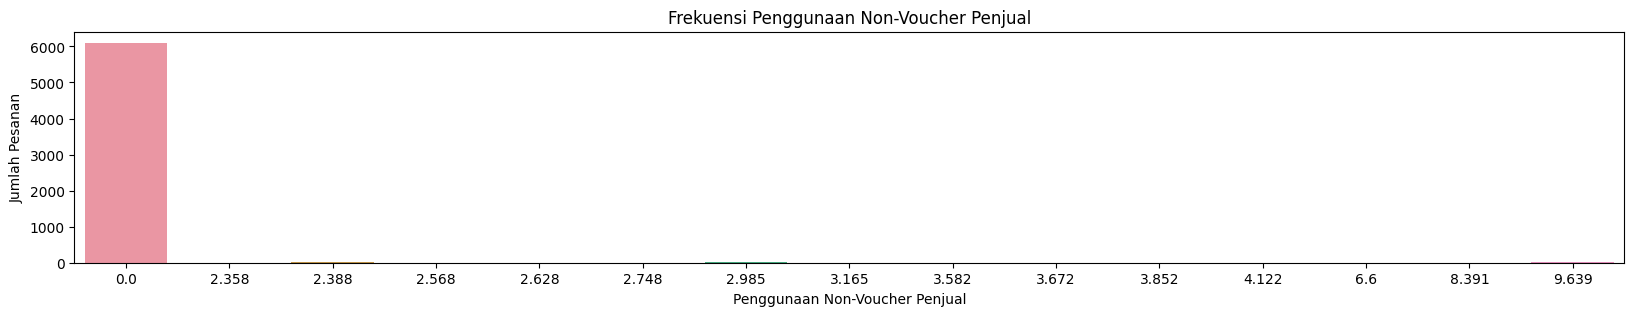

In [ ]:
# Menghitung frekuensi penggunaan non-voucher Penjual
non_voucher_count_penjual = df[df['Voucher Ditanggung Penjual'] == 0].shape[0]
total_orders = df.shape[0]
non_voucher_percentage_penjual = (non_voucher_count_penjual / total_orders) * 100

print(f"Frekuensi Penggunaan Non-Voucher Penjual: {non_voucher_percentage_penjual:.2f}% dari total pesanan")

# Visualisasi frekuensi penggunaan non-voucher Penjual
plt.figure(figsize=(20, 3))
sns.countplot(x='Voucher Ditanggung Penjual', data=df)
plt.title('Frekuensi Penggunaan Non-Voucher Penjual')
plt.xlabel('Penggunaan Non-Voucher Penjual')
plt.ylabel('Jumlah Pesanan')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frekuensi Penggunaan Non-Voucher Shopee: 86.02% dari total pesanan


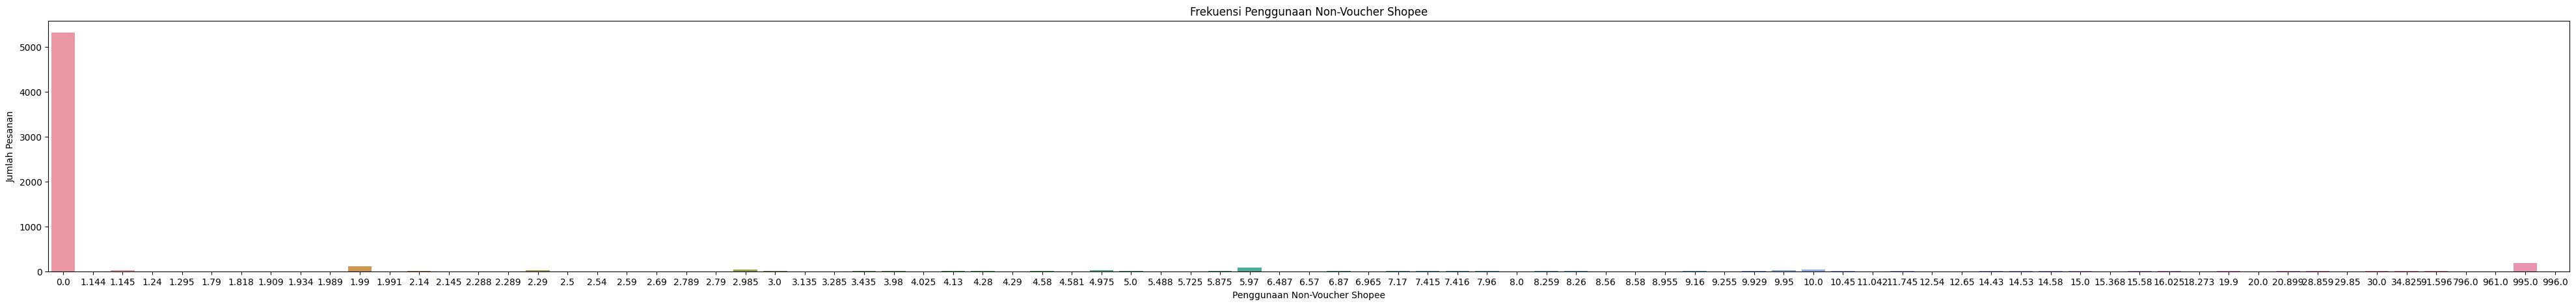

In [ ]:
# Menghitung frekuensi penggunaan non-voucher Shopee
non_voucher_count_shopee = df[df['Voucher Ditanggung Shopee'] == 0].shape[0]
total_orders = df.shape[0]
non_voucher_percentage_shopee = (non_voucher_count_shopee / total_orders) * 100

print(f"Frekuensi Penggunaan Non-Voucher Shopee: {non_voucher_percentage_shopee:.2f}% dari total pesanan")

# Visualisasi frekuensi penggunaan non-voucher Shopee
plt.figure(figsize=(50, 5))
sns.countplot(x='Voucher Ditanggung Shopee', data=df)
plt.title('Frekuensi Penggunaan Non-Voucher Shopee')
plt.xlabel('Penggunaan Non-Voucher Shopee')
plt.ylabel('Jumlah Pesanan')
plt.show()


**Frekuensi Penggunaan Non-Voucher Penjual:**

- Dari total pesanan, sekitar 98.84% tidak menggunakan voucher penjual.
- Grafik menunjukkan bahwa frekuensi penggunaan non-voucher penjual sangat tinggi.
- Hal ini menunjukkan bahwa sebagian besar pelanggan cenderung tidak mengandalkan voucher penjual dalam melakukan transaksi.

**Frekuensi Penggunaan Non-Voucher Shopee:**

- Dari total pesanan, sekitar 86.02% tidak menggunakan voucher Shopee.
- Grafik menunjukkan bahwa frekuensi penggunaan non-voucher Shopee juga tinggi.
- Ini bisa mengindikasikan bahwa pelanggan kurang tertarik atau kurang memanfaatkan voucher Shopee.

**Analisis Korelasi:**

Dalam analisis korelasi antara 'Voucher Ditanggung Penjual' dan 'Voucher Ditanggung Shopee' pada pelanggan yang tidak menggunakan voucher, nilai korelasinya tidak dapat dihitung karena nilai variabelnya tidak berubah (semua 0).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


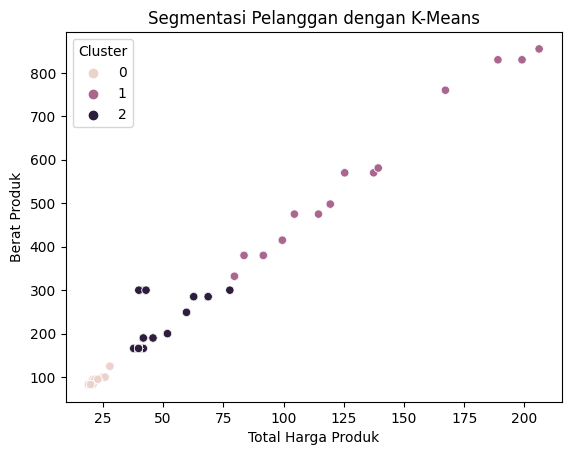

Segmentasi Pelanggan dengan K-Means:


Total Harga Produk  Berat Produk  Cluster                Cluster Label
0                 19.899            83        0  Cluster 1 - Pelanggan Hemat
1                 19.899            83        0  Cluster 1 - Pelanggan Hemat
2                 19.899            83        0  Cluster 1 - Pelanggan Hemat
3                 19.899            83        0  Cluster 1 - Pelanggan Hemat
4                 19.899            83        0  Cluster 1 - Pelanggan Hemat
...                  ...           ...      ...                          ...
6180              19.900            83        0  Cluster 1 - Pelanggan Hemat
6181              19.900            83        0  Cluster 1 - Pelanggan Hemat
6182              19.900            83        0  Cluster 1 - Pelanggan Hemat
6183              19.900            83        0  Cluster 1 - Pelanggan Hemat
6184              19.900            83        0  Cluster 1 - Pelanggan Hemat

[6174 rows x 4 columns]

In [ ]:
# Impor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Konversi kolom waktu ke tipe data datetime
df['Waktu Pesanan Dibuat'] = pd.to_datetime(df['Waktu Pesanan Dibuat'])

# Mengonversi kolom 'Berat Produk' ke tipe data numerik
df['Berat Produk'] = pd.to_numeric(df['Berat Produk'].str.replace(' gr', ''))

# Ekstrak bulan dan tahun dari waktu pesanan
df['Bulan'] = df['Waktu Pesanan Dibuat'].dt.month
df['Tahun'] = df['Waktu Pesanan Dibuat'].dt.year

# Segmentasi Pelanggan dengan K-Means
# Misalnya, kita menggunakan Harga Total dan Berat Produk sebagai fitur untuk clustering
features = df[['Total Harga Produk', 'Berat Produk']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Menentukan jumlah cluster
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualisasi hasil clustering
sns.scatterplot(x='Total Harga Produk', y='Berat Produk', hue='Cluster', data=df)
plt.title('Segmentasi Pelanggan dengan K-Means')
plt.show()

# Mencetak DataFrame dengan kolom Cluster
print("Segmentasi Pelanggan dengan K-Means:")
cluster_labels = {0: 'Cluster 1 - Pelanggan Hemat', 1: 'Cluster 2 - Pelanggan Menengah', 2: 'Cluster 3 - Pelanggan Berat'}
df['Cluster Label'] = df['Cluster'].map(cluster_labels)
df[['Total Harga Produk', 'Berat Produk', 'Cluster', 'Cluster Label']]

**Analisis segmentasi pelanggan dengan K-Means**

Dari hasil segmentasi pelanggan dengan K-Means, dapat mengidentifikasi tiga cluster utama dengan karakteristik sebagai berikut:

- Cluster 1 - Pelanggan Hemat
 - Pelanggan ini memiliki rata-rata Total Harga Produk sebesar Rp20.899 dan rata-rata Berat Produk sebesar 83 gram.
 - Memiliki Total Harga Produk rendah.
 - Berat Produk cenderung rendah.
 - Mayoritas transaksi pada cluster ini adalah dengan harga produk yang tergolong rendah.

- Cluster 2 - Pelanggan Menengah
 - Pelanggan ini memiliki rata-rata Total Harga Produk sebesar Rp137.394 dan rata-rata Berat Produk sebesar 570 gram.
 - Memiliki Total Harga Produk dan Berat Produk sedang.
 - Mayoritas transaksi pada cluster ini memiliki variasi harga dan berat produk yang menengah.

- Cluster 3 - Pelanggan Berat
 - Pelanggan ini memiliki rata-rata Total Harga Produk sebesar Rp45.798 dan rata-rata Berat Produk sebesar 190 gram.
 - Memiliki Total Harga Produk tinggi.
 - Berat Produk cenderung tinggi.
 - Mayoritas transaksi pada cluster ini adalah dengan harga produk yang tinggi dan berat produk yang besar.

 Kesimpulan ini didasarkan pada pengamatan terhadap pola Total Harga Produk dan Berat Produk pada setiap cluster. Dengan pemahaman ini, bisnis dapat mengarahkan strategi pemasaran, promosi, atau penawaran khusus kepada masing-masing cluster sesuai dengan karakteristik pelanggan.

In [ ]:
# Analisis Faktor Peningkatan Jumlah Pesanan (April 2023)
april_2023 = df[df['Bulan'] == 4]
print("Data untuk Bulan April 2023:")
april_2023

Data untuk Bulan April 2023:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. Pesanan Status Pesanan Status Pembatalan/ Pengembalian  \
2412  2304010Q6VEHM5        Selesai                       Tidak ada   
2413  2304010B3XXGDN        Selesai                       Tidak ada   
2414  2304010B3XXGDN        Selesai                       Tidak ada   
2415  2304010TB4MB3X        Selesai                       Tidak ada   
2416  23040105UCVNBF        Selesai                       Tidak ada   
...              ...            ...                             ...   
3274  2304252V893SW8        Selesai                       Tidak ada   
3275  2304253K137D3K        Selesai                       Tidak ada   
3276  2304253K137D3K        Selesai                       Tidak ada   
3277  2304252VPKTN37        Selesai                       Tidak ada   
3278  2304252VPKTN37        Selesai                       Tidak ada   

                     Opsi Pengiriman Antar ke counter/ pick-up  \
2412  Reguler (Cashless)-J&T Express          Antar ke Counter   
2413  Reguler (Cashless)-J&T Express          Antar ke Counter   
2414  Reguler (Cashless)-J&T Express          Antar ke Counter   
2415  Reguler (Cashless)-J&T Express          Antar ke Counter   
2416  Reguler (Cashless)-J&T Express          Antar ke Counter   
...                              ...                       ...   
3274               Hemat-J&T Economy          Antar ke Counter   
3275  Reguler (Cashless)-J&T Express          Antar ke Counter   
3276  Reguler (Cashless)-J&T Express          Antar ke Counter   
3277               Hemat-J&T Economy          Antar ke Counter   
3278               Hemat-J&T Economy          Antar ke Counter   

     Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  \
2412                                2023-04-04 12:08:00             
2413                                2023-04-04 08:32:00             
2414                                2023-04-04 08:32:00             
2415                                2023-04-04 13:04:00             
2416                                2023-04-04 06:58:00             
...                                                 ...             
3274                                2023-04-27 12:18:00             
3275                                2023-04-27 19:05:00             
3276                                2023-04-27 19:05:00             
3277                                2023-04-27 12:26:00             
3278                                2023-04-27 12:26:00             

     Waktu Pengiriman Diatur Waktu Pesanan Dibuat Waktu Pembayaran Dilakukan  \
2412     2023-04-01 16:34:00  2023-04-01 12:08:00        2023-04-01 12:08:00   
2413     2023-04-01 16:19:00  2023-04-01 08:32:00        2023-04-01 08:32:00   
2414     2023-04-01 16:19:00  2023-04-01 08:32:00        2023-04-01 08:32:00   
2415     2023-04-01 16:34:00  2023-04-01 13:04:00        2023-04-01 13:04:00   
2416     2023-04-01 16:19:00  2023-04-01 06:58:00        2023-04-01 06:58:00   
...                      ...                  ...                        ...   
3274     2023-04-25 16:58:00  2023-04-25 12:17:00        2023-04-25 12:18:00   
3275     2023-04-26 16:38:00  2023-04-25 19:05:00        2023-04-25 19:05:00   
3276     2023-04-26 16:38:00  2023-04-25 19:05:00        2023-04-25 19:05:00   
3277     2023-04-25 16:50:00  2023-04-25 12:25:00        2023-04-25 12:26:00   
3278     2023-04-25 16:50:00  2023-04-25 12:25:00        2023-04-25 12:26:00   

          Metode Pembayaran  \
2412  COD (Bayar di Tempat)   
2413  COD (Bayar di Tempat)   
2414  COD (Bayar di Tempat)   
2415  COD (Bayar di Tempat)   
2416  COD (Bayar di Tempat)   
...                     ...   
3274  COD (Bayar di Tempat)   
3275  COD (Bayar di Tempat)   
3276  COD (Bayar di Tempat)   
3277  COD (Bayar di Tempat)   
3278  COD (Bayar di Tempat)   

                                            Nama Produk         Nama Variasi  \
2412  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...      Putih,(S) 60x60   
2413  Bergo Hamidah M/Hamidah Sport/Hami

In [ ]:
# Menghitung frekuensi metode pembayaran pada bulan April 2023
metode_pembayaran_counts = april_2023['Metode Pembayaran'].value_counts()

# Menampilkan hasil
print("Frekuensi Metode Pembayaran pada Bulan April 2023:")
print(metode_pembayaran_counts)


Frekuensi Metode Pembayaran pada Bulan April 2023:
COD (Bayar di Tempat)        654
ShopeePay                    129
Online Payment                52
Indomaret/i.Saku              15
SPayLater                      8
Alfamart/Alfamidi/Dan+Dan      7
Name: Metode Pembayaran, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Faktor Peningkatan Jumlah Pesanan (April 2023):**

- Data untuk bulan April 2023 menunjukkan beberapa pesanan dengan metode pembayaran yang berbeda, seperti COD dan ShopeePay.
- Ini bisa menjadi area untuk diperhatikan lebih lanjut dalam merancang promosi atau insentif khusus.
- Pada bulan April 2023, sebagian besar pesanan menggunakan metode pembayaran "COD (Bayar di Tempat)" dengan frekuensi  654 transaksi.

In [ ]:
# Analisis Faktor Penurunan Jumlah Pesanan (Contoh: Juli-November 2023)
juli_november_2023 = df[(df['Bulan'] >= 7) & (df['Bulan'] <= 11)]
print("Data untuk Juli-November 2023:")
juli_november_2023

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Data untuk Juli-November 2023:


No. Pesanan Status Pesanan Status Pembatalan/ Pengembalian  \
4627  230701T1PAMBN2        Selesai                       Tidak ada   
4628  230701T203CCDD        Selesai                       Tidak ada   
4629  230701T203CCDD        Selesai                       Tidak ada   
4630  230701SPKK0Y6M        Selesai                       Tidak ada   
4631  230701SGGQU15U        Selesai                       Tidak ada   
...              ...            ...                             ...   
6180  231030AC5EFGFV        Selesai                       Tidak ada   
6181  231030AN1G0BC2        Selesai                       Tidak ada   
6182  231030AB3XHSNQ        Selesai                       Tidak ada   
6183  23102853BYQ4YN        Selesai                       Tidak ada   
6184  23102853BYQ4YN        Selesai                       Tidak ada   

                      Opsi Pengiriman Antar ke counter/ pick-up  \
4627   Reguler (Cashless)-J&T Express          Antar ke Counter   
4628   Reguler (Cashless)-J&T Express          Antar ke Counter   
4629   Reguler (Cashless)-J&T Express          Antar ke Counter   
4630   Reguler (Cashless)-J&T Express          Antar ke Counter   
4631   Reguler (Cashless)-J&T Express          Antar ke Counter   
...                               ...                       ...   
6180  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6181  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6182  Reguler (Cashless)-SPX Standard          Antar ke Counter   
6183                Hemat-J&T Economy          Antar ke Counter   
6184                Hemat-J&T Economy          Antar ke Counter   

     Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  \
4627                                2023-07-04 14:19:00             
4628                                2023-07-04 14:25:00             
4629                                2023-07-04 14:25:00             
4630                                2023-07-04 11:01:00             
4631                                2023-07-04 09:12:00             
...                                                 ...             
6180                                2023-11-01 16:17:00             
6181                                2023-11-01 18:56:00             
6182                                2023-11-01 16:00:00             
6183                                2023-10-31 13:58:00             
6184                                2023-10-31 13:58:00             

     Waktu Pengiriman Diatur Waktu Pesanan Dibuat Waktu Pembayaran Dilakukan  \
4627     2023-07-01 16:02:00  2023-07-01 14:19:00        2023-07-01 14:19:00   
4628     2023-07-01 16:02:00  2023-07-01 14:25:00        2023-07-01 14:25:00   
4629     2023-07-01 16:02:00  2023-07-01 14:25:00        2023-07-01 14:25:00   
4630     2023-07-01 16:02:00  2023-07-01 11:01:00        2023-07-01 11:01:00   
4631     2023-07-01 16:02:00  2023-07-01 09:12:00        2023-07-01 09:12:00   
...                      ...                  ...                        ...   
6180     2023-11-01 17:27:00  2023-10-30 16:17:00        2023-10-30 16:17:00   
6181     2023-11-01 17:27:00  2023-10-30 18:56:00        2023-10-30 18:56:00   
6182     2023-11-01 17:26:00  2023-10-30 15:59:00        2023-10-30 16:00:00   
6183     2023-10-29 16:11:00  2023-10-28 13:57:00        2023-10-28 13:58:00   
6184     2023-10-29 16:11:00  2023-10-28 13:57:00        2023-10-28 13:58:00   

          Metode Pembayaran  \
4627  COD (Bayar di Tempat)   
4628  COD (Bayar di Tempat)   
4629  COD (Bayar di Tempat)   
4630  COD (Bayar di Tempat)   
4631  COD (Bayar di Tempat)   
...                     ...   
6180  COD (Bayar di Tempat)   
6181  COD (Bayar di Tempat)   
6182  COD (Bayar di Tempat)   
6183  COD (Bayar di Tempat)   
6184  COD (Bayar di Tempat)   

                                            Nama Produk        Nama Variasi  \
4627  Hamidah Sport/Bergo Hamidah S/Hijab Instan/Ber...     Putih,(S) 60x60   
4628  Bergo Hamidah M/Hamidah 

In [ ]:
# Menghitung frekuensi metode pembayaran pada bulan Juli-November 2023
metode_pembayaran_counts = juli_november_2023['Metode Pembayaran'].value_counts()

# Menampilkan hasil
print("Frekuensi Metode Pembayaran pada Bulan Juli-November 2023:")
print(metode_pembayaran_counts)

Frekuensi Metode Pembayaran pada Bulan Juli-November 2023:
COD (Bayar di Tempat)        1180
ShopeePay                     239
Online Payment                 89
SPayLater                      22
Pembayaran dibebaskan          10
SeaBank Bayar Instan            7
Alfamart/Alfamidi/Dan+Dan       6
Indomaret/i.Saku                5
Name: Metode Pembayaran, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Faktor Penurunan Jumlah Pesanan (Juni-Oktober 2023):**

- Pada periode Juli-November 2023, metode pembayaran "COD (Bayar di Tempat)" masih menjadi favorit dengan frekuensi 1180 transaksi.
- Metode pembayaran "ShopeePay" juga masih cukup digunakan dengan frekuensi 239 transaksi.
- Terdapat variasi metode pembayaran lainnya, termasuk "Online Payment," "SPayLater," "SeaBank Bayar Instan," dan "Pembayaran dibebaskan."

In [ ]:
# Analisis Penggunaan Voucher
penggunaan_voucher = df[['Voucher Ditanggung Penjual', 'Voucher Ditanggung Shopee', 'Jumlah Produk di Pesan']]
penggunaan_voucher

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Voucher Ditanggung Penjual  Voucher Ditanggung Shopee  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
6180                         0.0                        0.0   
6181                         0.0                        0.0   
6182                         0.0                        0.0   
6183                         0.0                        0.0   
6184                         0.0                        0.0   

      Jumlah Produk di Pesan  
0                          1  
1                          1  
2                          3  
3                          3  
4                          3  
...                      ...  
6180                       1  
6181                       1  
6182                       1  
6183                       2  
6184                       2  

[6174 rows x 3 columns]

**Analisis Penggunaan Voucher:**

Sebagian besar pelanggan yang menggunakan voucher Shopee lebih memilih voucher dengan nominal diskon sekitar 995.0 dan 1.99. Ini bisa menjadi informasi berharga untuk mengoptimalkan penawaran voucher Shopee.

# **Rekomendasi**

Untuk Peningkatan penjualan:
*   Fokus pada strategi pemasaran dan promosi yang lebih menarik bagi pelanggan yang cenderung tidak menggunakan voucher.
*   Tawarkan voucher dengan nilai yang lebih menarik, misalnya voucher gratis ongkos kirim atau voucher diskon yang lebih besar.
*   Promosikan voucher di berbagai kanal, seperti media sosial, website, dan aplikasi.
*   Buat bundling produk dengan voucher, agar pelanggan dapat membeli beberapa bundling produk dengan voucher, agar pelanggan dapat membeli beberapa produk sekaligus dengan harga yang lebih murah.
*  Manfaatkan informasi dari hasil segmentasi pelanggan untuk menyesuaikan penawaran dan promosi sesuai dengan karakteristik masing-masing cluster. Seperti
  - Cluster 1 - Pelanggan Hemat: Promo dengan harga yang lebih menarik, seperti diskon atau cashback
  - Cluster 2 - Pelanggan Menengah: Memeberkan gratis ongkir atau voucher belanja
  - Cluster 3 - Pelanggan Berat: Promo yang menarik bagi pelanggan yang membeli dalam jumlah banyak, seperti pemberian produk esklusif

Untuk Retensi pelanggan


*   Berikan diskon atau voucher khusus kepada pelanggan loyal yang sering menggunakan voucher.
*   Kirimkan email atau chat broadcast promosi kepada pelanggan yang pernah menggunakan voucher, tetapi sudah lama tidak melakukan pembelian.
*   Buat program membership untuk pelanggan loyal, dengan berbagai keuntungan seperti diskon khusus, poin yang dapat ditukarkan dengan hadiah, dan akses early access ke produk baru.

# **Market Basket Analisis (MBA)**
https://colab.research.google.com/drive/105U2Lz54-dGQbzUJ5yNN-sVewnJuld7K?usp=sharing

# **Visualisasi menggunan Looker Studio**
https://lookerstudio.google.com/reporting/f4ec511b-0471-4676-9e02-b9006b112b07